In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import json
import nbformat
from nbconvert import HTMLExporter
from nbconvert.preprocessors import ExecutePreprocessor
import os
import nbformat

# Análisis de Rendimiento de Campañas Digitales
## Chapoteos Escuela de Natación - Informe de Marketing Digital

### Introducción

#### Contexto del Proyecto

Chapoteos, una escuela de natación líder en innovación educativa y formación acuática, ha implementado una estrategia de marketing digital ambiciosa para aumentar su visibilidad, captar nuevos estudiantes y fortalecer su presencia en el mercado de servicios deportivos y educativos.

#### Objetivo del Análisis

El presente informe tiene como propósito principal analizar de manera integral el rendimiento de las campañas de marketing digital ejecutadas en las plataformas de Google Ads y Meta (Facebook e Instagram) durante el período comprendido entre el 29 de enero y el 23 de febrero de 2025.

#### Alcance del Estudio

El análisis se centra en los siguientes aspectos clave:

1. **Rendimiento General de Campañas**
   - Métricas de alcance e impresiones
   - Tasa de engagement
   - Conversión
   
2. **Análisis Comparativo entre Plataformas**
   - Desempeño de Google Ads
   - Rendimiento en Meta Ads (Facebook e Instagram)
   - Identificación de canales más efectivos

#### Metodología

Para garantizar la precisión y profundidad del análisis, he utilizado:
- Herramientas de análisis nativas de Google Ads y Meta Ads
- Métricas de seguimiento avanzadas
- Análisis estadístico multivariable
- Visualización de datos con gráficos comparativos

#### Importancia Estratégica

Este informe no solo presenta datos, sino que ofrece información accionable que permitirá a Chapoteos:
- Optimizar futuras estrategias de marketing digital
- Comprender el comportamiento de su audiencia objetivo
- Maximizar el retorno de inversión publicitaria
- Tomar decisiones basadas en datos concretos

### Resumen Ejecutivo

En las siguientes secciones, desglosaremos detalladamente cada aspecto de nuestro análisis, proporcionando una visión clara y estratégica del rendimiento de las campañas digitales de Chapoteos.

---

**Nota importante:** Toda la información presentada en este documento es confidencial y ha sido procesada respetando los más altos estándares de privacidad y ética en el manejo de datos.

***

## Análisis de Campañas en Google Ads

### Introducción al Análisis de Google

El presente análisis de Google Ads para Chapoteos Escuela de Natación representa un estudio exhaustivo del rendimiento digital, abarcando múltiples dimensiones estratégicas que nos permitirán comprender el impacto real de las campañas de marketing.

#### Estructura del Análisis

El estudio se divide en cinco componentes fundamentales, cada uno proporcionando información única sobre el comportamiento digital de las campañas:

1. **Costes por Campaña**
   - Inversión total y desglose presupuestario
   - Análisis de eficiencia económica
   - Comparativa de costes entre diferentes estrategias publicitarias

2. **Awareness (Reconocimiento de Marca)**
   - Impresiones totales por campaña
   - Distribución de impresiones por tipo de dispositivo
   - Análisis comparativo de impacto y visibilidad
   - Evolución diaria de la exposición de marca

3. **Landing Page (Página de Destino)**
   - Métricas de awareness en página de destino
   - Rendimiento de impresiones por categoría de página
   - Análisis de tráfico diario
   - Evaluación de la efectividad de los puntos de entrada

4. **Engagement**
   - Análisis comparativo de sesiones
     * Sesiones totales vs. sesiones interactivas
     * Rendimiento por canal de adquisición
   - Métricas de compromiso
     * Porcentaje de rebote por canal
     * Eventos vs. usuarios activos
   - Interacciones detalladas
     * Análisis por dispositivo
     * Análisis por campaña
   - Comportamiento de clics por categoría de página

5. **Conversión**
   - Análisis de acciones por categoría de conversión
   - Evolución diaria de conversiones
   - Identificación de puntos críticos de conversión

### Objetivo del Análisis

El propósito fundamental de este estudio es proporcionar una visión holística y estratégica que permita a Chapoteos:

- Comprender el rendimiento real de sus campañas en Google Ads
- Identificar oportunidades de optimización

### Consideraciones Importantes

- Todos los datos han sido extraídos directamente de las plataformas oficiales
- Se han aplicado filtros de calidad para garantizar la integridad de la información

##### 1. COSTE DE CAMPAÑAS

In [160]:
# Set locale to Spanish
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

campaigns_performance = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/google analytics/campaign_performance_by_day.csv',
                 encoding='utf-8')
campaigns_performance.head()

# Rename columns
campaigns_performance = campaigns_performance.rename(columns={
    'Day': 'Fecha', 'Device': 'Dispositivo','Campaign': 'Campaña', 'Impr.': 'Impresiones', 'Cost': 'Coste', 'Conversions': 'Conversiones', 'Cost/conv.': 'Coste/conversión', 'Conv. rate': '% conversión', 'Interactions': 'Interacciones', 'Interaction rate': '% interacción'})

# Create a dictionary for the mapping
campaign_mapping = {
    'CHAPOTEOS': 'chapoteos',
    'Pmax_bonos - RMK': 'pmax_bonos',
    'Pmax | Nuevo Centro': 'pmax_nuevo_centro',
    'Bonos_refuerzo': 'bonos_refuerzo'
}

# Apply the mapping to rename the values
campaigns_performance['Campaña'] = campaigns_performance['Campaña'].replace(campaign_mapping)

# Create a dictionary for the mapping
device_mapping = {
    'Computers\n': 'ordenador',
    'Mobile phones': 'móbil',
    'Tablets': 'tablet',
    'TV screens': 'TV',
    'Other': 'otro'
}

# Apply the mapping to rename the values
campaigns_performance['Dispositivo'] = campaigns_performance['Dispositivo'].replace(device_mapping)

# Convert 'Fecha' to datetime
campaigns_performance['Fecha'] = pd.to_datetime(campaigns_performance['Fecha'])

# Remove '%' and convert 'Tasa conversión' to float
campaigns_performance['% conversión'] = campaigns_performance['% conversión'].str.replace('%', '').astype(float)

# Remove '%' and convert 'Tasa de interacción' to float
campaigns_performance['% interacción'] = campaigns_performance['% interacción'].str.replace('%', '').astype(float)

# Remove commas and convert 'Impresiones' to integer
campaigns_performance['Impresiones'] = campaigns_performance['Impresiones'].str.replace(',', '').astype(int)

# Filter the DataFrame to keep rows between 29 January and 23 February 2025
campaigns_performance = campaigns_performance[
    (campaigns_performance['Fecha'] >= '2025-01-29') & 
    (campaigns_performance['Fecha'] <= '2025-02-23')
]

# Reset the index if needed
campaigns_performance = campaigns_performance.reset_index(drop=True)

campaigns_performance.head()

Fecha         Campaña Dispositivo  Impresiones  Coste  Conversiones  \
0 2025-01-29  bonos_refuerzo   ordenador            7   0.01           0.0   
1 2025-01-29  bonos_refuerzo       móbil           35   3.29           0.0   
2 2025-01-29       chapoteos   ordenador          829   2.45           1.0   
3 2025-01-29       chapoteos       móbil         1476  40.47           4.0   
4 2025-01-29       chapoteos      tablet           80   0.00           0.0   

   Cost / conv.  % conversión  Interacciones  % interacción  
0          0.00          0.00              1          14.29  
1          0.00          0.00             13          37.14  
2          2.45         25.00              4           0.48  
3         10.12          6.06             66           4.47  
4          0.00          0.00              0           0.00

In [161]:
# Group by Date and show campaigns and costs
grouped_campaigns_performance = campaigns_performance.groupby(['Fecha', 'Campaña'])[['Coste']].sum().reset_index()

# Sort by date
grouped_campaigns_performance = grouped_campaigns_performance.sort_values('Fecha')

# Display the results
grouped_campaigns_performance.head()

Fecha            Campaña  Coste
0 2025-01-29     bonos_refuerzo   3.30
1 2025-01-29          chapoteos  42.92
2 2025-01-29         pmax_bonos   6.45
3 2025-01-29  pmax_nuevo_centro   8.36
4 2025-01-30     bonos_refuerzo   1.97

##### 1.1 COSTE TOTAL EN CAMPAÑAS DE GOOGLE

In [162]:
# Group by the 'Campaign' column and sum the 'Coste' column
total_costs_per_campaign_google = campaigns_performance.groupby('Campaña')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_campaign_google.columns = ['Campaña', 'Coste total']

# Calculate the total cost
google_campaigns_total_cost = campaigns_performance['Coste'].sum()

# Display the result
print(total_costs_per_campaign_google)
# Print the total cost with two decimal places
print(f'Coste total para todas las campañas de Google: {google_campaigns_total_cost:.2f}')

             Campaña  Coste total
0     bonos_refuerzo        75.22
1          chapoteos      1098.29
2         pmax_bonos       168.05
3  pmax_nuevo_centro       144.81
Coste total para todas las campañas de Google: 1486.37


##### 1.2 COSTE POR CAMPAÑA:
##### 1.2.1 COSTE DE CAMPAÑA DE CHAPOTEOS

In [163]:
# Filter the dataframe for the 'chapoteos' campaign
chapoteos_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'chapoteos']
# Group by 'Fecha' and sum the 'Costes' values
aggregated_chapoteos_campaign = chapoteos_campaign.groupby('Fecha')[['Coste']].sum().reset_index()

# Display the result
print(aggregated_chapoteos_campaign)
# Calculate and print the total sum of 'Costes'
total_coste = aggregated_chapoteos_campaign['Coste'].sum()
print(f"Coste total para la campaña de 'chapoteos': {total_coste:.2f}")

        Fecha  Coste
0  2025-01-29  42.92
1  2025-01-30  37.45
2  2025-01-31  27.41
3  2025-02-01  20.43
4  2025-02-02  46.04
5  2025-02-03  72.05
6  2025-02-04  56.46
7  2025-02-05  43.25
8  2025-02-06  42.71
9  2025-02-07  49.15
10 2025-02-08  37.51
11 2025-02-09  38.58
12 2025-02-10  36.50
13 2025-02-11  50.19
14 2025-02-12  54.70
15 2025-02-13  50.53
16 2025-02-14  41.25
17 2025-02-15  46.74
18 2025-02-16  41.51
19 2025-02-17  48.85
20 2025-02-18  46.87
21 2025-02-19  41.62
22 2025-02-20  41.68
23 2025-02-21  25.14
24 2025-02-22  33.25
25 2025-02-23  25.50
Coste total para la campaña de 'chapoteos': 1098.29


##### 1.2.2 COSTE DE CAMPAÑA DE PMAX_BONOS

In [164]:
# Filter the dataframe for the 'pmax_bonos' campaign
pmax_bonos_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'pmax_bonos']
# Group by 'Fecha' and sum the 'Costes' values
aggregated_pmax_bonos_campaign = pmax_bonos_campaign.groupby('Fecha')[['Coste']].sum().reset_index()

# Display the result
print(aggregated_pmax_bonos_campaign)
# Calculate and print the total sum of 'Costes'
total_coste = aggregated_pmax_bonos_campaign['Coste'].sum()
print(f"Coste total para la campaña de 'pmax_bonos': {total_coste:.2f}")

        Fecha  Coste
0  2025-01-29   6.45
1  2025-01-30   5.92
2  2025-01-31   2.93
3  2025-02-01   8.58
4  2025-02-02   6.61
5  2025-02-03   1.26
6  2025-02-04  10.57
7  2025-02-05   4.11
8  2025-02-06  10.20
9  2025-02-07   5.42
10 2025-02-08   7.54
11 2025-02-09   2.60
12 2025-02-10  11.47
13 2025-02-11   7.73
14 2025-02-12   4.56
15 2025-02-13   7.93
16 2025-02-14   0.23
17 2025-02-15  11.99
18 2025-02-16   7.69
19 2025-02-17   7.86
20 2025-02-18   6.02
21 2025-02-19   4.32
22 2025-02-20   7.92
23 2025-02-21   4.55
24 2025-02-22   4.94
25 2025-02-23   8.65
Coste total para la campaña de 'pmax_bonos': 168.05


##### 1.2.3 COSTE DE CAMPAÑA PMAX_NUEVO_CENTRO

In [165]:
# Filter the dataframe for the 'pmax_nuevo_centro' campaign
pmax_nuevo_centro = campaigns_performance[campaigns_performance['Campaña'] == 'pmax_nuevo_centro']
# Group by 'Fecha' and sum the 'Costes' values
aggregated_pmax_nuevo_centro = pmax_nuevo_centro.groupby('Fecha')[['Coste']].sum().reset_index()

# Display the result
print(aggregated_pmax_nuevo_centro)
# Calculate and print the total sum of 'Costes'
total_coste = aggregated_pmax_nuevo_centro['Coste'].sum()
print(f"Coste total para la campaña de 'pmax_nuevo_centro': {total_coste:.2f}")

        Fecha  Coste
0  2025-01-29   8.36
1  2025-01-30   2.98
2  2025-01-31   4.66
3  2025-02-01  10.27
4  2025-02-02   4.17
5  2025-02-03   2.95
6  2025-02-04   7.10
7  2025-02-05   3.96
8  2025-02-06   4.44
9  2025-02-07   6.05
10 2025-02-08   6.14
11 2025-02-09   2.47
12 2025-02-10   9.16
13 2025-02-11   7.29
14 2025-02-12   4.05
15 2025-02-13   6.58
16 2025-02-14   3.87
17 2025-02-15   5.96
18 2025-02-16   6.08
19 2025-02-17   6.03
20 2025-02-18   5.43
21 2025-02-19   6.44
22 2025-02-20   4.96
23 2025-02-21   3.96
24 2025-02-22   5.50
25 2025-02-23   5.95
Coste total para la campaña de 'pmax_nuevo_centro': 144.81


##### 1.2.4 COSTE DE CAMPAÑA BONOS_REFUERZO

In [166]:
# Filter the dataframe for the 'bonos_refuerzo' campaign
bonos_refuerzo_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'bonos_refuerzo']
# Group by 'Fecha' and sum the 'Costes' values
aggregated_bonos_refuerzo_campaign = bonos_refuerzo_campaign.groupby('Fecha')[['Coste']].sum().reset_index()

# Display the result
print(aggregated_bonos_refuerzo_campaign)
# Calculate and print the total sum of 'Costes'
total_coste = aggregated_bonos_refuerzo_campaign['Coste'].sum()
print(f"Coste total para la campaña de 'bonos_refuerzo': {total_coste:.2f}")

        Fecha  Coste
0  2025-01-29   3.30
1  2025-01-30   1.97
2  2025-01-31   6.23
3  2025-02-01   2.23
4  2025-02-02   1.47
5  2025-02-03   1.24
6  2025-02-04   9.70
7  2025-02-05  11.34
8  2025-02-06   2.39
9  2025-02-07   4.39
10 2025-02-08   0.34
11 2025-02-09   0.11
12 2025-02-10   0.92
13 2025-02-11   1.30
14 2025-02-12   3.53
15 2025-02-13   2.37
16 2025-02-14   2.41
17 2025-02-15   2.59
18 2025-02-16   3.22
19 2025-02-17   2.96
20 2025-02-18   2.50
21 2025-02-19   2.82
22 2025-02-20   2.37
23 2025-02-21   1.67
24 2025-02-22   0.75
25 2025-02-23   1.10
Coste total para la campaña de 'bonos_refuerzo': 75.22


##### 1.3 GRÁFICA DE COSTES POR CAMPAÑA

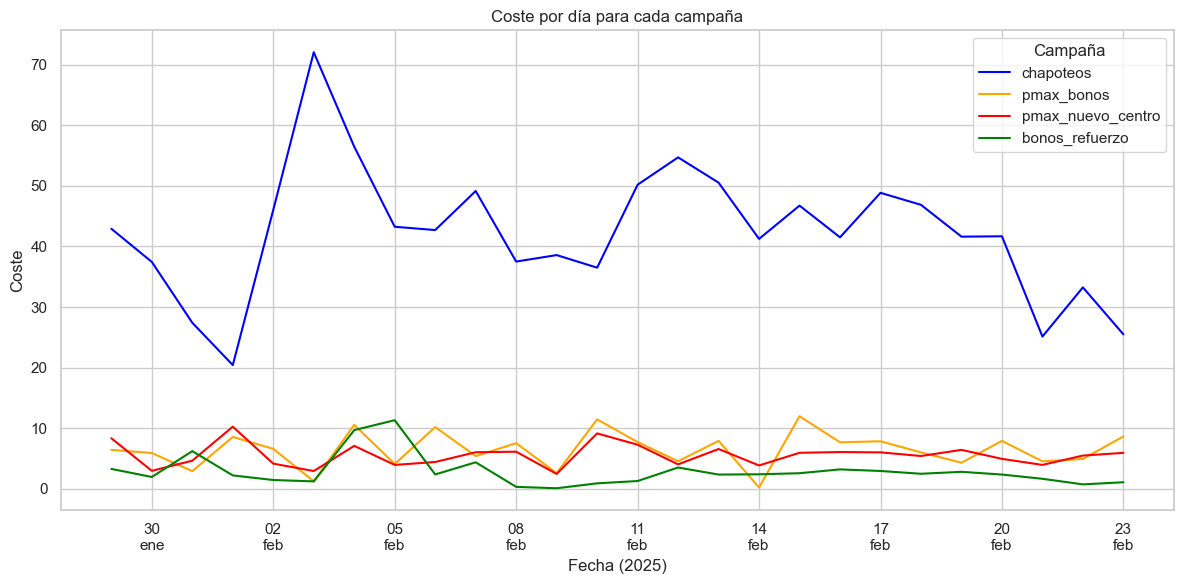

In [167]:
# Color map for campaigns
color_map = {
    'chapoteos': 'blue',
    'pmax_bonos': 'orange',
    'pmax_nuevo_centro': 'red',
    'bonos_refuerzo': 'green'
}

# Plot
plt.figure(figsize=(12, 6))

# Plot each campaign
for campaign, color in color_map.items():
    campaign_data = grouped_campaigns_performance[grouped_campaigns_performance['Campaña'] == campaign]
    plt.plot(campaign_data['Fecha'], campaign_data['Coste'], color=color, label=campaign)

# Customize the plot
plt.title('Coste por día para cada campaña')
plt.xlabel('Fecha (2025)')
plt.ylabel('Coste')

# Format x-axis to show every few days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Show every 3rd day

plt.xticks()
plt.legend(title='Campaña')
plt.tight_layout()

# Show the plot
plt.show()

### Análisis de costes diarios por campaña

#### Resumen ejecutivo

El gráfico muestra la evolución de los costes diarios para cuatro campañas diferentes de Chapoteos.

#### Información principal

1. **Campaña Chapoteos (Línea Azul)**
   - Presenta la mayor variabilidad y los costes más altos
   - Pico máximo de aproximadamente 70€ en torno al 5 de febrero
   - Fluctuaciones significativas entre 20€ y 50€ en la mayoría de los días
   - Muestra una tendencia de gasto más agresiva comparada con otras campañas

2. **Campañas secundarias (líneas naranja, roja y verde)**
   - Costes mucho más estables y consistentes
   - Oscilan principalmente entre 0€ y 10€ diarios
   - Menor inversión comparativa con la campaña principal

#### Análisis detallado

- **Estrategia de inversión**: 
  - La campaña principal (Chapoteos) parece tener un enfoque de inversión más dinámico
  
- **Campañas Complementarias**:
  - Campañas de "pmax_bonos", "pmax_nuevo_centro" y "bonos_refuerzo"
  - Mantienen una inversión constante y controlada
  - Posiblemente enfocadas en objetivos específicos o segmentos particulares

#### Conclusión

La estrategia de marketing muestra una aproximación dinámica, con una campaña principal que permite mayor flexibilidad y experimentación, complementada por campañas de soporte más estables y controladas.

***

##### 2. AWARENESS

##### * Impresiones

##### Definición de impresiones: el número de veces que un elemento o contenido específico es mostrado a los usuarios, independientemente de si fue interactuado o no.

##### 2.1 AWARENESS EN CAMPAÑA CHAPOTEOS POR DISPOSITIVO

In [168]:
# Filter the DataFrame for the 'chapoteos' campaign
awareness_chapoteos_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'chapoteos'].copy()

# Display the sorted DataFrame
awareness_chapoteos_campaign[['Fecha', 'Dispositivo', 'Impresiones', 'Coste']].head()

Fecha Dispositivo  Impresiones  Coste
2  2025-01-29   ordenador          829   2.45
3  2025-01-29       móbil         1476  40.47
4  2025-01-29      tablet           80   0.00
14 2025-01-30   ordenador          137   5.98
15 2025-01-30       móbil          708  31.47

##### 2.1.1 COMPARACIÓN DE IMPRESIONES Y COSTE PARA CADA DÍA

In [169]:
# Group by 'Fecha' and aggregate 'Impresiones' and 'Coste'
aggregated_chapoteos = awareness_chapoteos_campaign.groupby('Fecha')[['Impresiones', 'Coste']].sum().reset_index()

# Display the aggregated DataFrame
aggregated_chapoteos.head()

Fecha  Impresiones  Coste
0 2025-01-29         2385  42.92
1 2025-01-30          855  37.45
2 2025-01-31          734  27.41
3 2025-02-01          972  20.43
4 2025-02-02         2162  46.04

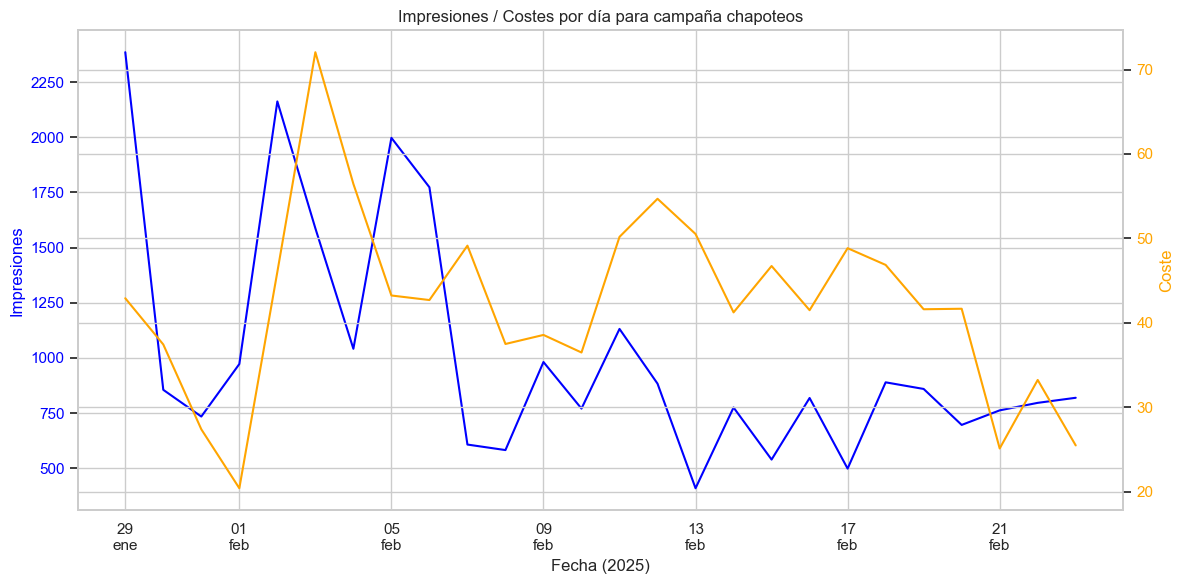

In [170]:
# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Impresiones
ax1.plot(aggregated_chapoteos['Fecha'], aggregated_chapoteos['Impresiones'], color='blue', label='Impresiones')
ax1.set_xlabel('Fecha (2025)')
ax1.set_ylabel('Impresiones', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Coste
ax2 = ax1.twinx()
ax2.plot(aggregated_chapoteos['Fecha'], aggregated_chapoteos['Coste'], color='orange', label='Coste')
ax2.set_ylabel('Coste', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Customize the plot
plt.title('Impresiones / Costes por día para campaña chapoteos')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Análisis de impresiones y costes diarios - Campaña Chapoteos

#### Resumen ejecutivo

El gráfico muestra la relación entre impresiones (línea azul) y costes (línea naranja) para la campaña Chapoteos.

#### Información principal

1. **Impresiones**
   - Máximo de impresiones: alrededor de 2,250 impresiones el 29 de enero
   - Alta variabilidad en el número de impresiones diarias
   - Oscilación entre 500 y 2,250 impresiones
   - Tendencia general de reducción de impresiones a lo largo del período

2. **Costes**
   - Máximo de costes: aproximadamente 60€ el 5 de febrero
   - Fluctuaciones significativas en el gasto diario
   - Rango de costes entre 20€ y 72€

#### Análisis detallado

##### **Relación entre impresiones y costes**

La dinámica entre impresiones y costes revela un patrón complejo que va más allá de una simple proporcionalidad directa. **Análisis de correlación** muestra que:

- No existe una relación lineal constante entre inversión y número de impresiones
- Algunos días presentan un **rendimiento eficiente**, con altas impresiones y costes moderados
- Otros días muestran una **inversión alta** sin un incremento proporcional de impresiones

Posibles explicaciones de esta variabilidad:
- Cambios en la competitividad de pujas
- Ajustes en la segmentación de audiencia
- Variaciones en la calidad y relevancia de los anuncios
- Modificaciones en los algoritmos de las plataformas publicitarias

##### Análisis estratégico

1. **Optimización de inversión**
   - Posible refinamiento del targeting
   - Ajustes en pujas y estrategia de anuncios
   - Búsqueda de mayor eficiencia en la conversión de impresiones

2. **Ciclos de campaña**
   - Indicios de diferentes fases de campaña
   - Posible experimentación con:
     * Nuevos creativos
     * Cambios en segmentación
     * Pruebas de diferentes enfoques publicitarios

#### Métricas clave

- **Impresiones promedio**: ~1,000 impresiones/día
- **Coste promedio**: ~40€/día
- **Variabilidad**: alta en ambas métricas

#### Puntos de Inflexión Destacados

1. **Máxima eficiencia**: 29 de enero
   - 2,250 impresiones con costes moderados
   - Posiblemente mejor segmentación o creatividad

2. **Mayor inversión**: 5 de febrero
   - Costes cercanos a 60€
   - Impresiones en niveles medios
   - Sugiere posible experimentación o ajuste de estrategia

#### Correlación: 20,34%

1. **Interpretación de la correlación**:
   - Correlación débil entre impresiones y costes
   - Sugiere una relación poco consistente entre inversión y resultados
   - Indica alta variabilidad en la eficiencia publicitaria

2. **Implicaciones estratégicas**:
   - La inversión no determina directamente el número de impresiones
   - Necesidad de optimizar la estrategia de segmentación
   - Posible ineficiencia en la asignación de presupuesto
   - Requiere análisis más profundo de los factores que impulsan las impresiones

#### Recomendaciones

1. Analizar la calidad de las impresiones
2. Evaluar el engagement generado
3. Revisar la estrategia de segmentación
4. Optimizar la relación coste-impacto
5. Identificar los factores que generan impresiones eficientes

#### Conclusión

La campaña Chapoteos demuestra una estrategia de marketing digital **dinámica** y **adaptativa**. La variabilidad en impresiones y costes sugiere un proceso continuo de optimización, donde cada inversión es una oportunidad para refinar el rendimiento publicitario.

La clave está en comprender que **no siempre más inversión significa más impresiones**, sino en encontrar el punto óptimo de eficiencia donde cada euro invertido genere el máximo impacto posible.

In [171]:
# Calculate the Pearson correlation
correlacion_pearson_chapoteos = aggregated_chapoteos['Impresiones'].corr(aggregated_chapoteos['Coste'])
# Convert the correlation to a percentage and format it to 2 decimal places
correlacion_porcentaje_chapoteos = correlacion_pearson_chapoteos * 100
print(f"Correlación de Pearson: {correlacion_porcentaje_chapoteos:.2f}%")

Correlación de Pearson: 20.34%


##### 2.2 AWARENESS EN CAMPAÑA PMAX_BONOS POR DISPOSITIVO

In [172]:
# Filter the DataFrame for the 'chapoteos' campaign
awareness_pmax_bonos_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'pmax_bonos'].copy()

# Display the sorted DataFrame
awareness_pmax_bonos_campaign[['Fecha', 'Dispositivo', 'Impresiones', 'Coste']].head()

Fecha Dispositivo  Impresiones  Coste
8  2025-01-29   ordenador           44   0.69
9  2025-01-29       móbil          284   5.38
10 2025-01-29      tablet            8   0.14
11 2025-01-29          TV            4   0.24
21 2025-01-30   ordenador           19   0.57

##### 2.2.1 COMPARACIÓN DE IMPRESIONES Y COSTE PARA CADA DÍA

In [173]:
# Group by 'Fecha' and aggregate 'Impresiones' and 'Coste'
aggregated_pmax_bonos = awareness_pmax_bonos_campaign.groupby('Fecha')[['Impresiones', 'Coste']].sum().reset_index()

# Display the aggregated DataFrame
aggregated_pmax_bonos.head()

Fecha  Impresiones  Coste
0 2025-01-29          340   6.45
1 2025-01-30          172   5.92
2 2025-01-31          156   2.93
3 2025-02-01          216   8.58
4 2025-02-02          121   6.61

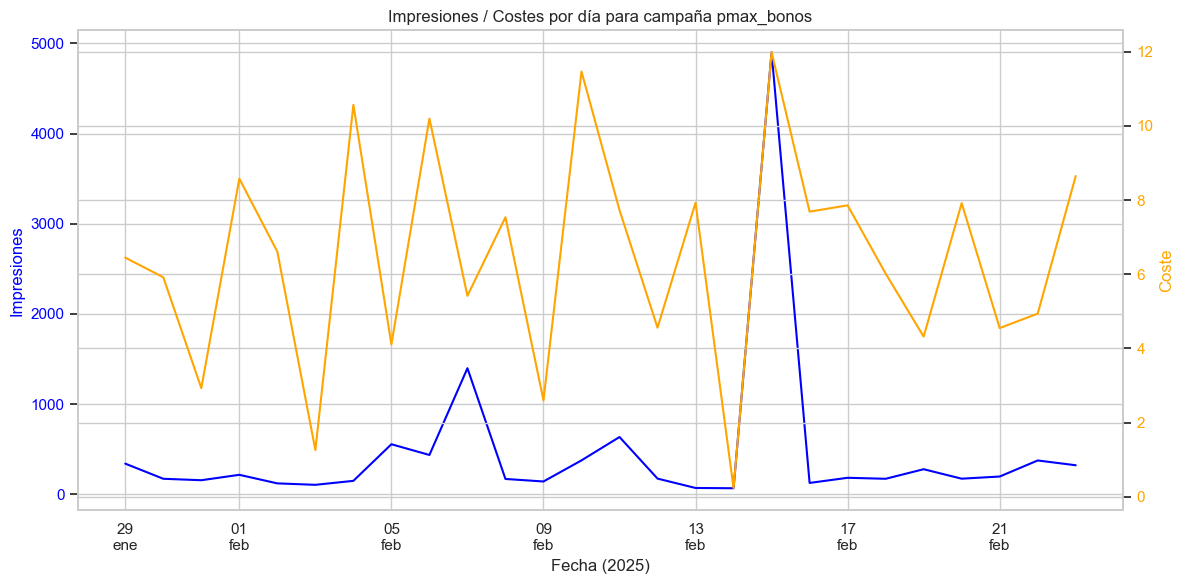

In [174]:
# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Impresiones
ax1.plot(aggregated_pmax_bonos['Fecha'], aggregated_pmax_bonos['Impresiones'], color='blue', label='Impresiones')
ax1.set_xlabel('Fecha (2025)')
ax1.set_ylabel('Impresiones', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Coste
ax2 = ax1.twinx()
ax2.plot(aggregated_pmax_bonos['Fecha'], aggregated_pmax_bonos['Coste'], color='orange', label='Coste')
ax2.set_ylabel('Coste', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Customize the plot
plt.title('Impresiones / Costes por día para campaña pmax_bonos')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Análisis de impresiones y costes diarios - Campaña Pmax_bonos

#### Resumen ejecutivo

El gráfico muestra la relación entre impresiones (línea azul) y costes (línea naranja) para la campaña Pmax_bonos.

#### Información principal

1. **Impresiones**
   - Máximo de impresiones: alrededor de 4,750 impresiones el 17 de febrero
   - Alta variabilidad en el número de impresiones diarias
   - Oscilación entre 500 y 4,750 impresiones
   - Patrón irregular de distribución de impresiones

2. **Costes**
   - Máximo de costes: aproximadamente 10€ en varios días
   - Fluctuaciones moderadas en el gasto diario
   - Rango de costes entre 0€ y 12€

#### Análisis detallado

##### **Relación entre impresiones y costes**

La dinámica entre impresiones y costes de la campaña Pmax_bonos revela un patrón complejo:

- **Correlación inconsistente** entre inversión y número de impresiones
- Días con inversión similar presentan resultados de impresiones muy diferentes
- Períodos de alta eficiencia alternados con momentos de baja productividad

Posibles factores explicativos:
- Variaciones en la estrategia de segmentación
- Cambios en la competitividad del mercado publicitario
- Ajustes en los algoritmos de optimización de la plataforma
- Diferencias en la relevancia y atractivo de los anuncios

##### Análisis estratégico

1. **Optimización de inversión**
   - Identificar los períodos de mayor eficiencia
   - Analizar los factores que contribuyen al alto rendimiento
   - Replicar estrategias exitosas en futuros períodos

2. **Ciclos de campaña**
   - Evidencia de experimentación publicitaria
   - Posibles pruebas de:
     * Diferentes creativos
     * Variaciones en segmentación
     * Ajustes en pujas y targeting

#### Métricas clave

- **Impresiones promedio**: ~2,000 impresiones/día
- **Coste promedio**: ~5€/día
- **Variabilidad**: Moderada a alta

#### Puntos de Inflexión Destacados

1. **Máxima eficiencia**: 17 de febrero
   - 4,750 impresiones
   - Costes cercanos a 10€
   - Posible punto óptimo de inversión y targeting

2. **Períodos de baja actividad**:
   - Inicios de febrero
   - Impresiones por debajo de 1,000
   - Costes mínimos

#### Correlación: 38,85%

1. **Interpretación de la correlación**:
   - Correlación moderada entre impresiones y costes
   - Indica una relación más predecible que la campaña Chapoteos
   - Sugiere cierta coherencia en la estrategia publicitaria

2. **Implicaciones estratégicas**:
   - Inversión muestra un impacto más directo en el número de impresiones
   - Mayor potencial de optimización y escalabilidad
   - Evidencia de una estrategia más refinada
   - Posibilidad de replicar elementos exitosos en otras campañas

#### Recomendaciones

1. Analizar la calidad y relevancia de las impresiones
2. Investigar los factores de éxito del 17 de febrero
3. Optimizar la segmentación
4. Mantener un enfoque experimental
5. Buscar consistencia en el rendimiento

#### Conclusión

La campaña Pmax_bonos muestra una estrategia de marketing digital **flexible** y **experimental**. La variabilidad en impresiones sugiere un proceso continuo de aprendizaje y optimización.

La clave está en comprender los **patrones de rendimiento** y adaptar constantemente la estrategia para maximizar la eficiencia publicitaria, reconociendo que cada variación es una oportunidad para mejorar el impacto de la campaña.

In [ ]:
# Calculate the Pearson correlation
correlacion_pearson_pmax_bonos = aggregated_pmax_bonos['Impresiones'].corr(aggregated_pmax_bonos['Coste'])
# Convert the correlation to a percentage and format it to 2 decimal places
correlacion_porcentaje_pmax_bonos = correlacion_pearson_pmax_bonos * 100
print(f"Correlación de Pearson: {correlacion_porcentaje_pmax_bonos:.2f}%")

Correlación de Pearson: 38.85%


Correlación de Pearson: 38.85%


##### 2.3 AWARENESS EN CAMPAÑA PMAX_NUEVO_CENTRO POR DISPOSITIVO

In [ ]:
# Filter the DataFrame for the 'chapoteos' campaign
awareness_pmax_nuevo_centro_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'pmax_nuevo_centro'].copy()

# Display the sorted DataFrame
awareness_pmax_nuevo_centro_campaign[['Fecha', 'Dispositivo', 'Impresiones', 'Coste']].head()

Fecha Dispositivo  Impresiones  Coste
5  2025-01-29   ordenador           38   2.73
6  2025-01-29       móbil          140   5.63
7  2025-01-29      tablet            4   0.00
17 2025-01-30   ordenador           26   0.03
18 2025-01-30       móbil          346   2.93

##### 2.3.1 COMPARACIÓN DE IMPRESIONES Y COSTE PARA CADA DÍA

In [ ]:
# Group by 'Fecha' and aggregate 'Impresiones' and 'Coste'
aggregated_pmax_nuevo_centro = awareness_pmax_nuevo_centro_campaign.groupby('Fecha')[['Impresiones', 'Coste']].sum().reset_index()

# Display the aggregated DataFrame
aggregated_pmax_nuevo_centro.head()

Fecha  Impresiones  Coste
0 2025-01-29          182   8.36
1 2025-01-30          389   2.98
2 2025-01-31          191   4.66
3 2025-02-01          438  10.27
4 2025-02-02          516   4.17

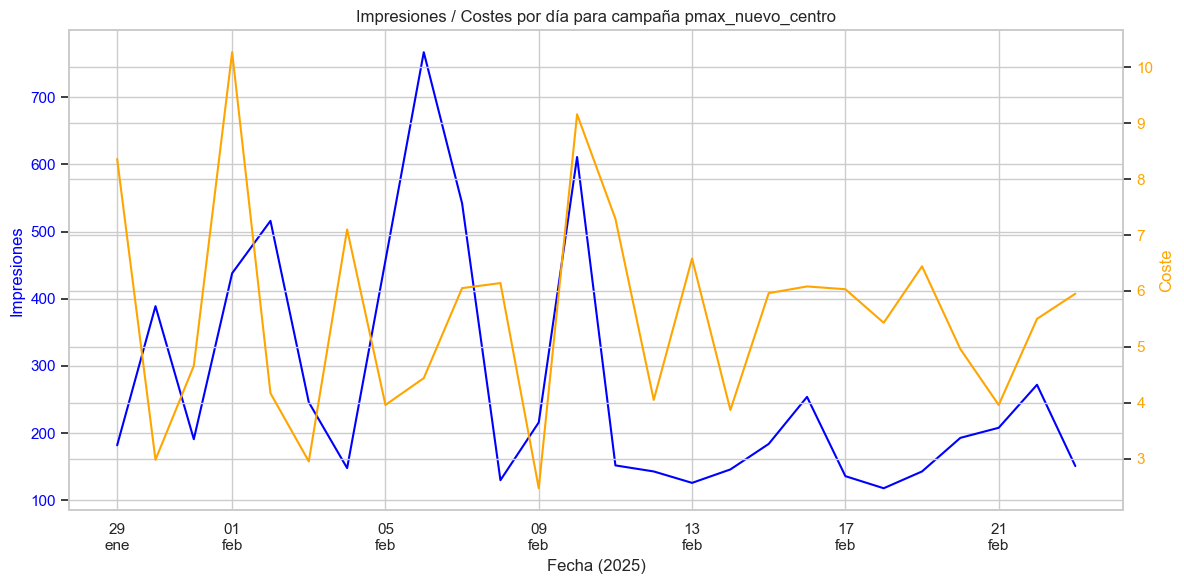

In [ ]:
# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Impresiones
ax1.plot(aggregated_pmax_nuevo_centro['Fecha'], aggregated_pmax_nuevo_centro['Impresiones'], color='blue', label='Impresiones')
ax1.set_xlabel('Fecha (2025)')
ax1.set_ylabel('Impresiones', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Coste
ax2 = ax1.twinx()
ax2.plot(aggregated_pmax_nuevo_centro['Fecha'], aggregated_pmax_nuevo_centro['Coste'], color='orange', label='Coste')
ax2.set_ylabel('Coste', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Customize the plot
plt.title('Impresiones / Costes por día para campaña pmax_nuevo_centro')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Análisis de impresiones y costes diarios - Campaña Pmax_nuevo_centro

#### Resumen ejecutivo

El gráfico muestra la relación entre impresiones (línea azul) y costes (línea naranja) para la campaña Pmax_nuevo_centro.

#### Información principal

1. **Impresiones**
   - Máximo de impresiones: Alrededor de 767 impresiones el 6 de febrero
   - Variabilidad moderada en el número de impresiones diarias
   - Oscilación entre 118 y 767 impresiones
   - Patrón irregular de distribución de impresiones

2. **Costes**
   - Máximo de costes: aproximadamente 10€ el 1 de febrero
   - Fluctuaciones moderadas en el gasto diario
   - Rango de costes entre 2€ y 10€

#### Análisis detallado

##### **Relación entre impresiones y costes**

La dinámica entre impresiones y costes de la campaña Pmax_nuevo_centro revela un patrón complejo:

- **Correlación no lineal** entre inversión y número de impresiones
- Días con inversión similar producen resultados de impresiones muy diferentes
- Alternancia entre períodos de alta y baja eficiencia

Posibles factores explicativos:
- Variaciones en la estrategia de segmentación
- Cambios en la competitividad del mercado publicitario
- Ajustes en los algoritmos de optimización
- Diferencias en la relevancia de los anuncios

##### Análisis estratégico

1. **Optimización de inversión**
   - Identificar períodos de mayor rendimiento
   - Analizar factores de éxito en días pico
   - Replicar estrategias más efectivas

2. **Ciclos de campaña**
   - Evidencia de experimentación publicitaria
   - Posibles pruebas de:
     * Variaciones en creativos
     * Ajustes de segmentación
     * Modificaciones en estrategia de pujas

#### Métricas clave

- **Impresiones promedio**: ~350 impresiones/día
- **Coste promedio**: ~5€/día
- **Variabilidad**: moderada

#### Puntos de inflexión destacados

1. **Máxima eficiencia**: 6 de febrero
   - 767 impresiones
   - Costes cercanos a 5€
   - Posible punto óptimo de inversión

2. **Períodos de baja actividad**:
   - Mediados de febrero
   - Impresiones por debajo de 200
   - Costes reducidos

#### Correlación: 4,59%

1. **Interpretación de la correlación**:
   - Correlación muy débil, prácticamente inexistente
   - Sugiere una desconexión casi total entre inversión e impresiones
   - Indica alta imprevisibilidad en el rendimiento de la campaña

2. **Implicaciones estratégicas**:
   - Necesidad urgente de reevaluación de la estrategia
   - Posibles problemas significativos en:
      - Segmentación de audiencia
      - Diseño de anuncios
      - Configuración de campaña
      - Requiere un análisis exhaustivo y posible rediseño completo

#### Recomendaciones

1. Analizar la calidad de las impresiones
2. Investigar los factores de éxito del 6 de febrero
3. Optimizar la segmentación
4. Mantener enfoque experimental
5. Buscar consistencia en el rendimiento

#### Conclusión

La campaña Pmax_nuevo_centro demuestra una estrategia de marketing digital **adaptativa** y **experimental**. La variabilidad en impresiones sugiere un proceso continuo de aprendizaje y optimización.

La clave está en comprender los **patrones de rendimiento** y adaptar constantemente la estrategia para maximizar la eficiencia publicitaria, reconociendo que cada variación es una oportunidad para mejorar el impacto de la campaña.

In [ ]:
# Calculate the Pearson correlation
correlacion_pearson_pmax_nuevo_centro = aggregated_pmax_nuevo_centro['Impresiones'].corr(aggregated_pmax_nuevo_centro['Coste'])
# Convert the correlation to a percentage and format it to 2 decimal places
correlacion_porcentaje_pmax_nuevo_centro = correlacion_pearson_pmax_nuevo_centro * 100
print(f"Correlación de Pearson: {correlacion_porcentaje_pmax_nuevo_centro:.2f}%")

Correlación de Pearson: 4.59%


##### 2.4 AWARENESS EN CAMPAÑA BONOS_REFUERZO POR DISPOSITIVO

In [ ]:
# Filter the DataFrame for the 'chapoteos' campaign
awareness_bonos_refuerzo_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'bonos_refuerzo'].copy()

# Display the sorted DataFrame
awareness_bonos_refuerzo_campaign[['Fecha', 'Dispositivo', 'Impresiones', 'Coste']].head()

Fecha Dispositivo  Impresiones  Coste
0  2025-01-29   ordenador            7   0.01
1  2025-01-29       móbil           35   3.29
12 2025-01-30   ordenador            6   0.58
13 2025-01-30       móbil           25   1.39
24 2025-01-31   ordenador           12   4.91

##### 2.4.1 COMPARACIÓN DE IMPRESIONES Y COSTE PARA CADA DÍA

In [ ]:
# Group by 'Fecha' and aggregate 'Impresiones' and 'Coste'
aggregated_bonos_refuerzo = awareness_bonos_refuerzo_campaign.groupby('Fecha')[['Impresiones', 'Coste']].sum().reset_index()

# Display the aggregated DataFrame
aggregated_bonos_refuerzo.head()

Fecha  Impresiones  Coste
0 2025-01-29           42   3.30
1 2025-01-30           31   1.97
2 2025-01-31           40   6.23
3 2025-02-01           48   2.23
4 2025-02-02           27   1.47

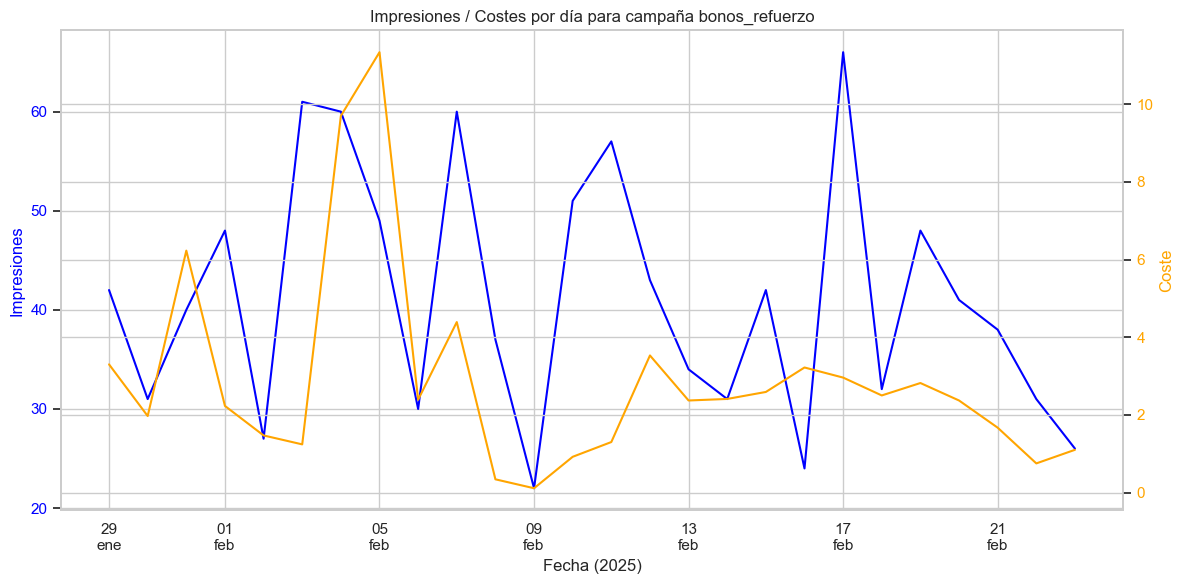

In [ ]:
# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Impresiones
ax1.plot(aggregated_bonos_refuerzo['Fecha'], aggregated_bonos_refuerzo['Impresiones'], color='blue', label='Impresiones')
ax1.set_xlabel('Fecha (2025)')
ax1.set_ylabel('Impresiones', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Coste
ax2 = ax1.twinx()
ax2.plot(aggregated_bonos_refuerzo['Fecha'], aggregated_bonos_refuerzo['Coste'], color='orange', label='Coste')
ax2.set_ylabel('Coste', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Customize the plot
plt.title('Impresiones / Costes por día para campaña bonos_refuerzo')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Análisis de impresiones y costes diarios - Campaña Bonos_refuerzo

#### Resumen ejecutivo

El gráfico muestra la relación entre impresiones (línea azul) y costes (línea naranja) para la campaña Bonos_refuerzo.

#### Información principal

1. **Impresiones**
   - Máximo de impresiones: 66 impresiones el 17 de febrero
   - Alta variabilidad en el número de impresiones diarias
   - Oscilación entre 22 y 66 impresiones
   - Patrón irregular de distribución de impresiones

2. **Costes**
   - Máximo de costes: aproximadamente 11€ el 5 de febrero
   - Fluctuaciones moderadas en el gasto diario
   - Rango de costes entre 0.11€ y 11€

#### Análisis detallado

##### **Relación entre impresiones y costes**

La dinámica entre impresiones y costes de la campaña Bonos_refuerzo revela un patrón complejo:

- **Correlación débil** entre inversión y número de impresiones
- Días con inversión similar producen resultados de impresiones muy diferentes
- Alternancia entre períodos de alta y baja eficiencia

Posibles factores explicativos:
- Variaciones en la estrategia de segmentación
- Cambios en la competitividad del mercado publicitario
- Ajustes en los algoritmos de optimización
- Diferencias en la relevancia de los anuncios

##### Análisis estratégico

1. **Optimización de inversión**
   - Identificar períodos de mayor rendimiento
   - Analizar factores de éxito en días pico
   - Replicar estrategias más efectivas

2. **Ciclos de campaña**
   - Evidencia de experimentación publicitaria
   - Posibles pruebas de:
     * Variaciones en creativos
     * Ajustes de segmentación
     * Modificaciones en estrategia de pujas

#### Métricas clave

- **Impresiones promedio**: 41 impresiones/día
- **Coste promedio**: ~3€/día
- **Variabilidad**: alta

#### Puntos de inflexión destacados

1. **Máxima eficiencia**: 17 de febrero
   - 66 impresiones
   - Costes cercanos a 3€
   - Posible punto óptimo de inversión

2. **Períodos de baja actividad**:
   - Mediados de febrero
   - Impresiones por debajo de 30
   - Costes reducidos

#### Correlación: 36,60%

1. **Interpretación de la correlación**:
   - Correlación moderada entre impresiones y costes
   - Similar al rendimiento de Pmax_bonos
   - Indica cierta consistencia en la relación inversión-resultados

2. **Implicaciones estratégicas**:
   - Inversión muestra un impacto relativamente predecible
   - Potencial de mejora y optimización
   - Evidencia de una estrategia más estructurada
   - Posibilidad de realizar ajustes incrementales para mejorar el rendimiento

#### Recomendaciones

1. Analizar la calidad de las impresiones
2. Investigar los factores de éxito del 17 de febrero
3. Optimizar la segmentación
4. Mantener enfoque experimental
5. Buscar consistencia en el rendimiento

#### Conclusión

La campaña Bonos_refuerzo muestra una estrategia de marketing digital **limitada** y **experimental**. La baja cantidad de impresiones sugiere un enfoque muy específico o una estrategia de nicho.

La clave está en comprender los **patrones de rendimiento** y adaptar constantemente la estrategia para maximizar la eficiencia publicitaria, reconociendo que cada variación es una oportunidad para mejorar el impacto de la campaña, especialmente en una campaña con un alcance tan reducido.

In [ ]:
# Calculate the Pearson correlation
correlacion_pearson_bonos_refuerzo = aggregated_bonos_refuerzo['Impresiones'].corr(aggregated_bonos_refuerzo['Coste'])
# Convert the correlation to a percentage and format it to 2 decimal places
correlacion_porcentaje_bonos_refuerzo = correlacion_pearson_bonos_refuerzo * 100
print(f"Correlación de Pearson: {correlacion_porcentaje_bonos_refuerzo:.2f}%")

Correlación de Pearson: 36.60%


***

##### 3. ENGAGEMENT

##### * Interacciones

##### Definición de interacciones: acciones específicas y medibles que un usuario realiza en un sitio web o aplicación, que generan un registro de actividad.

##### 3.1 CAMPAÑA CHAPOTEOS: INTERACCIONES POR DISPOSITIVO

In [ ]:
# Filter the DataFrame for the 'chapoteos' campaign
engagement_chapoteos_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'chapoteos']

# Aggregate the data by 'Fecha' and 'Dispositivo', summing 'Interacciones'
aggregated_engagement_chapoteos_campaign = engagement_chapoteos_campaign.groupby(['Fecha', 'Dispositivo'])['Interacciones'].sum().reset_index()

# Display the sorted DataFrame
aggregated_engagement_chapoteos_campaign.head()

Fecha Dispositivo  Interacciones
0 2025-01-29       móbil             66
1 2025-01-29   ordenador              4
2 2025-01-29      tablet              0
3 2025-01-30       móbil             51
4 2025-01-30   ordenador              5

##### 3.2 CAMPAÑA PMAX_BONOS: INTERACCIONES POR DISPOSITIVO

In [ ]:
# Filter the DataFrame for the 'pmax_bonos' campaign
engagement_pmax_bonos_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'pmax_bonos']

# Aggregate the data by 'Fecha' and 'Dispositivo', summing 'Interacciones'
aggregated_engagement_pmax_bonos_campaign = engagement_pmax_bonos_campaign.groupby(['Fecha', 'Dispositivo'])['Interacciones'].sum().reset_index()

# Display the sorted DataFrame
aggregated_engagement_pmax_bonos_campaign.head()

Fecha Dispositivo  Interacciones
0 2025-01-29          TV              3
1 2025-01-29       móbil             22
2 2025-01-29   ordenador              1
3 2025-01-29      tablet              1
4 2025-01-30       móbil             13

##### 3.3 CAMPAÑA PMAX_NUEVO_CENTRO: INTERACCIONES POR DISPOSITIVO

In [ ]:
# Filter the DataFrame for the 'pmax_nuevo_centro' campaign
engagement_pmax_nuevo_centro_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'pmax_nuevo_centro']

# Aggregate the data by 'Fecha' and 'Dispositivo', summing 'Interacciones'
aggregated_engagement_pmax_nuevo_centro_campaign = engagement_pmax_nuevo_centro_campaign.groupby(['Fecha', 'Dispositivo'])['Interacciones'].sum().reset_index()

# Display the sorted DataFrame
aggregated_engagement_pmax_nuevo_centro_campaign.head()

Fecha Dispositivo  Interacciones
0 2025-01-29       móbil             15
1 2025-01-29   ordenador              3
2 2025-01-29      tablet              0
3 2025-01-30          TV              1
4 2025-01-30       móbil             31

##### 3.4 CAMPAÑA BONOS_REFUERZO: INTERACCIONES POR DISPOSITIVO

In [ ]:
# Filter the DataFrame for the 'bonos_refuerzo' campaign
engagement_bonos_refuerzo_campaign = campaigns_performance[campaigns_performance['Campaña'] == 'bonos_refuerzo']

# Aggregate the data by 'Fecha' and 'Dispositivo', summing 'Interacciones'
aggregated_engagement_bonos_refuerzo_campaign = engagement_bonos_refuerzo_campaign.groupby(['Fecha', 'Dispositivo'])['Interacciones'].sum().reset_index()

# Display the sorted DataFrame
aggregated_engagement_bonos_refuerzo_campaign.head()

Fecha Dispositivo  Interacciones
0 2025-01-29       móbil             13
1 2025-01-29   ordenador              1
2 2025-01-30       móbil              6
3 2025-01-30   ordenador              1
4 2025-01-31       móbil              7

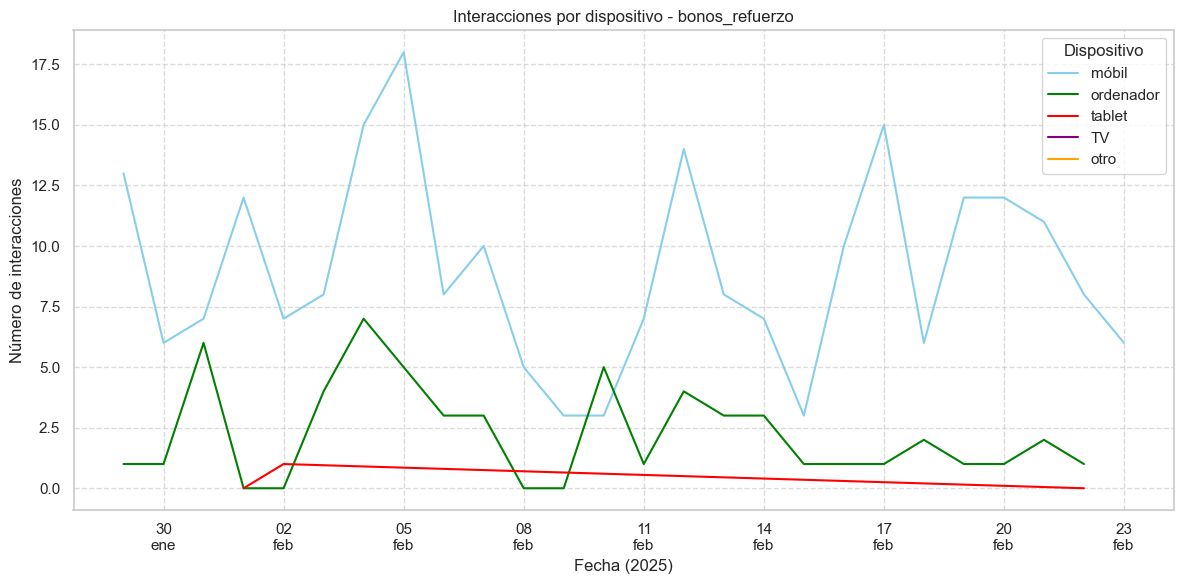

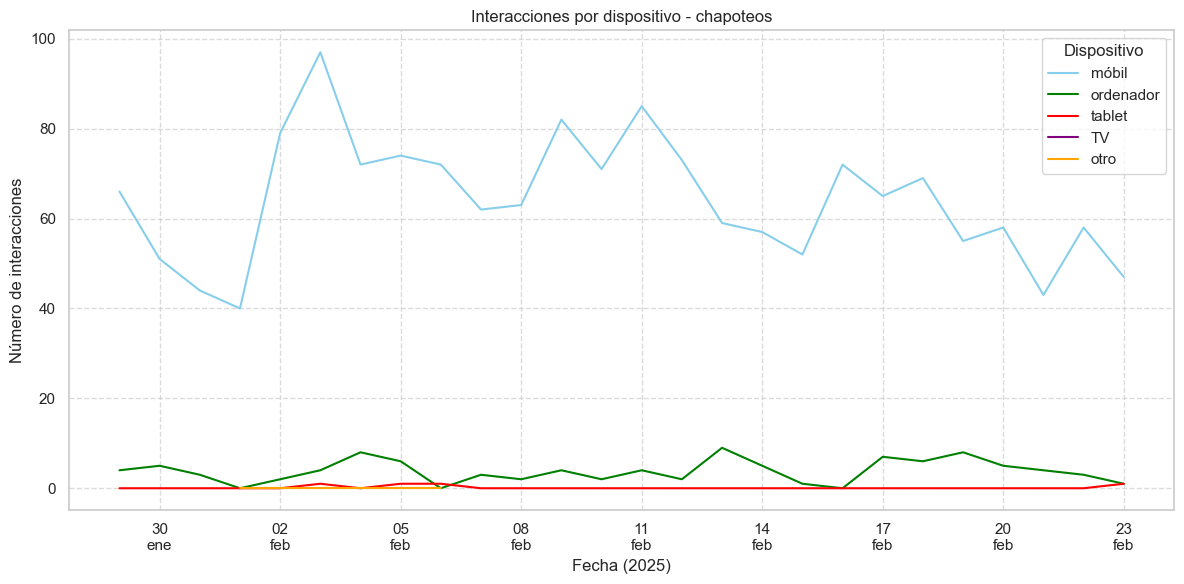

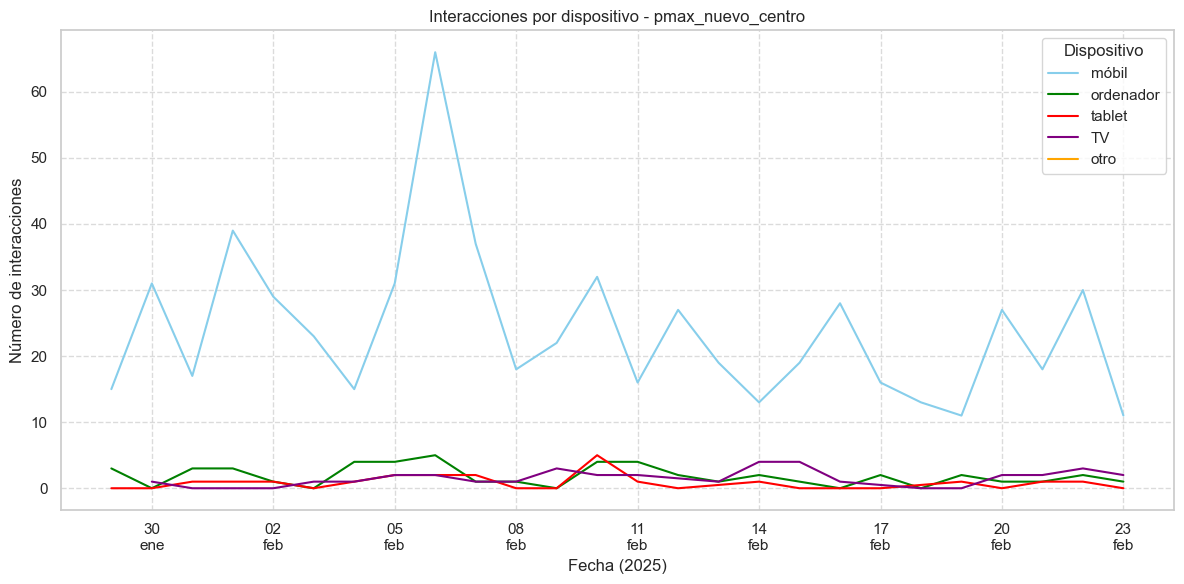

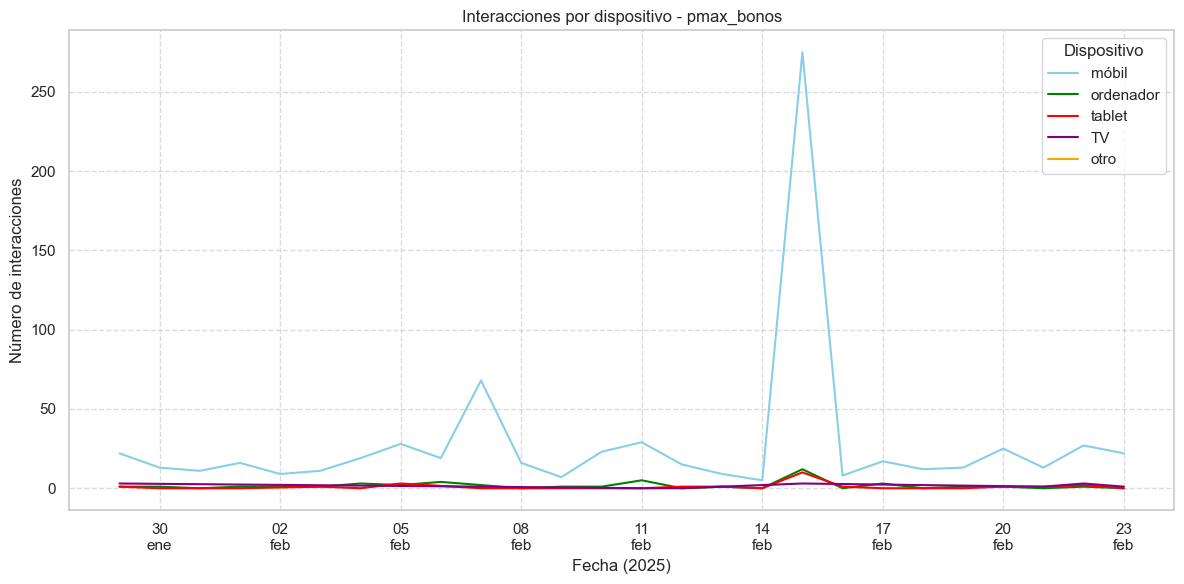

In [ ]:
# Color map for devices
device_colors = {
    'móbil': 'skyblue',
    'ordenador': 'green',
    'tablet': 'red',
    'TV': 'purple',
    'otro': 'orange'
}

# Get unique campaigns
unique_campaigns = campaigns_performance['Campaña'].unique()

# Create a plot for each campaign
for campaign in unique_campaigns:
    # Filter data for the current campaign
    campaign_data = campaigns_performance[campaigns_performance['Campaña'] == campaign]
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot a line for each device
    for device in device_colors.keys():
        # Filter data for the specific device
        device_data = campaign_data[campaign_data['Dispositivo'] == device]
        
        # Group by date and sum interactions
        device_interactions = device_data.groupby('Fecha')['Interacciones'].sum()
        
        # Plot the line
        plt.plot(device_interactions.index, device_interactions.values, 
                 color=device_colors[device], 
                 label=device)
    
    # Format x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Customize the plot
    plt.title(f'Interacciones por dispositivo - {campaign}')
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Número de interacciones')
    plt.legend(title='Dispositivo')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

#### Interacciones por dispositivo - bonos_refuerzo:

1. **Tendencias generales**:
   - El dispositivo móvil (línea azul) domina claramente en el número de interacciones, con picos significativos a lo largo del período.
   - Los ordenadores (línea verde) tienen un número moderado de interacciones, con algunas fluctuaciones.
   - Las tablets (línea roja) y otros dispositivos (línea amarilla) muestran interacciones mínimas, casi constantes.

2. **Insights por dispositivo**:
   - **Móvil**: presenta picos notables, especialmente a principios y mediados de febrero, lo que indica momentos de alta actividad posiblemente relacionados con campañas o eventos específicos.
   - **Ordenador**: aunque tiene menos interacciones que los móviles, muestra un patrón de uso más estable con algunos aumentos.
   - **Tablet y otros**: mantienen un nivel de interacción muy bajo, lo que sugiere que no son los dispositivos preferidos para estas interacciones.

3. **Recomendaciones**:
   - **Móvil**: continuar enfocando estrategias en dispositivos móviles, dado su alto nivel de interacción.
   - **Ordenador**: explorar oportunidades para aumentar la interacción, quizás optimizando la experiencia de usuario.
   - **Tablet y otros**: evaluar la necesidad de mejorar la accesibilidad o el contenido para estos dispositivos si se desea aumentar su uso.

En resumen, el móvil es el dispositivo más utilizado para interacciones, mientras que las tablets y otros dispositivos tienen un uso limitado. Las estrategias deben centrarse en maximizar el potencial del móvil y explorar formas de mejorar la interacción en otros dispositivos.

#### Interacciones por dispositivo - chapoteos:

1. **Tendencias generales**:
   - El dispositivo móvil (línea azul) domina en el número de interacciones, con picos significativos a principios de febrero.
   - Los ordenadores (línea verde) tienen un número bajo de interacciones, con pequeñas fluctuaciones.
   - Las tablets (línea roja), TV (línea morada) y otros dispositivos (línea naranja) muestran interacciones mínimas y constantes.

2. **Insights por dispositivo**:
   - **Móvil**: presenta un alto nivel de interacciones, especialmente a principios de febrero, lo que indica una fuerte preferencia por este dispositivo.
   - **Ordenador**: aunque tiene menos interacciones que los móviles, muestra un uso constante con ligeros aumentos.
   - **Tablet, TV y otros**: mantienen un nivel de interacción muy bajo, sugiriendo que no son los dispositivos preferidos para estas interacciones.

3. **Recomendaciones**:
   - **Móvil**: continuar enfocando estrategias en dispositivos móviles, dado su alto nivel de interacción.
   - **Ordenador**: explorar oportunidades para aumentar la interacción, quizás optimizando la experiencia de usuario.
   - **Tablet, TV y otros**: evaluar la necesidad de mejorar la accesibilidad o el contenido para estos dispositivos si se desea aumentar su uso.

En resumen, el móvil es el dispositivo más utilizado para interacciones, mientras que otros dispositivos tienen un uso limitado. Las estrategias deben centrarse en maximizar el potencial del móvil y explorar formas de mejorar la interacción en otros dispositivos.

#### Interacciones por dispositivo - pmax_nuevo_centro:

1. **Tendencias generales**:
   - El dispositivo móvil (línea azul) tiene el mayor número de interacciones, con un pico significativo a principios de febrero.
   - Los ordenadores (línea verde), tablets (línea roja), TV (línea morada) y otros dispositivos (línea naranja) muestran un número bajo y constante de interacciones.

2. **Insights por Ddspositivo**:
   - **Móvil**: domina en interacciones, especialmente con un pico destacado a principios de febrero, indicando un evento o campaña que impulsó la actividad.
   - **Ordenador, tablet, TV y otros**: mantienen niveles bajos de interacción, sugiriendo que no son los dispositivos preferidos para estas actividades.

3. **Recomendaciones**:
   - **Móvil**: continuar enfocando estrategias en dispositivos móviles, dado su alto nivel de interacción.
   - **Otros dispositivos**: evaluar la necesidad de mejorar la accesibilidad o el contenido para aumentar su uso, si es necesario.

En resumen, el móvil es el dispositivo más utilizado para interacciones, mientras que otros dispositivos tienen un uso limitado. Las estrategias deben centrarse en maximizar el potencial del móvil y considerar mejoras para otros dispositivos si se desea aumentar su participación.

#### Interacciones por dispositivo - pmax_bonos:

1. **Tendencias generales**:
   - El dispositivo móvil (línea azul) tiene el mayor número de interacciones, con un pico extremadamente alto a mediados de febrero.
   - Los ordenadores (línea verde), tablets (línea roja), TV (línea morada) y otros dispositivos (línea naranja) muestran un número bajo y constante de interacciones.

2. **Insights por dispositivo**:
   - **Móvil**: domina en interacciones, especialmente con un pico destacado a mediados de febrero, indicando un evento o campaña que impulsó la actividad de manera significativa.
   - **Ordenador, tablet, TV y otros**: mantienen niveles bajos de interacción, sugiriendo que no son los dispositivos preferidos para estas actividades.

3. **Recomendaciones**:
   - **Móvil**: continuar enfocando estrategias en dispositivos móviles, dado su alto nivel de interacción y capacidad para generar picos significativos.
   - **Otros dispositivos**: evaluar la necesidad de mejorar la accesibilidad o el contenido para aumentar su uso, si es necesario.

En resumen, el móvil es el dispositivo más utilizado para interacciones, especialmente durante eventos clave. Las estrategias deben centrarse en maximizar el potencial del móvil y considerar mejoras para otros dispositivos si se desea aumentar su participación.

***

## Análisis de Campañas en Meta

### Introducción al Análisis de Meta (Facebook e Instagram)

El presente análisis de Meta Ads para Chapoteos Escuela de Natación representa un estudio detallado y multidimensional del rendimiento digital en las plataformas de Facebook e Instagram, proporcionando una visión estratégica de las acciones de marketing.

#### Estructura del Análisis

El estudio se compone de cuatro componentes fundamentales, cada uno ofreciendo información específica sobre el comportamiento de las campañas:

1. **Análisis de Costes**
   - Desglose de costes por:
     * Campañas
     * Conjuntos de anuncios (Ad Sets)
     * Anuncios individuales
     * Plataformas (Facebook, Instagram, Audience Network, Messenger)
   - Evaluación de la eficiencia económica
   - Comparativa de inversión entre diferentes estrategias

2. **Awareness (Reconocimiento de Marca)**
   - Métricas de visibilidad por:
     * Campañas
     * Conjuntos de anuncios
     * Anuncios individuales
     * Plataformas
   - Análisis comparativo de:
     * Alcance
     * Impresiones
     * Relación coste-impacto
   - Evaluación del potencial de exposición de marca

3. **Engagement (Compromiso)**
   - Análisis de interacción por:
     * Campañas
     * Conjuntos de anuncios
     * Anuncios individuales
     * Plataformas
   - Métricas de interacción:
     * Vistas totales
     * Clics (todos los tipos)
     * Engagement en página
     * Visitas a perfil de Instagram
   - Evaluación de la capacidad de generar interés y participación

4. **Conversión**
   - Análisis de resultados por:
     * Campañas
     * Conjuntos de anuncios
     * Anuncios individuales
     * Plataformas
   - Métricas de conversión:
     * Leads generados
     * Leads de sitio web
     * Leads de Meta
     * Ventas
     * Clics en enlaces
     * Follows o likes
     * Recuerdo de anuncio estimado
   - Identificación de puntos críticos de conversión

### Objetivo del Análisis

Los propósitos fundamentales de este estudio son:

- Comprender el rendimiento detallado de las campañas en Meta
- Identificar estrategias de marketing más efectivas
- Optimizar la inversión publicitaria
- Mejorar la eficacia de futuras campañas

### Consideraciones Importantes

- Datos extraídos directamente de plataformas oficiales
- Aplicación de filtros de calidad para garantizar integridad

##### 1. CAMPAÑAS | SET DE ANUNCIOS | ANUNCIOS | PLATAFORMAS

In [ ]:
# Load the data
raw_data = pd.read_csv(
    '/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/google analytics/raw_data.csv',
    encoding='utf-8'
)

# Rename columns
raw_data = raw_data.rename(columns={
    'Campaign name': 'Campaña',
    'Ad Set Name': 'Set anuncios',
    'Ad name': 'Anuncio',
    'Day': 'Fecha',
    'Result type': 'Tipo de resultado',
    'Results': 'Resultados',
    'Reach': 'Alcance',
    'Platform': 'Plataforma',
    'Impressions': 'Impresiones',
    'Amount spent (EUR)': 'Coste',
    'Link clicks': 'Clics en link',
    'Views': 'Vistas',
    'Clicks (all)': 'Clics (todos)',
    'Page engagement': 'Engagement en página',
    'Follows or likes': 'Follows o likes',
    'Instagram profile visits': 'Visitas a perfil IG',
    'Leads': 'Leads',
    'Website leads': 'Leads de sitio web',
    'Objective': 'Objetivo',
    'Estimated ad recall lift (people)': 'Recuerdo anuncio estimado',
    'Website purchases conversion value': 'Ventas',
    'Meta Leads': 'Meta leads'
})

# Define mappings
campaign_mapping = {
    'MONTECLARO': 'Monteclaro',
    'Nueva campaña de Ventas san valentin': 'San_valentin',
    'Nueva campaña de Clientes potenciales instagram..': 'Clientes_potenciales_ig',
    'matronatacion agosto conversion': 'Matronatacion_agosto',
    'Reconocimiento de la marca - Copia': 'Reconocimiento_marca',
    'aipap reconocimiento de la marca - Copia': 'Aipap_reconocimiento_marca',
    'AIPAP conversión - (anuncio)': 'Aipap_anuncio',
    'promoción post  Chapoteos 1 Febrero': 'Post_chapoteos_1_febrero',
    'Redes': 'Redes',
    'Redes seguidores': 'Redes_seguidores',
    'matronatacion conversion': 'Matronatacion_conversion',
    'EMBARAZADAS conversión - (anuncio)': 'Embarazadas_anuncio',
    'promoción post  Chapoteos': 'Post_chapoteos',
    'Nueva campaña de Ventas': 'Campaña_ventas',
    'NUEVO CENTRO MONTECLARO': 'Nuevo_centro_monteclaro',
    'clientes poteciales reel de centro clase de prueba': 'Clientes_potenciales_reel',
    'campaña centro villalkor': 'Centro_villalkor'
}

tipo_resultado_mapping = {
    'Website leads': 'Leads de sitio web',
    'Follows or likes': 'Follows o likes',
    'Estimated ad recall lift (people)': 'Recuerdo anuncio estimado',
    'Link clicks': 'Clics en link',
    'Website purchases': 'Compras en sitio web',
    'Meta Leads': 'Meta leads'
}

objetivo_mapping = {
    'OUTCOME_LEADS': 'Leads',
    'OUTCOME_ENGAGEMENT': 'Engagement',
    'OUTCOME_AWARENESS': 'Conciencia',
    'LINK_CLICKS': 'Clics en link',
    'OUTCOME_SALES': 'Ventas'
}

set_anuncios_mapping = {
    'promoción Chapoteos 4 octubre': 'Chapoteos_4_oct',
    'Promoción de Natacion bebes Chapoteos': 'Natacion_bebes_chapoteos',
    'Nuevo conjunto de anuncios de Clientes potenciales': 'Clientes_potenciales',
    'AIPAP Reconocimiento de marca': 'Aipap_reconocimiento_marca',
    'Reconocimiento de la marca': 'Reconocimiento_marca',
    'matro intereses conversión': 'Matro_intereses_conversion',
    'Nuevo conjunto de anuncios de Ventas': 'Ventas',
    'Aipap conversión': 'Aipap_conversion',
}

ad_name_mapping = {
    'video matro': 'Video_matro',
    'promocionar chapoteos 29 nove': 'Chapoteos_29_nov',
    'imagen julio 2024- Copia': 'Copia_imagen_julio_24',
    'promocionar chapoteos - Copia': 'Copia_chapoteos',
    '[14/03/2022] Promoción de Natacion bebes Chapoteos': 'Natacion_bebes_chapoteos',
    'Nuevo anuncio de Clientes potenciales': 'Clientes_potenciales',
    'Nuevo anuncio de Clientes potenciales - Copia': 'Copia_clientes_potenciales',
    'ANUNCIO NUEVO CENTRO MONTECLARO': 'Nuevo_monteclaro',
    'Reconocimiento de marca AIPAP': 'Reconocimiento_marca_aipap',
    'Reconocimiento de la marca': 'Reconocimiento_marca',
    'Nuevo anuncio de Ventas': 'Ventas',
    'video villalkor': 'Video_villalkor',
    'Nuevo anuncio de Clientes potenciales reel': 'Reel_clientes_potenciales'
}

# Apply mappings
raw_data['Campaña'] = raw_data['Campaña'].replace(campaign_mapping)
raw_data['Tipo de resultado'] = raw_data['Tipo de resultado'].replace(tipo_resultado_mapping)
raw_data['Objetivo'] = raw_data['Objetivo'].replace(objetivo_mapping)
raw_data['Set anuncios'] = raw_data['Set anuncios'].replace(set_anuncios_mapping)
raw_data['Anuncio'] = raw_data['Anuncio'].replace(ad_name_mapping)

# Convert 'Fecha' to datetime
raw_data['Fecha'] = pd.to_datetime(raw_data['Fecha'], errors='coerce')

# Convert specified columns to integers
columns_to_convert = [
    'Resultados', 
    'Clics en link', 
    'Engagement en página', 
    'Follows o likes', 
    'Leads', 
    'Leads de sitio web'
]

for column in columns_to_convert:
    raw_data[column] = pd.to_numeric(raw_data[column], errors='coerce').astype('Int64')

# Fill NaN values with 0 for specified columns
columns_to_fill = [
    'Clics en link', 
    'Engagement en página', 
    'Follows o likes', 
    'Leads', 
    'Leads de sitio web'
]

raw_data[columns_to_fill] = raw_data[columns_to_fill].fillna(0)

# Define a function to calculate the 'Resultados' value based on 'Objetivo'
def calculate_resultados(row):
    if pd.isna(row['Resultados']):
        if row['Objetivo'] == 'Leads':
            return int(row[['Leads', 'Leads de sitio web', 'Meta leads']].sum())
        elif row['Objetivo'] == 'Conciencia':
            return int(row[['Alcance', 'Impresiones', 'Recuerdo anuncio estimado']].sum())
        elif row['Objetivo'] == 'Engagement':
            return int(row[['Vistas', 'Clics (todos)', 'Follows o likes', 'Visitas a perfil IG']].sum())
        elif row['Objetivo'] == 'Clics en link':
            return int(row[['Clics en link']].sum())
        elif row['Objetivo'] == 'Compras en sitio web':
            return int(row[['Ventas']].sum())
    return row['Resultados']

# Apply the function to each row in the DataFrame
raw_data['Resultados'] = raw_data.apply(calculate_resultados, axis=1)

# Fill NaN values with 0.0 in 'Ventas' and format to two decimal places
raw_data['Ventas'] = raw_data['Ventas'].fillna(0.0).map(lambda x: f"{x:.2f}").astype(float)

# Fill 'Resultados' with 'Ventas' values where 'Objetivo' is 'Ventas'
raw_data.loc[raw_data['Objetivo'] == 'Ventas', 'Resultados'] = raw_data['Ventas']

# Fill NaN values with 0 in 'Meta leads' and convert to integer
raw_data['Meta leads'] = raw_data['Meta leads'].fillna(0).astype(int)

# Display the DataFrame
raw_data.head()

Fecha         Campaña     Set anuncios           Anuncio Plataforma  \
0 2025-02-11  Post_chapoteos  Chapoteos_4_oct   Copia_chapoteos  instagram   
1 2025-02-13  Post_chapoteos  Chapoteos_4_oct  Chapoteos_29_nov  messenger   
2 2025-02-03  Post_chapoteos  Chapoteos_4_oct  Chapoteos_29_nov  instagram   
3 2025-02-03  Post_chapoteos  Chapoteos_4_oct  Chapoteos_29_nov   facebook   
4 2025-02-14  Post_chapoteos  Chapoteos_4_oct   Copia_chapoteos   facebook   

        Objetivo Tipo de resultado Resultados  Coste  Alcance  ...  \
0  Clics en link     Clics en link          0   0.02       14  ...   
1  Clics en link     Clics en link          0   0.00        2  ...   
2  Clics en link     Clics en link          7   0.33       76  ...   
3  Clics en link     Clics en link         44   3.85     4655  ...   
4  Clics en link     Clics en link          6   0.94      844  ...   

   Clics en link  Vistas  Clics (todos)  Engagement en página  \
0              0      14              0                     0   
1              0       2              0                     0   
2              7      76              7                     9   
3             44    4810            108                    46   
4              6     873              7                     6   

   Follows o likes  Visitas a perfil IG  Leads  Leads de sitio web  \
0                0                    0      0                   0   
1                0                    0      0                   0   
2                0                    0      0                   0   
3                0                    0      0                   0   
4                0                    0      0                   0   

   Meta leads  Ventas  
0           0     0.0  
1           0     0.0  
2           0     0.0  
3           0     0.0  
4           0     0.0  

[5 rows x 22 columns]

##### 1.1 COSTE DE LAS CAMPAÑAS | SET DE ANUNCIOS | ANUNCIOS | PLATAFORMAS

In [ ]:
# Group by the 'Campaign' column and sum the 'Coste' column
total_costs_per_campaign = raw_data.groupby('Campaña')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_campaign.columns = ['Campaña', 'Total Cost']

# Calculate the total cost
campaigns_total_cost = raw_data['Coste'].sum()

# Display the result
print(total_costs_per_campaign)
# Print the total cost with two decimal places
print(f'Coste total para todas las campañas: {campaigns_total_cost:.2f}')

                       Campaña  Total Cost
0   Aipap_reconocimiento_marca       78.15
1               Campaña_ventas      112.37
2             Centro_villalkor       14.91
3      Clientes_potenciales_ig      265.84
4    Clientes_potenciales_reel       57.13
5          Embarazadas_anuncio      181.39
6     Matronatacion_conversion      511.97
7                   Monteclaro      113.99
8      Nuevo_centro_monteclaro      263.03
9               Post_chapoteos      121.67
10        Reconocimiento_marca      182.10
11            Redes_seguidores      181.53
Coste total para todas las campañas: 2084.08


In [ ]:
# Group by the 'Set de anuncios' column and sum the 'Coste' column
total_costs_per_ad_set = raw_data.groupby('Set anuncios')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_ad_set.columns = ['Set anuncios', 'Coste total']

# Calculate the total cost
ad_sets_total_cost = raw_data['Coste'].sum()

# Display the result
print(total_costs_per_ad_set)
# Print the total cost with two decimal places
print(f'Coste total para todos los sets de anuncios: {ad_sets_total_cost:.2f}')

                 Set anuncios  Coste total
0            Aipap_conversion       181.39
1  Aipap_reconocimiento_marca        78.15
2             Chapoteos_4_oct       121.67
3        Clientes_potenciales       714.90
4  Matro_intereses_conversion       511.97
5    Natacion_bebes_chapoteos       181.53
6        Reconocimiento_marca       182.10
7                      Ventas       112.37
Coste total para todos los sets de anuncios: 2084.08


In [ ]:
# Group by the 'Campaign' column and sum the 'Coste' column
total_costs_per_ad = raw_data.groupby('Anuncio')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_ad.columns = ['Anuncio', 'Coste total']

# Calculate the total cost
ads_total_cost = raw_data['Coste'].sum()

# Display the result
print(total_costs_per_ad)
# Print the total cost with two decimal places
print(f'Coste total para todos los anuncios: {ads_total_cost:.2f}')

                       Anuncio  Coste total
0             Chapoteos_29_nov        92.28
1         Clientes_potenciales       184.76
2              Copia_chapoteos        29.39
3   Copia_clientes_potenciales       196.16
4        Copia_imagen_julio_24       181.39
5     Natacion_bebes_chapoteos       181.53
6             Nuevo_monteclaro       263.03
7         Reconocimiento_marca       182.10
8   Reconocimiento_marca_aipap        78.15
9    Reel_clientes_potenciales        57.13
10                      Ventas       112.37
11                 Video_matro       511.97
12             Video_villalkor        13.82
Coste total para todos los anuncios: 2084.08


In [ ]:
# Group by the 'Platform' column and sum the 'Coste' column
total_costs_per_platform = raw_data.groupby('Plataforma')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_platform.columns = ['Plataforma', 'Coste total']

# Round the 'Coste total' column to 2 decimal places
total_costs_per_platform['Coste total'] = total_costs_per_platform['Coste total'].round(2)

# Calculate the total cost and round to 2 decimal places
platform_total_cost = round(raw_data['Coste'].sum(), 2)

# Display the result
print(total_costs_per_platform)
# Print the total cost with two decimal places
print(f'Coste total para todas las plataformas: {platform_total_cost:.2f}')

         Plataforma  Coste total
0  audience_network         6.15
1          facebook       714.40
2         instagram      1363.52
3         messenger         0.01
Coste total para todas las plataformas: 2084.08


***

##### 2. AWARENESS

##### * Alcance: número de usuarios únicos que han visto tu contenido.
##### * Impresiones: número de veces que tus anuncios se mostraron en la pantalla (no vistos necesariamente por el usuario).

In [ ]:
# Aggregate metrics for each Campaign
campaign_awareness_aggregates = raw_data.groupby('Campaña').agg({
    'Coste': 'sum',
    'Alcance': 'sum',
    'Impresiones': 'sum',
}).reset_index()

# Aggregate metrics for each Ad set
ad_set_awareness_aggregates = raw_data.groupby('Set anuncios').agg({
    'Coste': 'sum',
    'Alcance': 'sum',
    'Impresiones': 'sum',
}).reset_index()

# Aggregate metrics for each Ad
ad_awareness_aggregates = raw_data.groupby('Anuncio').agg({
    'Coste': 'sum',
    'Alcance': 'sum',
    'Impresiones': 'sum',
}).reset_index()

# Aggregate metrics for each Platform
platform_awareness_aggregates = raw_data.groupby('Plataforma').agg({
    'Coste': 'sum',
    'Alcance': 'sum',
    'Impresiones': 'sum',
}).reset_index()
# Format the 'Coste' column to have two decimal places
platform_awareness_aggregates['Coste'] = platform_awareness_aggregates['Coste'].round(2)

##### 2.1 AWARENESS CAMPAÑAS: ALCANCE E IMPRESIONES

In [ ]:
print(campaign_awareness_aggregates)

                       Campaña   Coste  Alcance  Impresiones
0   Aipap_reconocimiento_marca   78.15   146802       168842
1               Campaña_ventas  112.37    24271        26280
2             Centro_villalkor   14.91     1962         2502
3      Clientes_potenciales_ig  265.84    39960        41289
4    Clientes_potenciales_reel   57.13    17233        18042
5          Embarazadas_anuncio  181.39    51772        54334
6     Matronatacion_conversion  511.97   153523       157714
7                   Monteclaro  113.99    28957        31136
8      Nuevo_centro_monteclaro  263.03    48743        53088
9               Post_chapoteos  121.67   125613       151662
10        Reconocimiento_marca  182.10   415241       522125
11            Redes_seguidores  181.53   115672       135684


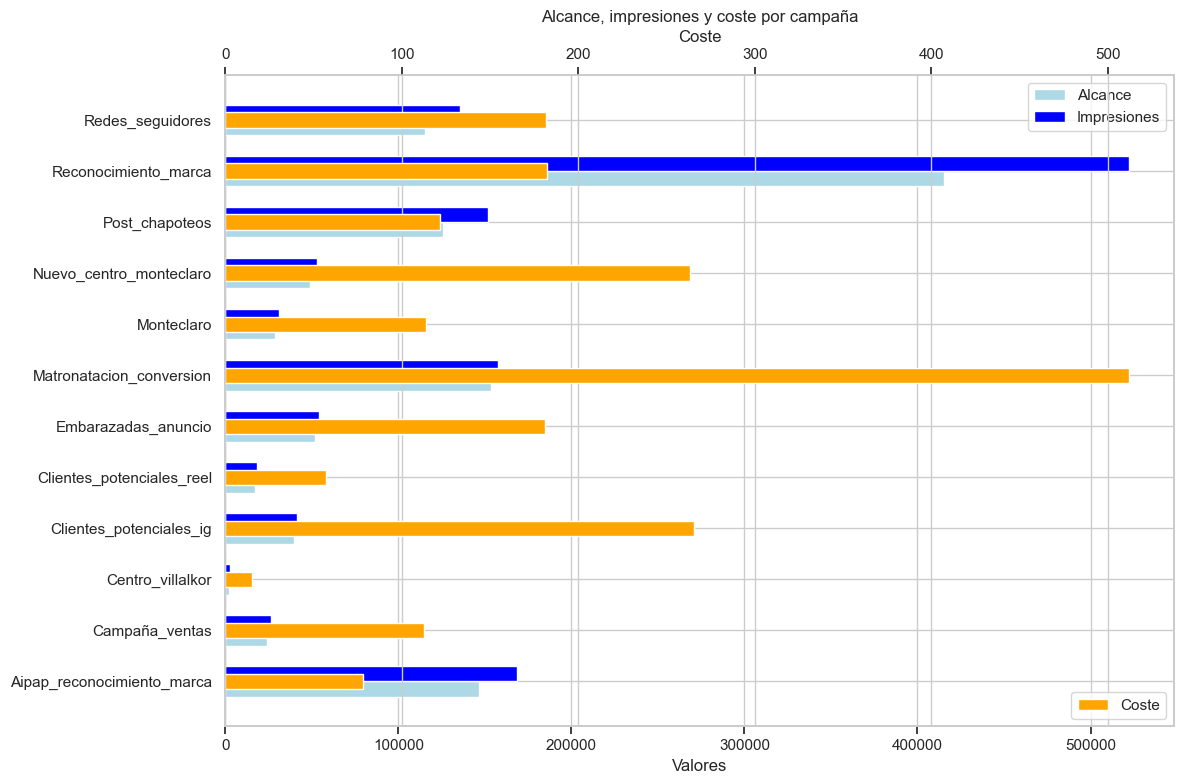

In [ ]:
# Group the data by 'Campaña' and sum the 'Alcance', 'Impresiones', and 'Coste'
campaign_grouped_data = raw_data.groupby('Campaña')[['Alcance', 'Impresiones', 'Coste']].sum().reset_index()

# Set the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(campaign_grouped_data))
r2 = [x + bar_width for x in r1]

# Create the horizontal bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Alcance and Impresiones
ax1.barh(r1, campaign_grouped_data['Alcance'], color='lightblue', height=bar_width, label='Alcance')
ax1.barh(r2, campaign_grouped_data['Impresiones'], color='blue', height=bar_width, label='Impresiones')

# Add labels and title
ax1.set_xlabel('Valores')
ax1.set_title('Alcance, impresiones y coste por campaña')
ax1.set_yticks([r + bar_width / 2 for r in range(len(campaign_grouped_data))])
ax1.set_yticklabels(campaign_grouped_data['Campaña'])

# Create a secondary axis for Coste
ax2 = ax1.twiny()
ax2.barh(r1 + bar_width / 2, campaign_grouped_data['Coste'], color='orange', height=bar_width, label='Coste')
ax2.set_xlabel('Coste')

# Add a legend
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Alcance, impresiones y el coste de las campañas:

1. **Reconocimiento de marca**:
   - La campaña "Reconocimiento_marca" tiene el mayor número de impresiones y un alcance significativo, pero también implica un coste elevado. Esto sugiere una inversión fuerte en visibilidad.

2. **Coste elevado**:
   - "Matronatacion_conversion" destaca por su alto coste, aunque sus impresiones y alcance no son proporcionalmente altos. Esto podría indicar ineficiencia en la inversión.

3. **Eficiencia**:
   - "Redes_seguidores" y "Clientes_potenciales_ig" muestran un buen equilibrio entre coste, alcance e impresiones, sugiriendo una gestión eficiente de recursos.

4. **Oportunidades de mejora**:
   - Campañas como "Nuevo_centro_monteclaro" y "Embarazadas_anuncio" tienen un coste considerable con un alcance e impresiones moderados, lo que indica potencial para optimizar la estrategia.

En resumen, mientras algunas campañas logran un buen equilibrio entre coste y resultados, otras podrían beneficiarse de ajustes para mejorar su eficiencia y efectividad.

##### 2.2 AWARENESS SET DE ANUNCIOS: ALCANCE E IMPRESIONES

In [ ]:
print(ad_set_awareness_aggregates)

                 Set anuncios   Coste  Alcance  Impresiones
0            Aipap_conversion  181.39    51772        54334
1  Aipap_reconocimiento_marca   78.15   146802       168842
2             Chapoteos_4_oct  121.67   125613       151662
3        Clientes_potenciales  714.90   136855       146057
4  Matro_intereses_conversion  511.97   153523       157714
5    Natacion_bebes_chapoteos  181.53   115672       135684
6        Reconocimiento_marca  182.10   415241       522125
7                      Ventas  112.37    24271        26280


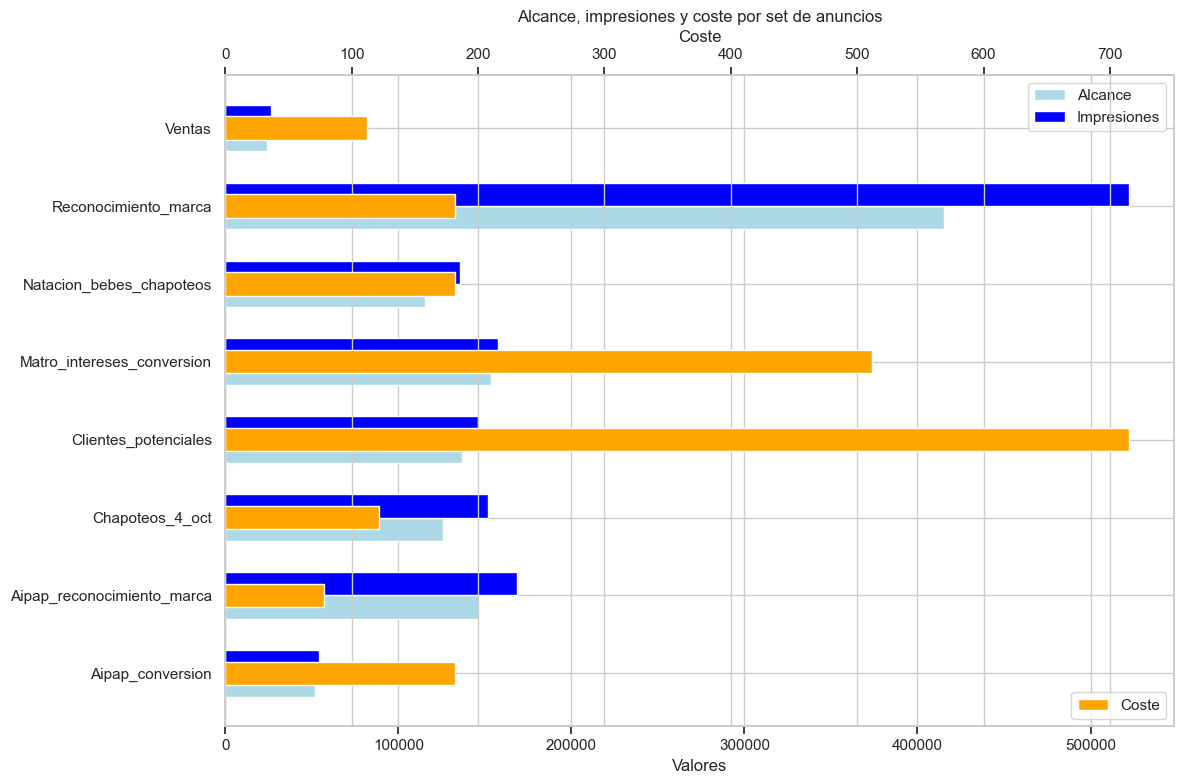

In [ ]:
# Group the data by 'Ad set' and sum the 'Alcance', 'Impresiones', and 'Coste'
ad_set_grouped_data = raw_data.groupby('Set anuncios')[['Alcance', 'Impresiones', 'Coste']].sum().reset_index()

# Set the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(ad_set_grouped_data))
r2 = [x + bar_width for x in r1]

# Create the horizontal bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Alcance and Impresiones
ax1.barh(r1, ad_set_grouped_data['Alcance'], color='lightblue', height=bar_width, label='Alcance')
ax1.barh(r2, ad_set_grouped_data['Impresiones'], color='blue', height=bar_width, label='Impresiones')

# Add labels and title
ax1.set_xlabel('Valores')
ax1.set_title('Alcance, impresiones y coste por set de anuncios')
ax1.set_yticks([r + bar_width / 2 for r in range(len(ad_set_grouped_data))])
ax1.set_yticklabels(ad_set_grouped_data['Set anuncios'])

# Create a secondary axis for Coste
ax2 = ax1.twiny()
ax2.barh(r1 + bar_width / 2, ad_set_grouped_data['Coste'], color='orange', height=bar_width, label='Coste')
ax2.set_xlabel('Coste')

# Add a legend
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Alcance, las impresiones y el coste por set de anuncios:

1. **Reconocimiento de marca**:
   - El set de anuncios "Reconocimiento_marca" tiene el mayor número de impresiones y un alcance significativo, con un coste considerable. Esto indica una fuerte inversión en visibilidad.

2. **Coste elevado**:
   - "Clientes_potenciales" presenta un alto coste, aunque sus impresiones y alcance no son proporcionalmente altos, sugiriendo ineficiencia en la inversión.

3. **Eficiencia**:
   - "Natacion_bebes_chapoteos" y "Aipap_reconocimiento_marca" muestran un buen equilibrio entre coste, alcance e impresiones, indicando una gestión eficiente de recursos.

4. **Oportunidades de mejora**:
   - "Matro_intereses_conversion" tiene un coste elevado con un alcance e impresiones moderados, lo que indica potencial para optimizar la estrategia.

**Conclusiones**:
- Es crucial revisar las campañas con altos costes y bajos resultados para mejorar la eficiencia.
- Las campañas con buen equilibrio deben ser analizadas para replicar su éxito en otras áreas.
- Se recomienda ajustar las estrategias de las campañas menos eficientes para maximizar el retorno de la inversión.

##### 2.3 AWARENESS ANUNCIOS: ALCANCE E IMPRESIONES

In [ ]:
print(ad_awareness_aggregates)

                       Anuncio   Coste  Alcance  Impresiones
0             Chapoteos_29_nov   92.28    95359       115673
1         Clientes_potenciales  184.76    39545        42131
2              Copia_chapoteos   29.39    30254        35989
3   Copia_clientes_potenciales  196.16    29633        30589
4        Copia_imagen_julio_24  181.39    51772        54334
5     Natacion_bebes_chapoteos  181.53   115672       135684
6             Nuevo_monteclaro  263.03    48743        53088
7         Reconocimiento_marca  182.10   415241       522125
8   Reconocimiento_marca_aipap   78.15   146802       168842
9    Reel_clientes_potenciales   57.13    17233        18042
10                      Ventas  112.37    24271        26280
11                 Video_matro  511.97   153523       157714
12             Video_villalkor   13.82     1701         2207


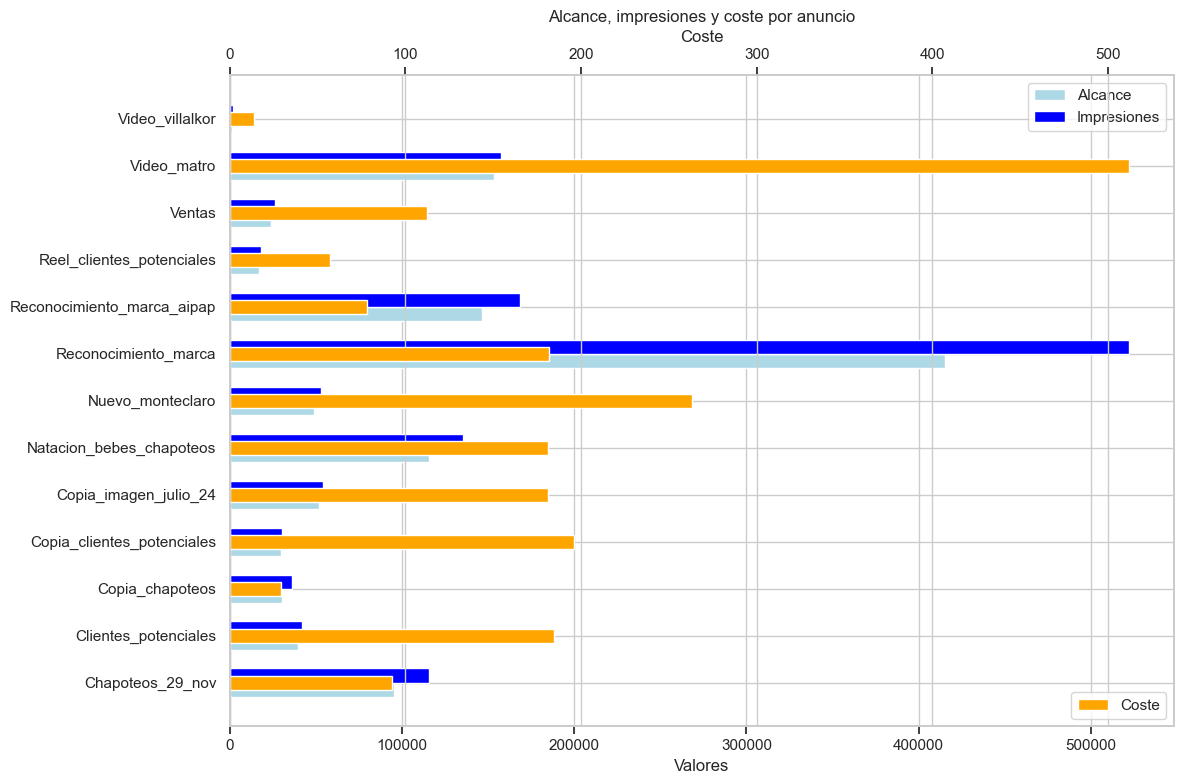

In [ ]:
# Group the data by 'Ad' and sum the 'Alcance', 'Impresiones', and 'Coste'
ad_grouped_data = raw_data.groupby('Anuncio')[['Alcance', 'Impresiones', 'Coste']].sum().reset_index()

# Set the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(ad_grouped_data))
r2 = [x + bar_width for x in r1]

# Create the horizontal bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Alcance and Impresiones
ax1.barh(r1, ad_grouped_data['Alcance'], color='lightblue', height=bar_width, label='Alcance')
ax1.barh(r2, ad_grouped_data['Impresiones'], color='blue', height=bar_width, label='Impresiones')

# Add labels and title
ax1.set_xlabel('Valores')
ax1.set_title('Alcance, impresiones y coste por anuncio')
ax1.set_yticks([r + bar_width / 2 for r in range(len(ad_grouped_data))])
ax1.set_yticklabels(ad_grouped_data['Anuncio'])

# Create a secondary axis for Coste
ax2 = ax1.twiny()
ax2.barh(r1 + bar_width / 2, ad_grouped_data['Coste'], color='orange', height=bar_width, label='Coste')
ax2.set_xlabel('Coste')

# Add a legend
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Alcance, las impresiones y el coste por anuncio:

1. **Reconocimiento de marca**:
   - "Reconocimiento_marca" tiene el mayor número de impresiones y un alcance significativo, con un coste elevado, indicando una fuerte inversión en visibilidad.

2. **Coste elevado**:
   - "Video_matro" presenta un alto coste, aunque sus impresiones y alcance no son proporcionalmente altos, sugiriendo ineficiencia en la inversión.

3. **Eficiencia**:
   - "Natacion_bebes_chapoteos" y "Reel_clientes_potenciales" muestran un buen equilibrio entre coste, alcance e impresiones, indicando una gestión eficiente de recursos.

4. **Oportunidades de mejora**:
   - "Nuevo_monteclaro" tiene un coste considerable con un alcance e impresiones moderados, lo que indica potencial para optimizar la estrategia.

**Conclusiones**:
- Es crucial revisar los anuncios con altos costes y bajos resultados para mejorar la eficiencia.
- Los anuncios con buen equilibrio deben ser analizados para replicar su éxito en otras áreas.
- Se recomienda ajustar las estrategias de los anuncios menos eficientes para maximizar el retorno de la inversión.

##### 2.4 AWARENESS PLATAFORMAS: ALCANCE E IMPRESIONES

In [ ]:
print(platform_awareness_aggregates)

         Plataforma    Coste  Alcance  Impresiones
0  audience_network     6.15    12231        33006
1          facebook   714.40   825247       983041
2         instagram  1363.52   332210       346584
3         messenger     0.01       61           67


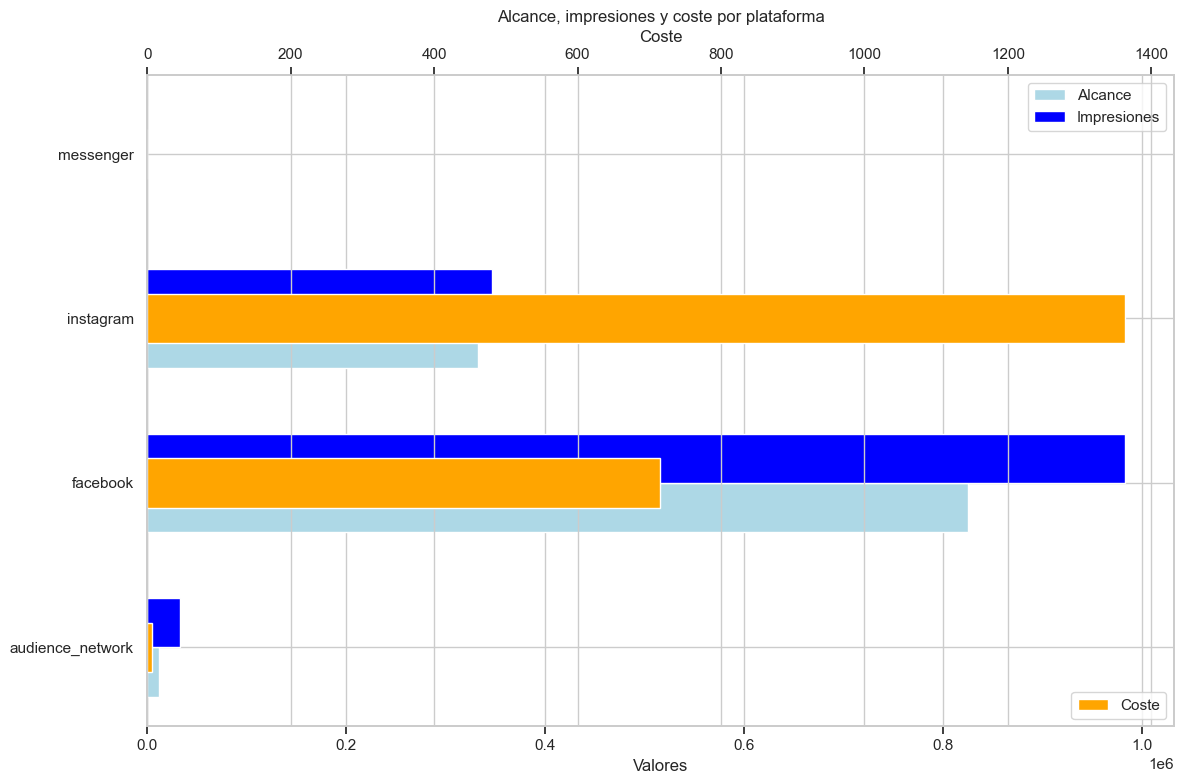

In [ ]:
# Group the data by 'Platoform' and sum the 'Alcance', 'Impresiones', and 'Coste'
platform_grouped_data = raw_data.groupby('Plataforma')[['Alcance', 'Impresiones', 'Coste']].sum().reset_index()

# Set the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(platform_grouped_data))
r2 = [x + bar_width for x in r1]

# Create the horizontal bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Alcance and Impresiones
ax1.barh(r1, platform_grouped_data['Alcance'], color='lightblue', height=bar_width, label='Alcance')
ax1.barh(r2, platform_grouped_data['Impresiones'], color='blue', height=bar_width, label='Impresiones')

# Add labels and title
ax1.set_xlabel('Valores')
ax1.set_title('Alcance, impresiones y coste por plataforma')
ax1.set_yticks([r + bar_width / 2 for r in range(len(platform_grouped_data))])
ax1.set_yticklabels(platform_grouped_data['Plataforma'])

# Create a secondary axis for Coste
ax2 = ax1.twiny()
ax2.barh(r1 + bar_width / 2, platform_grouped_data['Coste'], color='orange', height=bar_width, label='Coste')
ax2.set_xlabel('Coste')

# Add a legend
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Alcance, las impresiones y el coste por plataforma:

1. **Instagram**:
   - Tiene el mayor coste, con un alcance e impresiones significativos. Esto indica una fuerte inversión en visibilidad, crucial para el reconocimiento de marca.

2. **Facebook**:
   - Presenta un buen equilibrio entre coste, alcance e impresiones, sugiriendo una gestión eficiente para aumentar el awareness.

3. **Messenger y Audience Network**:
   - Tienen un coste y alcance mucho menores. Esto podría indicar un uso limitado para el awareness o una estrategia más focalizada.

4. **Oportunidades de mejora**:
   - Considerar si el alto coste en Instagram está generando el retorno deseado en términos de awareness, y explorar si Facebook puede ofrecer un mejor equilibrio.

**Conclusiones**:
- Aunque este gráfico se centra en el awareness, es importante considerar otras métricas para evaluar la eficiencia total de la plataforma.
- Instagram y Facebook son las plataformas más efectivas para el awareness, pero se debe evaluar el retorno de la inversión.
- Se recomienda ajustar las estrategias en Messenger y Audience Network si se desea aumentar su participación en el awareness.

***

##### 3. ENGAGEMENT

##### * Vistas: número de veces que los anuncios se reprodujeron o mostraron
##### * Clics (todos): número de clics, toques o desplazamientos en tus anuncios
##### * Engagement en página: número de acciones realizadas en tu página de Facebook, perfil de Instagram o en cualquie contenido, atribuído a tus anuncios
##### * Visitas a perfil IG: número de veces que se visitó tu perfil de Instagram, atribuído a tu anuncio

In [ ]:
# Aggregate metrics for each Campaign
campaign_engagement_aggregates = raw_data.groupby('Campaña').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum',
    'Coste': 'sum'
}).reset_index()

# Aggregate metrics for each Ad set
ad_set_engagement_aggregates = raw_data.groupby('Set anuncios').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum',
    'Coste': 'sum'
}).reset_index()

# Aggregate metrics for each Ad
ad_engagement_aggregates = raw_data.groupby('Anuncio').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum',
    'Coste': 'sum'
}).reset_index()

# Aggregate metrics for each Platform
platform_engagement_aggregates = raw_data.groupby('Plataforma').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum',
    'Coste': 'sum'
}).reset_index()

##### 3.1 ENGAGEMENT CAMPAÑAS: VISTAS, CLICS, ENGAGEMENT PÁGINA, VISITAS PERFIL IG

In [ ]:
print(campaign_engagement_aggregates)

                       Campaña  Vistas  Clics (todos)  Engagement en página  \
0   Aipap_reconocimiento_marca  162919            350                 12783   
1               Campaña_ventas   31845           1163                  6599   
2             Centro_villalkor    2508             55                   628   
3      Clientes_potenciales_ig   43778           1194                  8062   
4    Clientes_potenciales_reel   18838            327                  3237   
5          Embarazadas_anuncio   59043           1053                 13340   
6     Matronatacion_conversion  173765           3901                 39460   
7                   Monteclaro   32632            476                  5214   
8      Nuevo_centro_monteclaro   53772           1064                 12667   
9               Post_chapoteos  118908           2389                  1419   
10        Reconocimiento_marca  522326           1406                  1201   
11            Redes_seguidores  135881           131

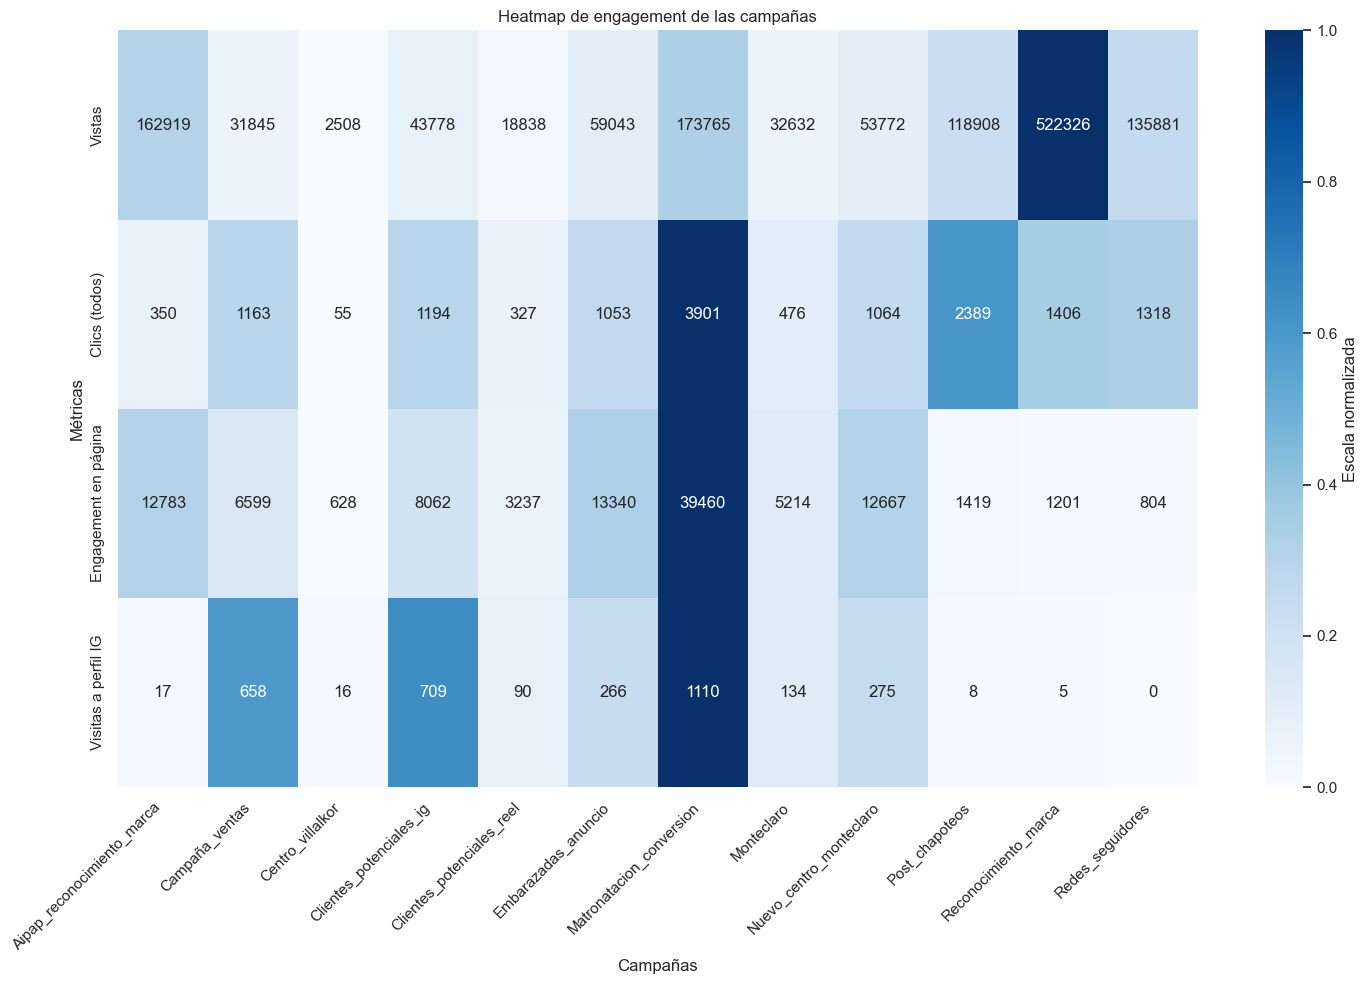

In [ ]:
# Aggregate metrics for each Campaign
campaign_engagement_aggregates = raw_data.groupby('Campaña').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum'
}).reset_index()

# Ensure only numeric data is used
campaign_data = campaign_engagement_aggregates.set_index('Campaña').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
campaign_data_normalized = campaign_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_data = campaign_data_normalized.T.values.astype(float)

# Prepare annotations
annotations = campaign_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(heatmap_data, 
                 annot=annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=campaign_data_normalized.index,
                 yticklabels=campaign_data_normalized.columns)

plt.title('Heatmap de engagement de las campañas')
plt.xlabel('Campañas')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El heatmap muestra el engagement de diferentes campañas a través de varias métricas: visitas, clics, engagement en página y visitas a perfil de IG:

1. **Visitas**:
   - La campaña "Redes_seguidores" tiene el mayor número de visitas, lo que indica un alto interés inicial.
   - "Matronatacion_conversion" también destaca en visitas, sugiriendo una campaña efectiva en atraer tráfico.

2. **Clics**:
   - "Matronatacion_conversion" tiene el mayor número de clics, lo que sugiere un buen rendimiento en términos de interacción directa.
   - "Reconocimiento_marca" y "Clientes_potenciales_reel" también muestran un buen número de clics, indicando efectividad en captar la atención.

3. **Engagement en página**:
   - "Matronatacion_conversion" lidera en engagement en página, lo que indica que los usuarios están interactuando más allá del clic inicial.
   - "Aipap_reconocimiento_marca" y "Clientes_potenciales_ig" también muestran un buen engagement, sugiriendo contenido relevante.

4. **Visitas a perfil IG**:
   - "Matronatacion_conversion" nuevamente destaca, sugiriendo que la campaña está bien integrada con redes sociales.
   - "Clientes_potenciales_ig" también tiene un buen rendimiento en esta métrica.

**Conclusiones**:
- "Matronatacion_conversion" es la campaña más efectiva en términos de engagement general, destacando en todas las métricas.
- Las campañas con alto número de visitas pero bajo engagement podrían beneficiarse de mejoras en el contenido para retener a los usuarios.
- Es importante considerar estas métricas en conjunto con otras para evaluar la eficiencia total de las campañas.

##### 3.2 ENGAGEMENT SET DE ANUNCIOS: VISTAS, CLICS, ENGAGEMENT PÁGINA, VISITAS PERFIL IG

In [ ]:
print(ad_set_engagement_aggregates)

                 Set anuncios  Vistas  Clics (todos)  Engagement en página  \
0            Aipap_conversion   59043           1053                 13340   
1  Aipap_reconocimiento_marca  162919            350                 12783   
2             Chapoteos_4_oct  118908           2389                  1419   
3        Clientes_potenciales  151528           3116                 29808   
4  Matro_intereses_conversion  173765           3901                 39460   
5    Natacion_bebes_chapoteos  135881           1318                   804   
6        Reconocimiento_marca  522326           1406                  1201   
7                      Ventas   31845           1163                  6599   

   Visitas a perfil IG   Coste  
0                  266  181.39  
1                   17   78.15  
2                    8  121.67  
3                 1224  714.90  
4                 1110  511.97  
5                    0  181.53  
6                    5  182.10  
7                  658  112.37  


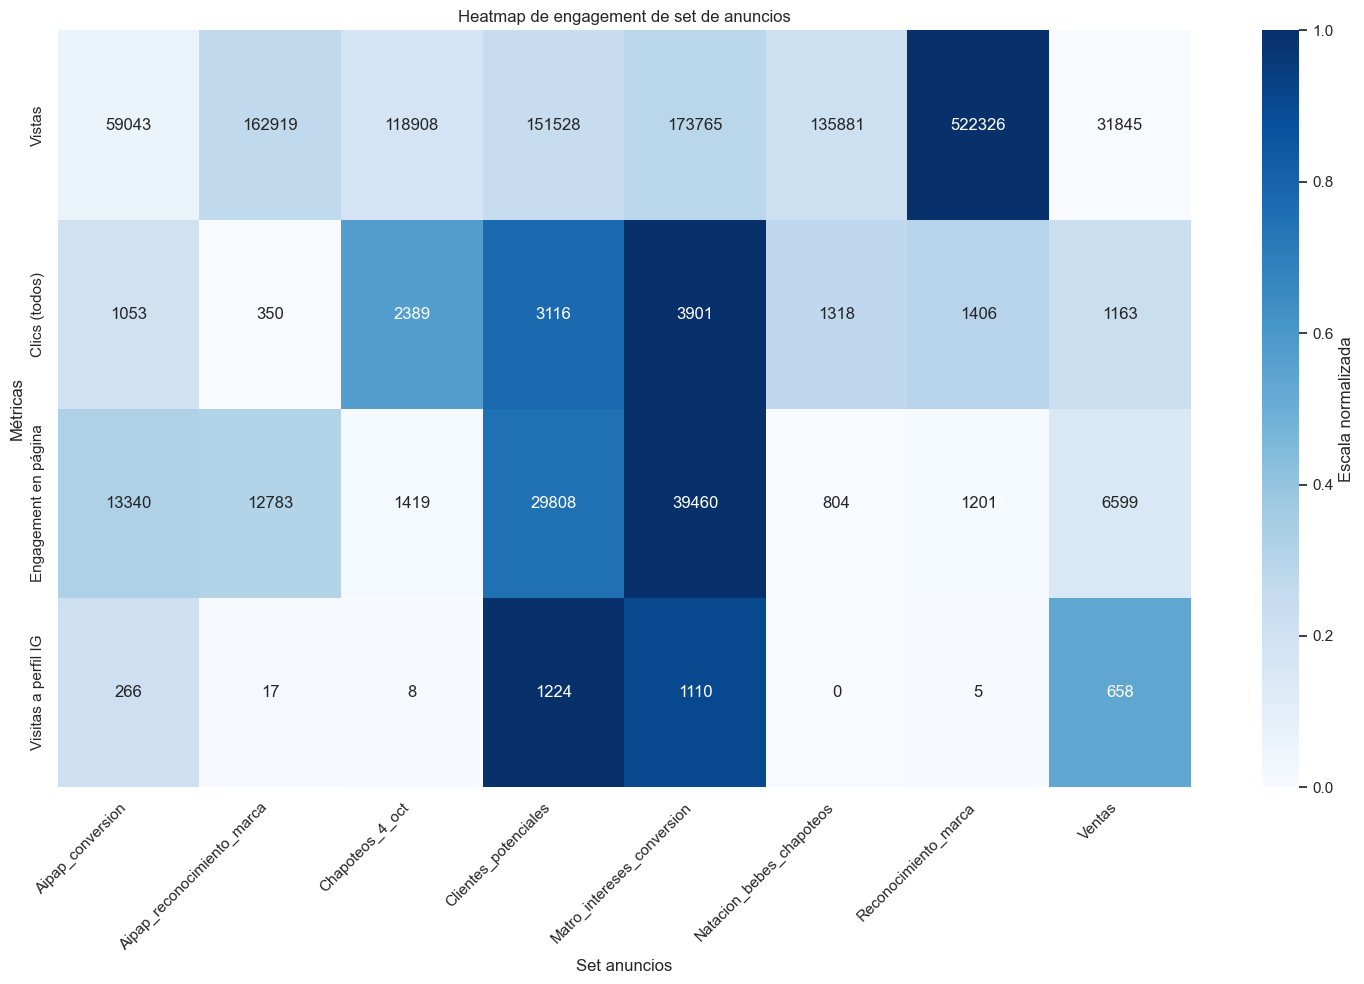

In [ ]:
# Aggregate metrics for each ad_set
ad_set_engagement_aggregates = raw_data.groupby('Set anuncios').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum'
}).reset_index()

# Ensure only numeric data is used
ad_set_data = ad_set_engagement_aggregates.set_index('Set anuncios').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
ad_set_data_normalized = ad_set_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_ad_set_data = ad_set_data_normalized.T.values.astype(float)

# Prepare annotations
ad_set_annotations = ad_set_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(heatmap_ad_set_data, 
                 annot=ad_set_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=ad_set_data_normalized.index,
                 yticklabels=ad_set_data_normalized.columns)

plt.title('Heatmap de engagement de set de anuncios')
plt.xlabel('Set anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El heatmap muestra el engagement de diferentes sets de anuncios a través de varias métricas: visitas, clics, engagement en página y visitas a perfil de IG:

1. **Visitas**:
   - "Reconocimiento_marca" tiene el mayor número de visitas, indicando un alto interés inicial.
   - "Matro_intereses_conversion" también destaca en visitas, sugiriendo un set de anuncios efectivo en atraer tráfico.

2. **Clics**:
   - "Matro_intereses_conversion" tiene el mayor número de clics, lo que sugiere un buen rendimiento en términos de interacción directa.
   - "Clientes_potenciales" también muestra un buen número de clics, indicando efectividad en captar la atención.

3. **Engagement en página**:
   - "Matro_intereses_conversion" lidera en engagement en página, lo que indica que los usuarios están interactuando más allá del clic inicial.
   - "Clientes_potenciales" también muestra un buen engagement, sugiriendo contenido relevante.

4. **Visitas a perfil IG**:
   - "Matro_intereses_conversion" destaca, sugiriendo que el set de anuncions está bien integrado con redes sociales.
   - "Clientes_potenciales" también tiene un buen rendimiento en esta métrica.

**Conclusiones**:
- "Matro_intereses_conversion" es el set de anuncios más efectivo en términos de engagement general, destacando en todas las métricas.
- Los set de anuncios con alto número de visitas pero bajo engagement podrían beneficiarse de mejoras en el contenido para retener a los usuarios.
- Es importante considerar estas métricas en conjunto con otras para evaluar la eficiencia total de los set de anuncios.

##### 3.3 ENGAGEMENT ANUNCIOS: VISTAS, CLICS, ENGAGEMENT PÁGINA, VISITAS PERFIL IG

In [ ]:
print(ad_engagement_aggregates)

                       Anuncio  Vistas  Clics (todos)  Engagement en página  \
0             Chapoteos_29_nov   90757           1801                  1067   
1         Clientes_potenciales   43634            722                  5356   
2              Copia_chapoteos   28151            588                   352   
3   Copia_clientes_potenciales   33071            952                  7923   
4        Copia_imagen_julio_24   59043           1053                 13340   
5     Natacion_bebes_chapoteos  135881           1318                   804   
6             Nuevo_monteclaro   53772           1064                 12667   
7         Reconocimiento_marca  522326           1406                  1201   
8   Reconocimiento_marca_aipap  162919            350                 12783   
9    Reel_clientes_potenciales   18838            327                  3237   
10                      Ventas   31845           1163                  6599   
11                 Video_matro  173765           390

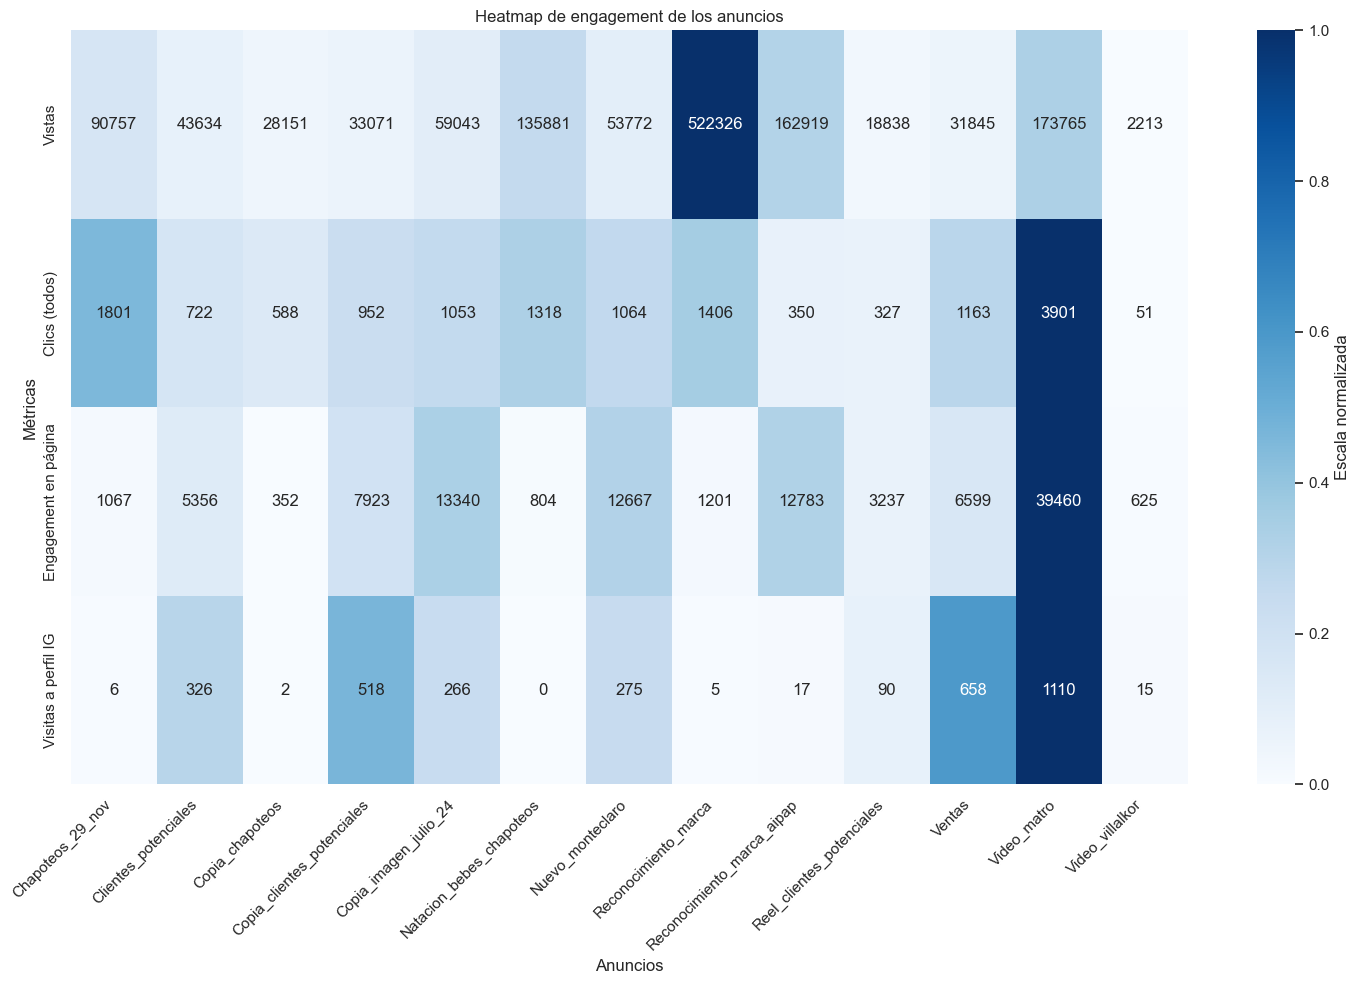

In [ ]:
# Aggregate metrics for each ad
ad_engagement_aggregates = raw_data.groupby('Anuncio').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum'
}).reset_index()

# Ensure only numeric data is used
ad_data = ad_engagement_aggregates.set_index('Anuncio').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
ad_data_normalized = ad_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_ad_data = ad_data_normalized.T.values.astype(float)

# Prepare annotations
ad_annotations = ad_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(heatmap_ad_data, 
                 annot=ad_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=ad_data_normalized.index,
                 yticklabels=ad_data_normalized.columns)

plt.title('Heatmap de engagement de los anuncios')
plt.xlabel('Anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El heatmap muestra el engagement de los anuncios a través de varias métricas: visitas, clics, engagement en página y visitas a perfil de IG:

1. **Visitas**:
   - "Reconocimiento_marca" tiene el mayor número de visitas, indicando un alto interés inicial.
   - "Video_matro" también destaca en visitas, sugiriendo una campaña efectiva en atraer tráfico.

2. **Clics**:
   - "Video_matro" tiene el mayor número de clics, lo que sugiere un buen rendimiento en términos de interacción directa.
   - "Matro_intereses_conversion" también muestra un buen número de clics, indicando efectividad en captar la atención.

3. **Engagement en página**:
   - "Video_matro" lidera en engagement en página, lo que indica que los usuarios están interactuando más allá del clic inicial.
   - "Clientes_potenciales" también muestra un buen engagement, sugiriendo contenido relevante.

4. **Visitas a perfil IG**:
   - "Video_matro" destaca, sugiriendo que la campaña está bien integrada con redes sociales.
   - "Ventas" también tiene un buen rendimiento en esta métrica.

**Conclusiones**:
- "Video_matro" es el anuncio más efectivo en términos de engagement general, destacando en todas las métricas.
- Los anuncios con alto número de visitas pero bajo engagement podrían beneficiarse de mejoras en el contenido para retener a los usuarios.
- Es importante considerar estas métricas en conjunto con otras para evaluar la eficiencia total de los anuncios.

##### 3.4 ENGAGEMENT PLATAFORMAS: VISTAS, CLICS, ENGAGEMENT PÁGINA, VISITAS PERFIL IG

In [ ]:
print(platform_engagement_aggregates)

         Plataforma  Vistas  Clics (todos)  Engagement en página  \
0  audience_network      99            102                   190   
1          facebook  981505           6845                 27943   
2         instagram  374553           7749                 77281   
3         messenger      58              0                     0   

   Visitas a perfil IG        Coste  
0                    0     6.146579  
1                    0   714.402331  
2                 3288  1363.521144  
3                    0     0.009945  


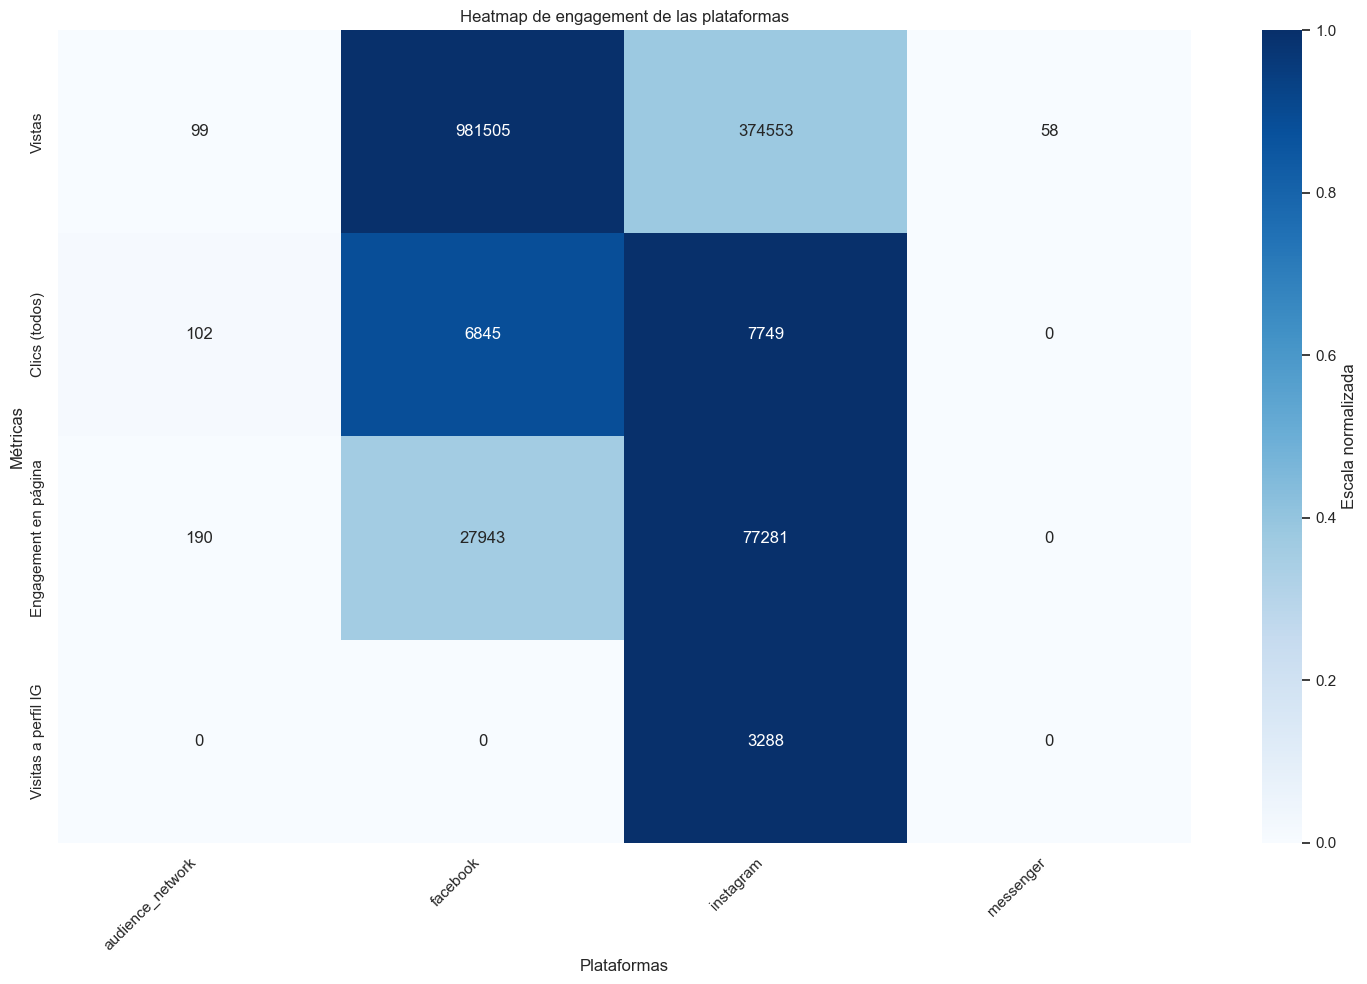

In [ ]:
# Aggregate metrics for each Platform
platform_engagement_aggregates = raw_data.groupby('Plataforma').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum'
}).reset_index()

# Ensure only numeric data is used
platform_data = platform_engagement_aggregates.set_index('Plataforma').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
platform_data_normalized = platform_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_platform_data = platform_data_normalized.T.values.astype(float)

# Prepare annotations
platform_annotations = platform_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(heatmap_platform_data, 
                 annot=platform_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=platform_data_normalized.index,
                 yticklabels=platform_data_normalized.columns)

plt.title('Heatmap de engagement de las plataformas')
plt.xlabel('Plataformas')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El heatmap muestra el engagement en diferentes plataformas a través de varias métricas: visitas, clics, engagement en página y visitas a perfil de IG:

1. **Visitas**:
   - **Facebook** tiene el mayor número de visitas, indicando un alto interés inicial.
   - **Instagram** también muestra un número significativo de visitas, sugiriendo efectividad en atraer tráfico.

2. **Clics**:
   - **Instagram** lidera en clics, lo que sugiere un buen rendimiento en términos de interacción directa.
   - **Facebook** también tiene un número considerable de clics, indicando efectividad en captar la atención.

3. **Engagement en página**:
   - **Instagram** destaca en engagement en página, lo que indica que los usuarios están interactuando más allá del clic inicial.
   - **Facebook** también muestra un buen nivel de engagement, sugiriendo contenido relevante.

4. **Visitas a perfil IG**:
   - **Instagram** es la única plataforma con visitas a perfil de IG, lo que es esperado y muestra integración efectiva con redes sociales.

**Conclusiones**:
- **Instagram** es la plataforma más efectiva en términos de engagement general, destacando en todas las métricas.
- **Facebook** también muestra un buen rendimiento, pero podría beneficiarse de estrategias para aumentar el engagement en página.
- **Audience Network** y **Messenger** tienen un impacto limitado en estas métricas y podrían requerir ajustes estratégicos para mejorar su efectividad.

***

##### 4. CONVERSIÓN

##### * Clics en link: número de clics en links en el anuncio que llevan a un destino concreto, dentro o fuera de Meta
##### * Follows o likes: número de follows o likes que recibes en tu perfil de Facebook o página, atribuídos a tus anuncios
##### * Recuerdo anuncio estimado: número estimado de personas que recuerdan haber visto tu anuncio, si se les pregunta, en un plazo de dos días
##### * Leads: número de leads atribuídos a tus anuncios, según la información recibida de una o más herramientas conectadas de Meta Business, o bien que suceden directamente en Meta
##### * Leads de sitio web: número de eventos de lead rastreados por el pixel, o conversiones API en tu sitio web y atribuídos a tus anuncios
##### * Meta leads: número de leads enviados en Meta (incluye formulario, chats de Messenger e Instagram) que se atribuyen a tu anuncios
##### * Ventas: el valor total de las ventas por el sitio web

In [ ]:
# Aggregate metrics for each Campaign
campaign_conversion_aggregates = raw_data.groupby('Campaña').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Aggregate metrics for each Ad set
ad_set_conversion_aggregates = raw_data.groupby('Set anuncios').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Aggregate metrics for each Ad
ad_conversion_aggregates = raw_data.groupby('Anuncio').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Aggregate metrics for each Platform
platform_conversion_aggregates = raw_data.groupby('Plataforma').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

##### 4.1 CONVERSIÓN CAMPAÑAS: LEADS, LEADS EN SITIO WEB, META LEADS, VENTAS, CLICS EN LINK, FOLLOWS O LIKES, RECUERDO ANUNCIO ESTIMADO

In [ ]:
print(campaign_conversion_aggregates)

                       Campaña  Leads  Leads de sitio web  Meta leads  Ventas  \
0   Aipap_reconocimiento_marca      1                   1           0     0.0   
1               Campaña_ventas     28                  28           0   158.0   
2             Centro_villalkor      0                   0           0     0.0   
3      Clientes_potenciales_ig     22                  22           0     0.0   
4    Clientes_potenciales_reel     24                  11          13     0.0   
5          Embarazadas_anuncio     21                  21           0    79.0   
6     Matronatacion_conversion    122                 122           0     0.0   
7                   Monteclaro      5                   5           0     0.0   
8      Nuevo_centro_monteclaro     19                  19           0    79.0   
9               Post_chapoteos      0                   0           0     0.0   
10        Reconocimiento_marca      0                   0           0     0.0   
11            Redes_seguidor

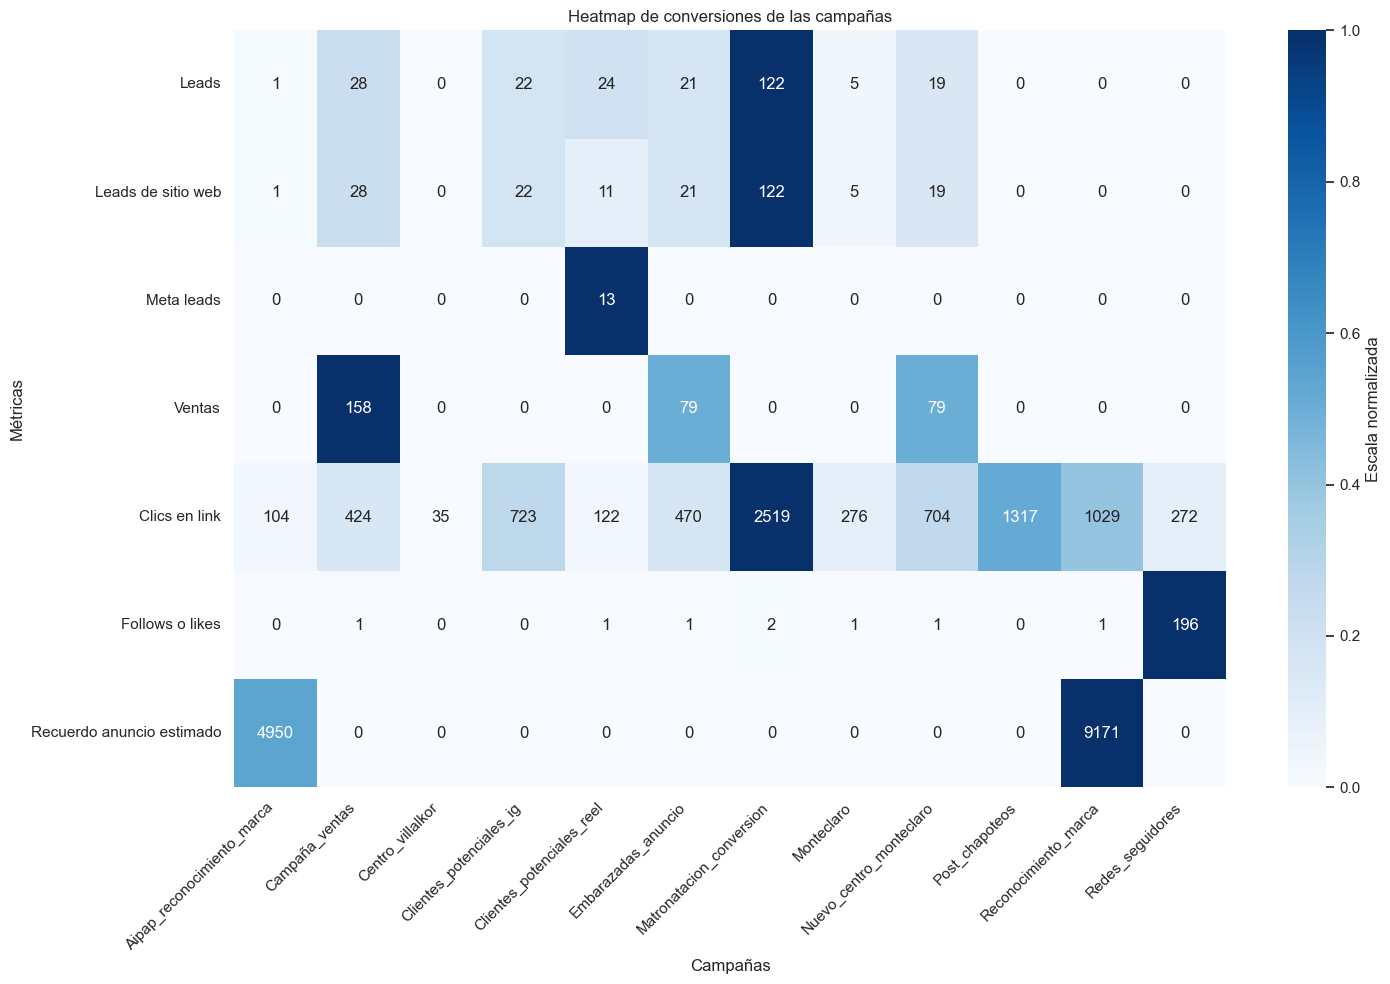

In [ ]:
# Aggregate metrics for each Campaign
campaign_conversion_aggregates = raw_data.groupby('Campaña').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Ensure only numeric data is used
campaign_data = campaign_conversion_aggregates.set_index('Campaña').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
campaign_data_normalized = campaign_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_campaign_data = campaign_data_normalized.T.values.astype(float)

# Prepare annotations
campaign_annotations = campaign_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(heatmap_campaign_data, 
                 annot=campaign_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=campaign_data_normalized.index,
                 yticklabels=campaign_data_normalized.columns)

plt.title('Heatmap de conversiones de las campañas')
plt.xlabel('Campañas')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El heatmap muestra las conversiones de diferentes campañas a través de varias métricas: leads, ventas, clics en link, follows o likes, y recuerdo de anuncio estimado:

1. **Leads**:
   - "Clientes_potenciales_ig" y "Matronatacion_conversion" destacan en generación de leads, indicando efectividad en captar interés.

2. **Leads de sitio web**:
   - Similar a los leads generales, "Clientes_potenciales_ig" y "Matronatacion_conversion" también lideran en esta métrica.

3. **Meta leads**:
   - "Embarazadas_anuncio" es la única campaña con meta leads significativos, sugiriendo un enfoque específico en esta conversión.

4. **Ventas**:
   - "Campaña_ventas" es la única campaña con un número significativo de ventas, cumpliendo su objetivo principal.

5. **Clics en link**:
   - "Matronatacion_conversion" tiene el mayor número de clics, lo que sugiere un alto nivel de interacción.
   - "Clientes_potenciales_reel" también muestra un buen rendimiento en esta métrica.

6. **Follows o likes**:
   - "Redes_seguidores" destaca en esta métrica, lo que es consistente con su objetivo de aumentar la presencia en redes sociales.

7. **Recuerdo de anuncio estimado**:
   - "Reconocimiento_marca" y "Aipap_reconocimiento_marca" tienen un alto recuerdo de anuncio, indicando éxito en aumentar la visibilidad de la marca.

**Conclusiones**:
- "Matronatacion_conversion" es altamente efectiva en varias métricas de conversión, especialmente en clics y leads.
- "Campaña_ventas" cumple su objetivo principal de generar ventas.
- Las campañas de reconocimiento de marca son efectivas en aumentar el recuerdo de anuncio.
- Es importante seguir optimizando las campañas para mejorar las métricas de conversión y maximizar el retorno de la inversión.

##### 4.2 CONVERSIÓN SET DE ANUNCIOS: LEADS, LEADS EN SITIO WEB, META LEADS, VENTAS, CLICS EN LINK, FOLLOWS O LIKES, RECUERDO ANUNCIO ESTIMADO

In [ ]:
print(ad_set_conversion_aggregates)

                 Set anuncios  Leads  Leads de sitio web  Meta leads  Ventas  \
0            Aipap_conversion     21                  21           0    79.0   
1  Aipap_reconocimiento_marca      1                   1           0     0.0   
2             Chapoteos_4_oct      0                   0           0     0.0   
3        Clientes_potenciales     70                  57          13    79.0   
4  Matro_intereses_conversion    122                 122           0     0.0   
5    Natacion_bebes_chapoteos      0                   0           0     0.0   
6        Reconocimiento_marca      0                   0           0     0.0   
7                      Ventas     28                  28           0   158.0   

   Clics en link  Follows o likes  Recuerdo anuncio estimado  
0            470                1                          0  
1            104                0                       4950  
2           1317                0                          0  
3           1860           

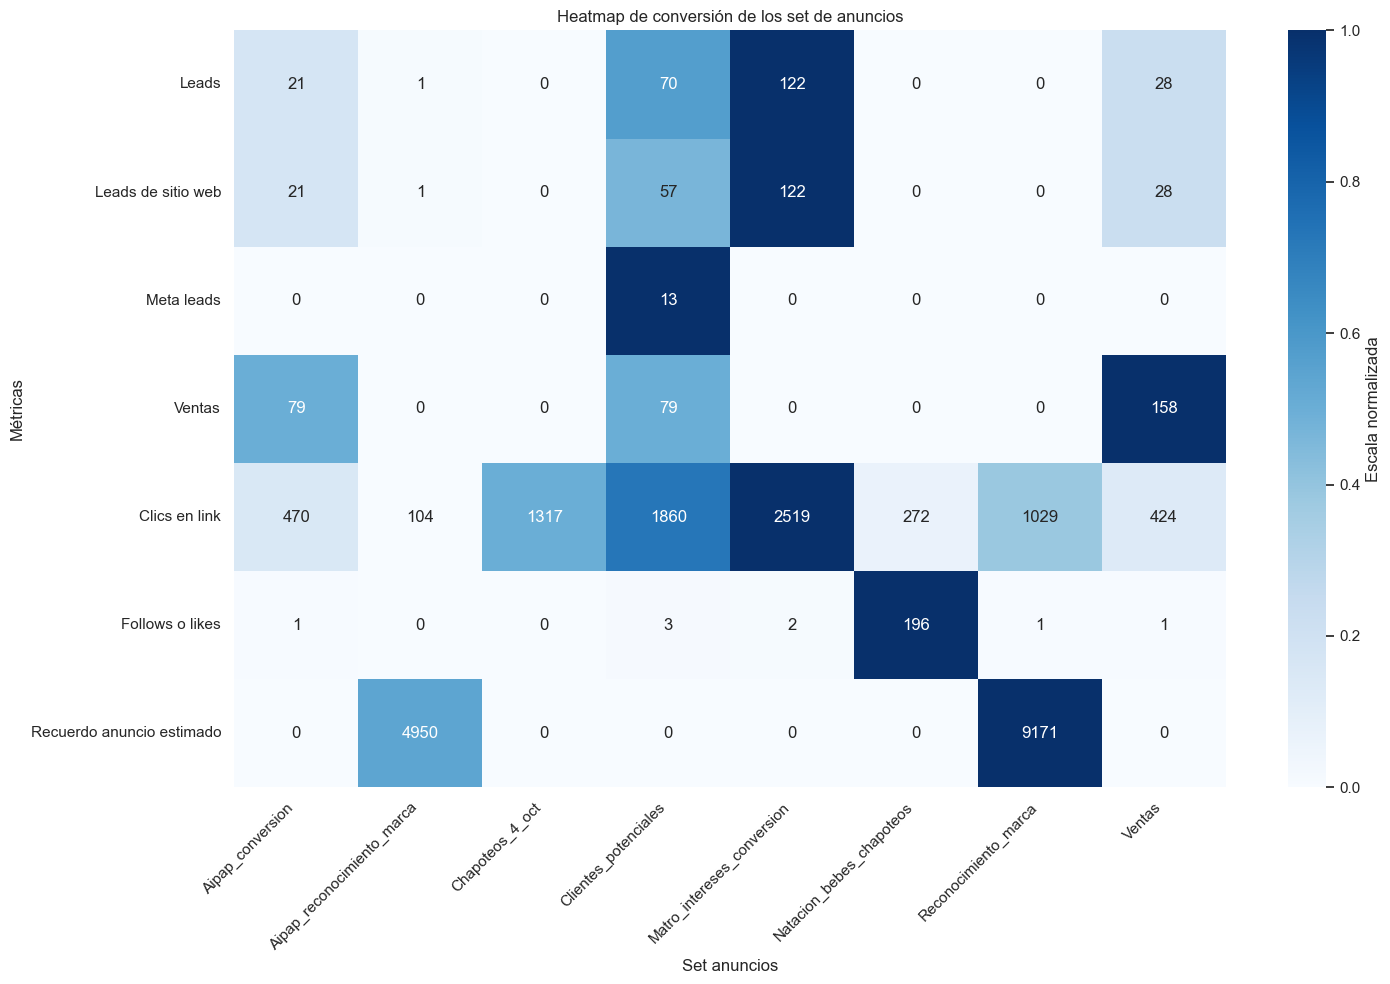

In [ ]:
# Aggregate metrics for each Ad set
ad_set_conversion_aggregates = raw_data.groupby('Set anuncios').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Ensure only numeric data is used
ad_set_data = ad_set_conversion_aggregates.set_index('Set anuncios').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
ad_set_data_normalized = ad_set_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_ad_set_data = ad_set_data_normalized.T.values.astype(float)

# Prepare annotations
ad_set_annotations = ad_set_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(heatmap_ad_set_data, 
                 annot=ad_set_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=ad_set_data_normalized.index,
                 yticklabels=ad_set_data_normalized.columns)

plt.title('Heatmap de conversión de los set de anuncios')
plt.xlabel('Set anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El heatmap muestra las conversiones de diferentes sets de anuncios a través de varias métricas: leads, ventas, clics en link, follows o likes, y recuerdo de anuncio estimado:

1. **Leads**:
   - "Clientes_potenciales" y "Matro_intereses_conversion" destacan en generación de leads, indicando efectividad en captar interés.

2. **Leads de sitio web**:
   - Similar a los leads generales, "Clientes_potenciales" y "Matro_intereses_conversion" también lideran en esta métrica.

3. **Meta leads**:
   - "Embarazadas_anuncio" es la única campaña con meta leads significativos, sugiriendo un enfoque específico en esta conversión.

4. **Ventas**:
   - "Ventas" es el único set de anuncios con un número significativo de ventas, cumpliendo su objetivo principal.

5. **Clics en link**:
   - "Matro_intereses_conversion" tiene el mayor número de clics, lo que sugiere un alto nivel de interacción.
   - "Clientes_potenciales" también muestra un buen rendimiento en esta métrica.

6. **Follows o likes**:
   - "Redes_seguidores" destaca en esta métrica, lo que es consistente con su objetivo de aumentar la presencia en redes sociales.

7. **Recuerdo de anuncio estimado**:
   - "Reconocimiento_marca" y "Aipap_reconocimiento_marca" tienen un alto recuerdo de anuncio, indicando éxito en aumentar la visibilidad de la marca.

**Conclusiones**:
- "Matro_intereses_conversion" es altamente efectivo en varias métricas de conversión, especialmente en clics y leads.
- "Ventas" cumple su objetivo principal de generar ventas.
- Las campañas de reconocimiento de marca son efectivas en aumentar el recuerdo de anuncio.
- Es importante seguir optimizando las campañas para mejorar las métricas de conversión y maximizar el retorno de la inversión.

##### 4.3 CONVERSIÓN ANUNCIOS: LEADS, LEADS EN SITIO WEB, META LEADS, VENTAS, CLICS EN LINK, FOLLOWS O LIKES, RECUERDO ANUNCIO ESTIMADO

In [ ]:
print(ad_conversion_aggregates)

                       Anuncio  Leads  Leads de sitio web  Meta leads  Ventas  \
0             Chapoteos_29_nov      0                   0           0     0.0   
1         Clientes_potenciales     13                  13           0     0.0   
2              Copia_chapoteos      0                   0           0     0.0   
3   Copia_clientes_potenciales     14                  14           0     0.0   
4        Copia_imagen_julio_24     21                  21           0    79.0   
5     Natacion_bebes_chapoteos      0                   0           0     0.0   
6             Nuevo_monteclaro     19                  19           0    79.0   
7         Reconocimiento_marca      0                   0           0     0.0   
8   Reconocimiento_marca_aipap      1                   1           0     0.0   
9    Reel_clientes_potenciales     24                  11          13     0.0   
10                      Ventas     28                  28           0   158.0   
11                 Video_mat

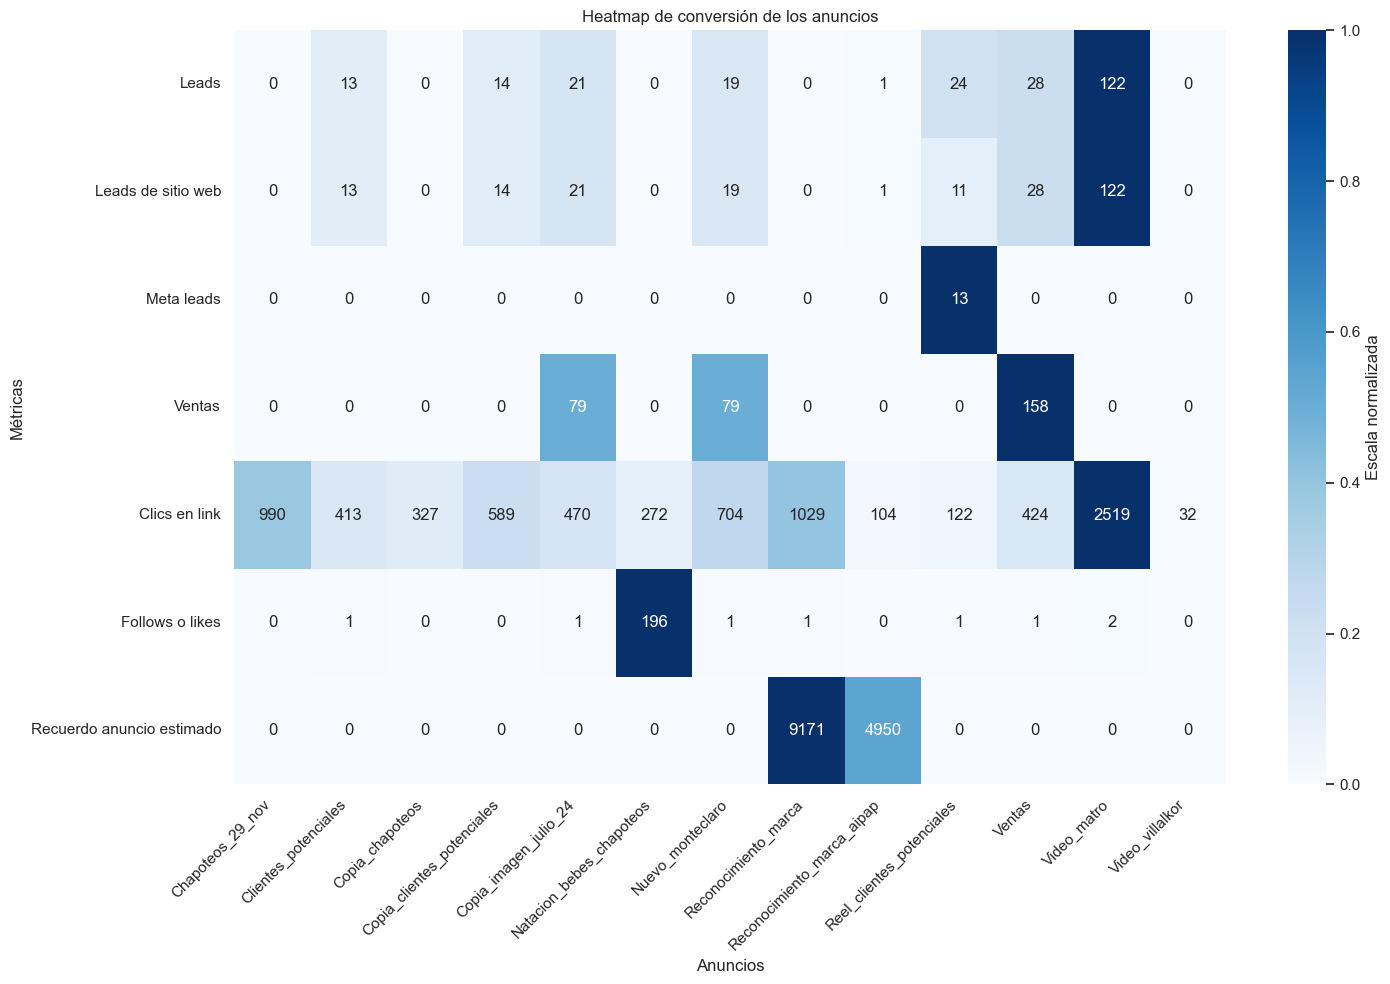

In [ ]:
# Aggregate metrics for each Ad
ad_conversion_aggregates = raw_data.groupby('Anuncio').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Ensure only numeric data is used
ad_data = ad_conversion_aggregates.set_index('Anuncio').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
ad_data_normalized = ad_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_ad_data = ad_data_normalized.T.values.astype(float)

# Prepare annotations
ad_annotations = ad_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(heatmap_ad_data, 
                 annot=ad_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=ad_data_normalized.index,
                 yticklabels=ad_data_normalized.columns)

plt.title('Heatmap de conversión de los anuncios')
plt.xlabel('Anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El heatmap muestra las conversiones de diferentes anuncios a través de varias métricas: leads, ventas, clics en link, follows o likes, y recuerdo de anuncio estimado:

1. **Leads**:
   - "Clientes_potenciales" y "Matro_intereses_conversion" destacan en generación de leads, indicando efectividad en captar interés.

2. **Leads de sitio web**:
   - Similar a los leads generales, "Clientes_potenciales" y "Matro_intereses_conversion" también lideran en esta métrica.

3. **Meta leads**:
   - "Embarazadas_anuncio" es la única campaña con meta leads significativos, sugiriendo un enfoque específico en esta conversión.

4. **Ventas**:
   - "Ventas" es el único anuncio con un número significativo de ventas, cumpliendo su objetivo principal.

5. **Clics en link**:
   - "Matro_intereses_conversion" tiene el mayor número de clics, lo que sugiere un alto nivel de interacción.
   - "Clientes_potenciales" también muestra un buen rendimiento en esta métrica.

6. **Follows o likes**:
   - "Redes_seguidores" destaca en esta métrica, lo que es consistente con su objetivo de aumentar la presencia en redes sociales.

7. **Recuerdo de anuncio estimado**:
   - "Reconocimiento_marca" y "Aipap_reconocimiento_marca" tienen un alto recuerdo de anuncio, indicando éxito en aumentar la visibilidad de la marca.

**Conclusiones**:
- "Matro_intereses_conversion" es altamente efectivo en varias métricas de conversión, especialmente en clics y leads.
- "Ventas" cumple su objetivo principal de generar ventas.
- Las campañas de reconocimiento de marca son efectivas en aumentar el recuerdo de anuncio.
- Es importante seguir optimizando las campañas para mejorar las métricas de conversión y maximizar el retorno de la inversión.

##### 4.4 CONVERSIÓN PLATAFORMAS: LEADS, LEADS EN SITIO WEB, META LEADS, VENTAS, CLICS EN LINK, FOLLOWS O LIKES, RECUERDO ANUNCIO ESTIMADO

In [ ]:
print(platform_conversion_aggregates)

         Plataforma  Leads  Leads de sitio web  Meta leads  Ventas  \
0  audience_network      0                   0           0     0.0   
1          facebook     27                  22           5     0.0   
2         instagram    215                 207           8   316.0   
3         messenger      0                   0           0     0.0   

   Clics en link  Follows o likes  Recuerdo anuncio estimado  
0            105                0                          0  
1           3235              204                      10990  
2           4655                0                       3130  
3              0                0                          1  


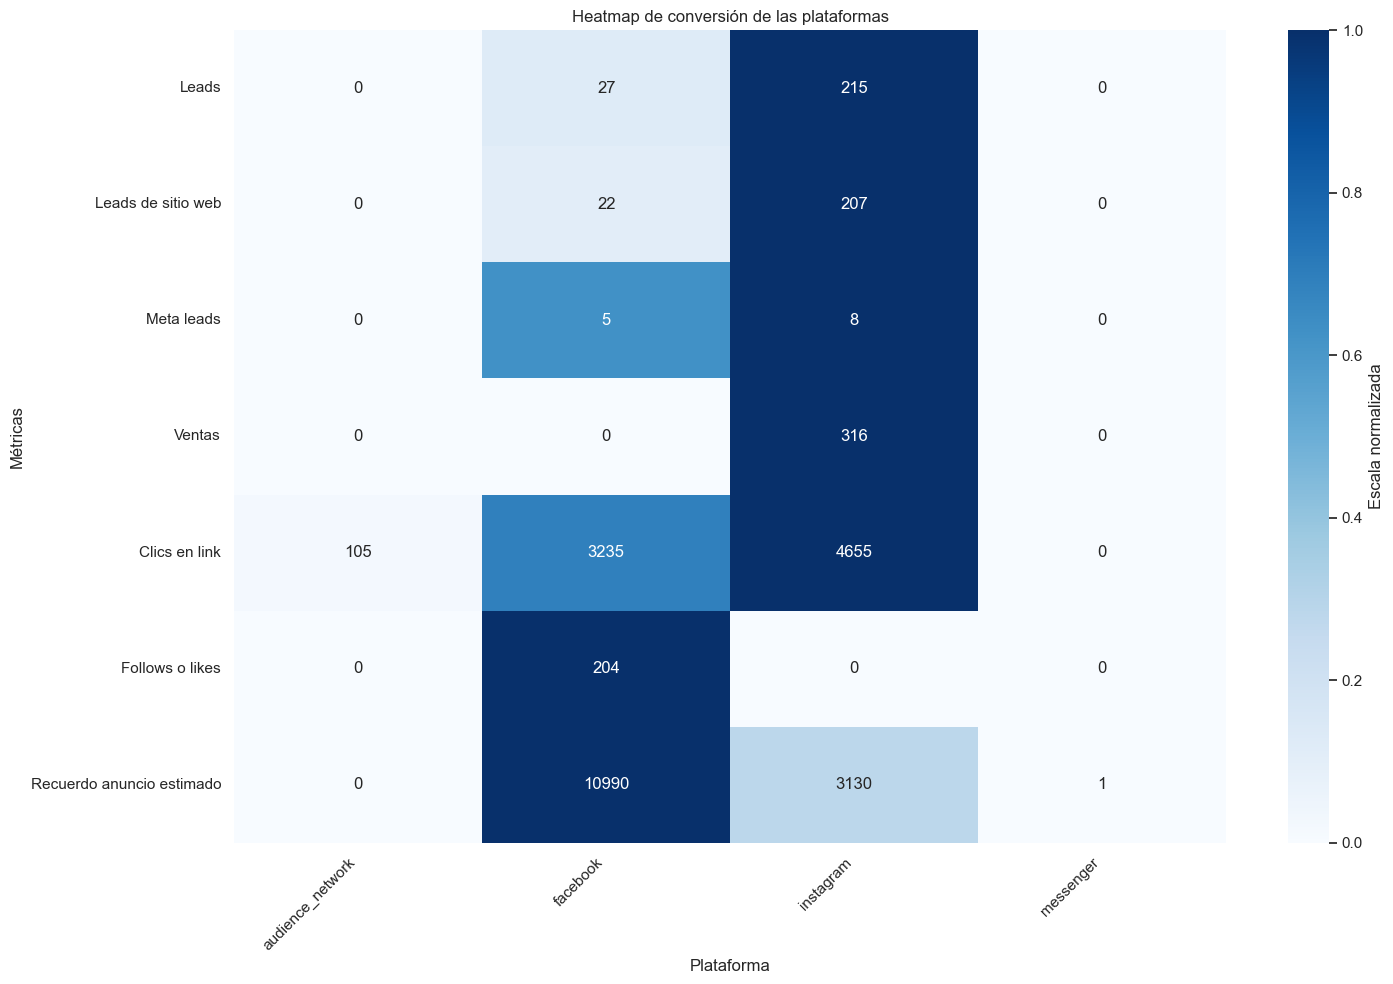

In [ ]:
# Aggregate metrics for each Plartform
platform_conversion_aggregates = raw_data.groupby('Plataforma').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Ensure only numeric data is used
platform_data = platform_conversion_aggregates.set_index('Plataforma').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
platform_data_normalized = platform_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_platform_data = platform_data_normalized.T.values.astype(float)

# Prepare annotations
platform_annotations = platform_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(heatmap_platform_data, 
                 annot=platform_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=platform_data_normalized.index,
                 yticklabels=platform_data_normalized.columns)

plt.title('Heatmap de conversión de las plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El heatmap muestra las conversiones en diferentes plataformas a través de varias métricas: leads, ventas, clics en link, follows o likes, y recuerdo de anuncio estimado:

1. **Leads**:
   - **Instagram** lidera en generación de leads, mostrando su efectividad en captar interés.

2. **Leads de sitio web**:
   - **Instagram** también destaca en esta métrica, sugiriendo una buena integración con el sitio web.

3. **Meta leads**:
   - **Instagram** tiene un número moderado de meta leads, indicando un enfoque específico en esta conversión.

4. **Ventas**:
   - **Instagram** es la única plataforma con un número significativo de ventas, cumpliendo su objetivo principal.

5. **Clics en link**:
   - **Instagram** tiene el mayor número de clics, lo que sugiere un alto nivel de interacción.
   - **Facebook** también muestra un buen rendimiento en esta métrica.

6. **Follows o likes**:
   - **Facebook** destaca en esta métrica, lo que es consistente con su objetivo de aumentar la presencia en redes sociales.

7. **Recuerdo de anuncio estimado**:
   - **Facebook** tiene un alto recuerdo de anuncio, indicando éxito en aumentar la visibilidad de la marca.

**Conclusiones**:
- **Instagram** es altamente efectivo en varias métricas de conversión, especialmente en leads y ventas.
- **Facebook** muestra un buen rendimiento en clics y recuerdo de anuncio.
- Es importante seguir optimizando las estrategias en cada plataforma para mejorar las métricas de conversión y maximizar el retorno de la inversión.

***

##### LANDING PAGE

In [ ]:
landing_page_metrics = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/google analytics/landing_page_metrics.csv',
                      encoding='utf-8')  # Use 'utf-16' encoding

# Convert 'Fecha' to datetime
landing_page_metrics['Fecha'] = pd.to_datetime(landing_page_metrics['Fecha'])

# Remove commas and convert 'Impresiones' to integer
landing_page_metrics['Impresiones'] = landing_page_metrics['Impresiones'].str.replace(',', '').astype(int)

landing_page_metrics.head()

Landing page      Fecha  Coste  Clics  \
0                          https://www.chapoteos.com 2025-01-29   0.59      5   
1  https://www.chapoteos.com{ignore}?utm_source=g... 2025-01-29   1.09      2   
2  https://www.chapoteos.com/{ignore}?utm_source=... 2025-01-29   2.23      7   
3  https://www.chapoteos.com/{ignore}?utm_source=... 2025-01-29   0.73      1   
4  https://www.chapoteos.com/2-clases-de-natacion... 2025-01-29   4.38      4   

   Impresiones  
0          150  
1           26  
2         1639  
3           16  
4          253

In [ ]:
# Extract all URLs into a list
urls_list = landing_page_metrics['Landing page'].tolist();

In [ ]:
# Function to categorize URLs (your existing function)
def categorize_url(url_list):
    if '/Articulos-Generales/' in url_list:
        return 'Artículos generales'
    elif '/categoria-producto/' in url_list:
        return 'Categorías de producto'
    elif 'natacion' in url_list or 'matronatacion' in url_list or 'cursos' in url_list or 'clases' in url_list:
        return 'Clases y cursos'
    elif 'tienda' in url_list:
        return 'Tienda'
    elif 'contacto' in url_list or 'ubicacion' in url_list or 'preguntas-frecuentes' in url_list:
        return 'Contacto / F.A.Q'
    elif url_list == 'https://www.chapoteos.com' or '/blog.html' in url_list:
        return 'Página Inicio'
    elif 'blog' in url_list:
        return 'Blog'
    elif 'campaign' in url_list:
        return 'Campañas'
    else:
        return 'Misceláneos'

# Apply the categorization to create a new column
landing_page_metrics['Categoría de página'] = landing_page_metrics['Landing page'].apply(categorize_url)

# Drop the original 'Landing page' column
landing_page_metrics = landing_page_metrics.drop('Landing page', axis=1)

# Display the updated DataFrame
landing_page_metrics.head()

Fecha  Coste  Clics  Impresiones Categoría de página
0 2025-01-29   0.59      5          150       Página Inicio
1 2025-01-29   1.09      2           26            Campañas
2 2025-01-29   2.23      7         1639            Campañas
3 2025-01-29   0.73      1           16            Campañas
4 2025-01-29   4.38      4          253     Clases y cursos

##### 1 AWARENESS POR CATEGORÍA DE PÁGINA: IMPRESIONES POR DÍA

In [ ]:
# Group by 'Fecha' and 'Categoría de página' and aggregate 'Impresiones'
aggregated_landing_page_data = landing_page_metrics.groupby(['Fecha', 'Categoría de página'])['Impresiones'].sum().reset_index()

# Display the aggregated DataFrame
aggregated_landing_page_data.head()

Fecha     Categoría de página  Impresiones
0 2025-01-29     Artículos generales           44
1 2025-01-29                Campañas         1681
2 2025-01-29  Categorías de producto          299
3 2025-01-29         Clases y cursos         1145
4 2025-01-29        Contacto / F.A.Q          377

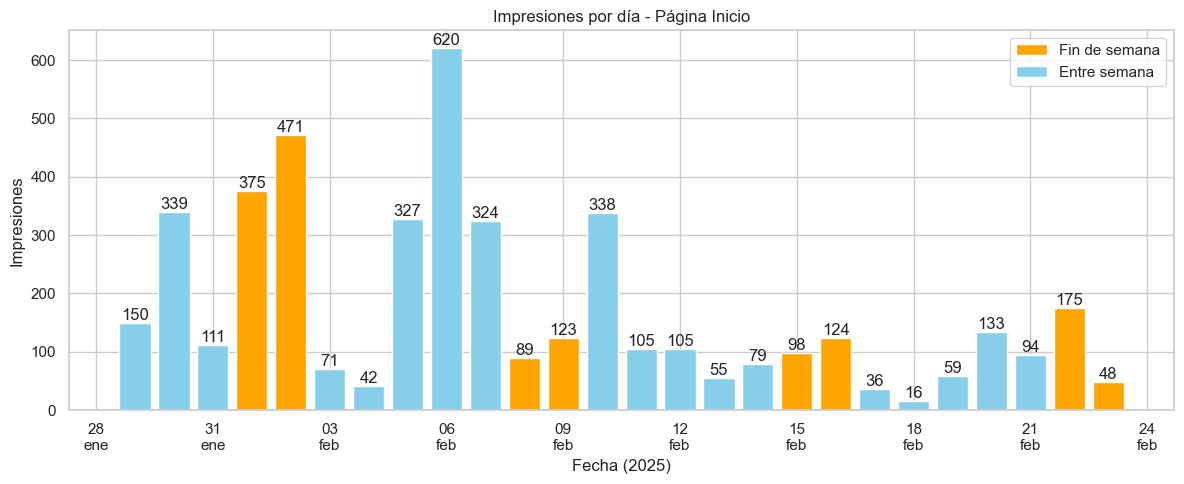

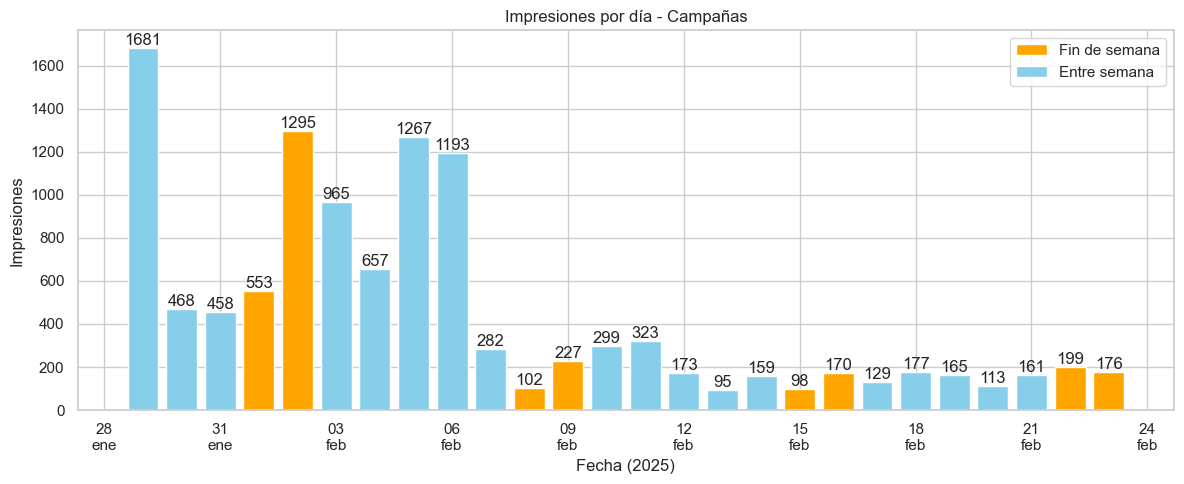

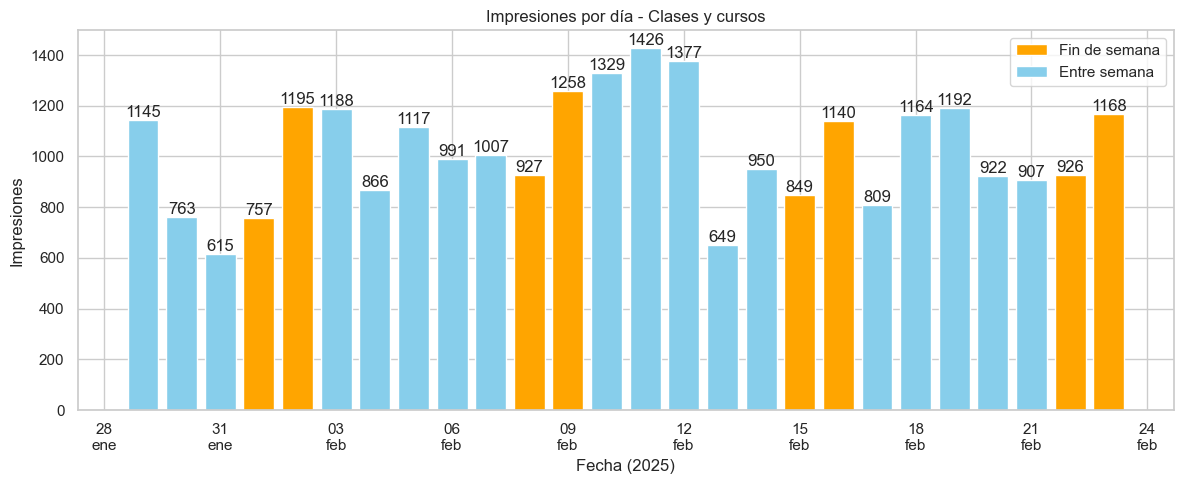

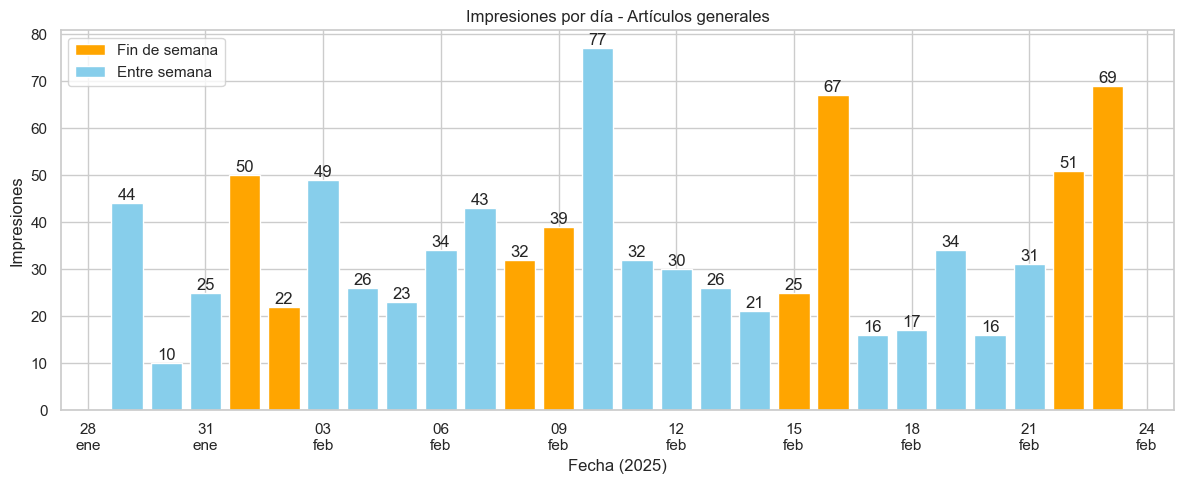

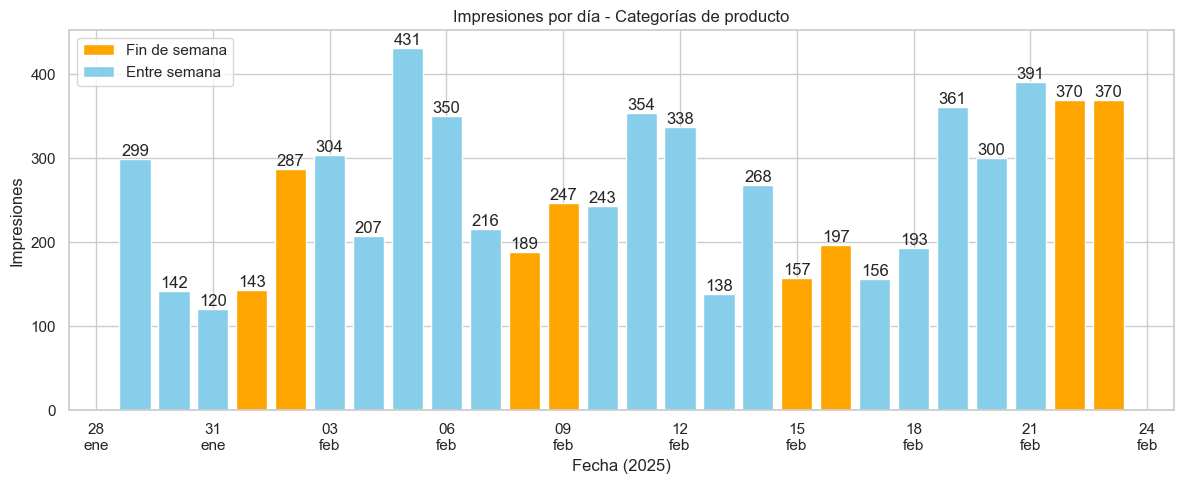

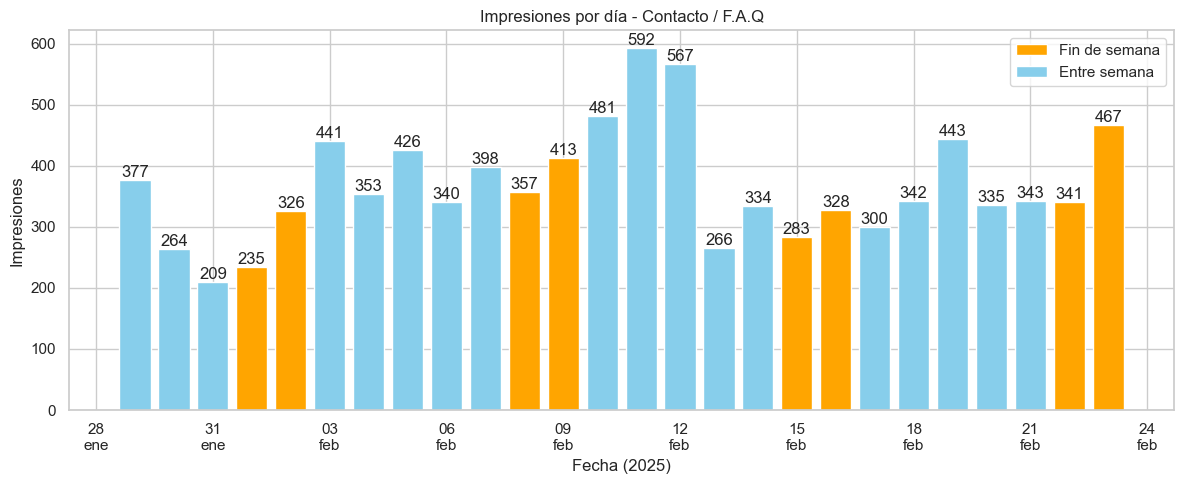

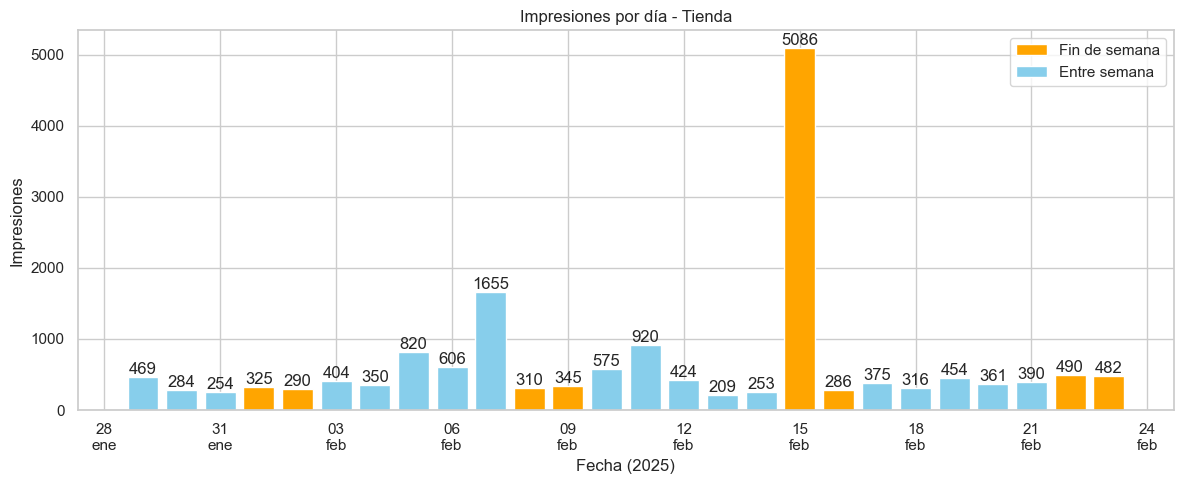

In [ ]:
# Get unique categories
categories = landing_page_metrics['Categoría de página'].unique()

# Create a plot for each category
for category in categories:
    # Filter data for the current category
    category_data = landing_page_metrics[landing_page_metrics['Categoría de página'] == category]
    
    # Group by 'Fecha' and sum 'Impresiones'
    aggregated_category_data = category_data.groupby('Fecha')['Impresiones'].sum()
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Create bar plot with different colors for weekends
    bars = []
    for date, value in aggregated_category_data.items():
        if date.weekday() >= 5:  # Saturday and Sunday
            bars.append(plt.bar(date, value, color='orange', label='Fin de semana' if date.weekday() == 5 else ""))
        else:
            bars.append(plt.bar(date, value, color='skyblue', label='Entre semana' if date.weekday() == 0 else ""))
    
    # Format x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Customize the plot
    plt.title(f'Impresiones por día - {category}')
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Impresiones')
    
    # Annotate bars with values
    for bar in bars:
        height = bar[0].get_height()
        plt.text(bar[0].get_x() + bar[0].get_width() / 2, height,
                 f'{height:.0f}',
                 ha='center', va='bottom')
    
    # Add legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.tight_layout()
    
    # Show the plot
    plt.show()

### Análisis comparativo de impresiones por categoría de página web

#### Resumen ejecutivo

Análisis de impresiones diarias para diferentes categorías de la página web de Chapoteos, comparando días entre semana y fines de semana.

#### Patrones generales observados

1. **Página de Inicio**
   - Máximo: 620 impresiones (6 de febrero)
   - Promedio entre semana superior a fines de semana
   - Alta variabilidad en impresiones diarias

2. **Campañas**
   - Máximo: 1,682 impresiones (29 febrero)
   - Picos significativos en días específicos
   
3. **Clases y Cursos**
   - Máximo: 1,426 impresiones (11 de febrero)
   - Consistencia en impresiones entre semana y fin de semana
   - Interés constante en ofertas educativas

4. **Artículos Generales**
   - Máximo: 77 impresiones (10 de febrero)
   - Menor tráfico comparado con otras categorías
   - Ligero incremento en fines de semana

5. **Categorías de Producto**
   - Máximo: 431 impresiones (5 de febrero)
   - Variabilidad moderada
   - Interés similar entre días laborales y fines de semana

6. **Contacto / FAQ**
   - Máximo: 592 impresiones (11 de febrero)
   - Tráfico constante
   - Picos de interés en días específicos

7. **Tienda**
   - Máximo: 5,086 impresiones (15 de febrero, fin de semana)
   - Mayor pico de impresiones en toda la página

#### Información principal

- **Mayor interés**: página de Tienda y página de Inicio
- **Consistencia**: Clases y Cursos
- **Menor tráfico**: Artículos generales

#### Conclusión

La página web muestra un **comportamiento dinámico** con variaciones significativas entre categorías y días de la semana. La **tienda online** destaca como el punto focal de mayor interés, sugiriendo una estrategia de marketing digital efectiva centrada en ventas y promociones.

***

##### 2. ENGAGEMENT

##### * Sesiones interactivas
##### * Sesiones
##### * % Rebotes
##### * Usuarios activos
##### * Número de eventos
##### * Interacciones
##### * Clics

##### Definiciones de canales:

1.  **Social de pago**
    - Definición: se refiere al tráfico generado a partir de anuncios pagados en plataformas de redes sociales. Estos son típicamente publicaciones patrocinadas o anuncios que aparecen en los feeds o líneas de tiempo de los usuarios.
    - Plataformas: las plataformas comunes incluyen Meta (Facebook e Instagram).
    - Propósito: el objetivo es alcanzar una audiencia específica a través de promociones pagadas para aumentar el reconocimiento de marca, generar tráfico y obtener leads o ventas.

2. **Búsqueda de pago**
    - Definición: se refiere al tráfico proveniente de anuncios pagados que aparecen en las páginas de resultados de los motores de búsqueda (SERPs). Estos son típicamente anuncios de pago por clic (PPC).
    - Plataformas: la plataforma principal es Google Ads (anteriormente Google AdWords), pero también puede incluir Bing Ads y otros motores de búsqueda.
    - Propósito: la meta es captar usuarios que están buscando activamente palabras clave específicas relacionadas con tus productos o servicios, dirigiéndolos a tu sitio web.

3. **Búsqueda orgánica**
    - Definición: se refiere al tráfico que proviene de resultados de búsqueda no pagados en los motores de búsqueda. Esto se logra a través de la optimización para motores de búsqueda (SEO).
    - Plataformas: principalmente Google, pero también incluye Bing, Yahoo y otros motores de búsqueda.
    - Propósito: el objetivo es mejorar la visibilidad de tu sitio web en los resultados de los motores de búsqueda mediante contenido relevante y prácticas de SEO, atrayendo usuarios sin pagar por anuncios.

4. **Directo**
    - Definición: se refiere a los usuarios que llegan a tu sitio web escribiendo la URL directamente en su navegador o a través de marcadores. También puede incluir tráfico donde la fuente no es fácilmente identificable.
    - Propósito: el tráfico directo a menudo indica reconocimiento y lealtad a la marca, ya que los usuarios están buscando intencionalmente tu sitio web.

5. **Social orgánico**
    - Definición: se refiere al tráfico de publicaciones no pagadas en redes sociales. Esto incluye cualquier contenido compartido en plataformas de redes sociales que no esté promovido a través de publicidad pagada.
    - Plataformas: Meta (Facebook e Instagram), Twitter, LinkedIn, Pinterest, y otras.
    - Propósito: el objetivo es interactuar con tu audiencia a través de contenido regular y no pagado para construir comunidad, aumentar el reconocimiento de marca y generar tráfico.

6. **Google Ads (AdWords)**
    - Función: es una plataforma de publicidad en línea donde los anunciantes pujan para mostrar breves anuncios, ofertas de servicios, listados de productos o videos a los usuarios web.
    - Propósito: el propósito principal de Google Ads es dirigir tráfico específico a un sitio web colocando anuncios en los resultados de búsqueda y a través de la Red de Display de Google. Los anunciantes pueden dirigirse a palabras clave específicas, demografías y comportamientos de usuarios para llegar a clientes potenciales de manera efectiva.

7. **Recomendación**
    - Definición: se refiere a los usuarios que llegan a tu sitio web a través de enlaces en otros sitios web. Esto incluye cualquier tráfico que no provenga de motores de búsqueda, redes sociales o campañas pagadas.
    - Ejemplos de Plataformas: blogs, foros, sitios de noticias, y cualquier otro sitio web que enlace al tuyo.

8. **Red de cruce**
    - Definición: se refiere a campañas publicitarias que se ejecutan en múltiples redes o plataformas al mismo tiempo. Este canal agrupa el tráfico que no se puede atribuir a una sola red específica.
    - Ejemplos de Plataformas: campañas que abarcan Google Ads, Facebook Ads, y otras redes publicitarias simultáneamente.

9. **Display**
    - Definición: el tráfico de display proviene de anuncios gráficos que se muestran en sitios web o aplicaciones. Estos anuncios pueden incluir banners, imágenes, y otros formatos visuales.
    - Ejemplos de Plataformas: Google Display Network, anuncios en sitios web de noticias, y banners en aplicaciones móviles.

10. **Otro canal de pago**
    - Definición: es un canal que agrupa el tráfico de campañas pagadas que no encajan en las categorías estándar de búsqueda pagada, social pagado, o display. Puede incluir métodos de publicidad menos comunes.
    - Ejemplos de Plataformas: publicidad en plataformas de nicho o métodos de pago no tradicionales.

11. **Sin asignar**
    - Definición: se refiere al tráfico que no se ha podido clasificar en ninguno de los canales definidos. Esto puede ocurrir si la fuente de tráfico no está etiquetada correctamente o si hay problemas de seguimiento.
    - Ejemplos de Plataformas: cualquier tráfico que no se pueda atribuir a una fuente específica debido a la falta de datos o etiquetado.

12. **Video de pago**
    - Definición: se refiere al tráfico generado a partir de anuncios en video pagados. Estos anuncios suelen aparecer antes, durante o después de contenido de video en línea.
    - Ejemplos de Plataformas: YouTube Ads, anuncios en plataformas de streaming como Hulu o Twitch, y videos promocionados en redes sociales.

In [ ]:
# Read the CSV file into a DataFrame
channels = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/google analytics/channels.csv', sep=',')

# Rename columns
channels = channels.rename(columns={
    'Session default channel group': 'Canal', 
    'Date': 'Fecha', 
    'Bounce rate': '% Rebote', 
    'Sessions': 'Sesiones', 
    'Engaged sessions': 'Sesiones interactivas', 
    'Event count': 'Número de eventos', 
    'Key events': 'Eventos importantes', 
    'Active users': 'Usuarios activos'
})

# Mapping of English channel names to Spanish
channel_mapping = {
    'Cross-network': 'Red de cruce',
    'Direct': 'Directo',
    'Display': 'Display',
    'Organic Search': 'Búsqueda orgánica',
    'Organic Social': 'Social orgánico',
    'Paid Other': 'Otro canal de pago',
    'Paid Search': 'Búsqueda de pago',
    'Paid Social': 'Social de pago',
    'Referral': 'Recomendación',
    'Unassigned': 'Sin asignar',
    'Paid Video': 'Video de pago'
}

# Rename the values in the 'Canal' column
channels['Canal'] = channels['Canal'].replace(channel_mapping)

# Convert 'Fecha' to datetime
channels['Fecha'] = pd.to_datetime(channels['Fecha'], format='%Y%m%d')

# Format '% Rebote' to 2 decimal places
channels['% Rebote'] = channels['% Rebote'].round(2)

# Display the first few rows of the DataFrame
channels.head();

In [ ]:
# Assuming 'channels' is your DataFrame
# Group by 'Canal' and calculate min and max for 'Sesiones' and 'Sesiones interactivas'
result = channels.groupby('Canal').agg({
    'Sesiones': ['min', 'max'],
    'Sesiones interactivas': ['min', 'max']
})

# Display the result
print(result)

                   Sesiones      Sesiones interactivas     
                        min  max                   min  max
Canal                                                      
Búsqueda de pago         43  110                    37   84
Búsqueda orgánica        28   74                    25   63
Directo                  14   47                     7   40
Display                   1   12                     0   10
Otro canal de pago        1   10                     0    4
Recomendación             4   15                     4   13
Red de cruce              4   36                     2   18
Sin asignar               1   16                     0   10
Social de pago          101  279                    54  167
Social orgánico           7   39                     4   38
Video de pago             1    1                     1    1


##### 2.1 SESIONES vs. SESIONES INTERACTIVAS POR CANAL

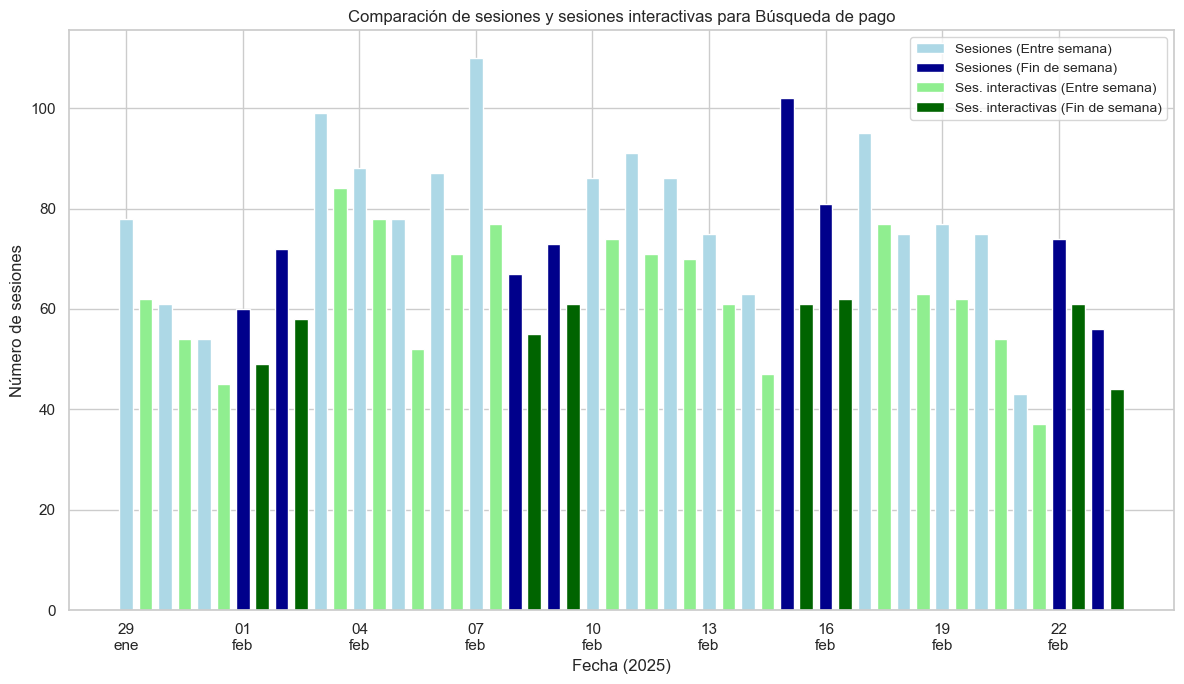

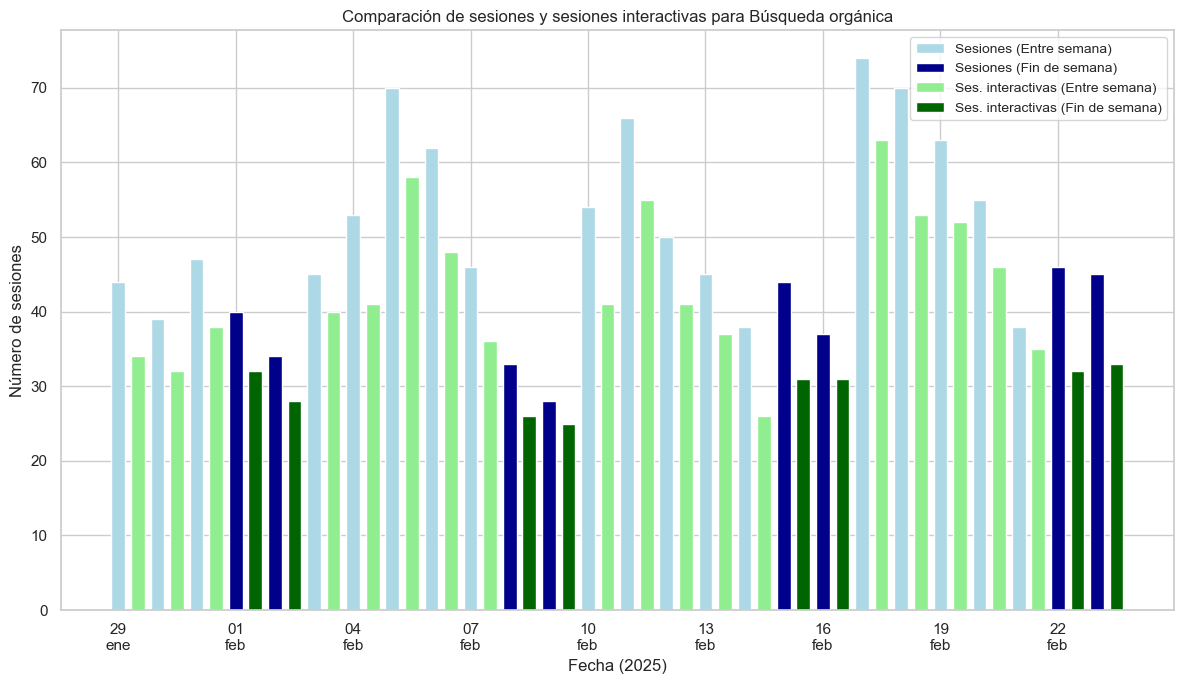

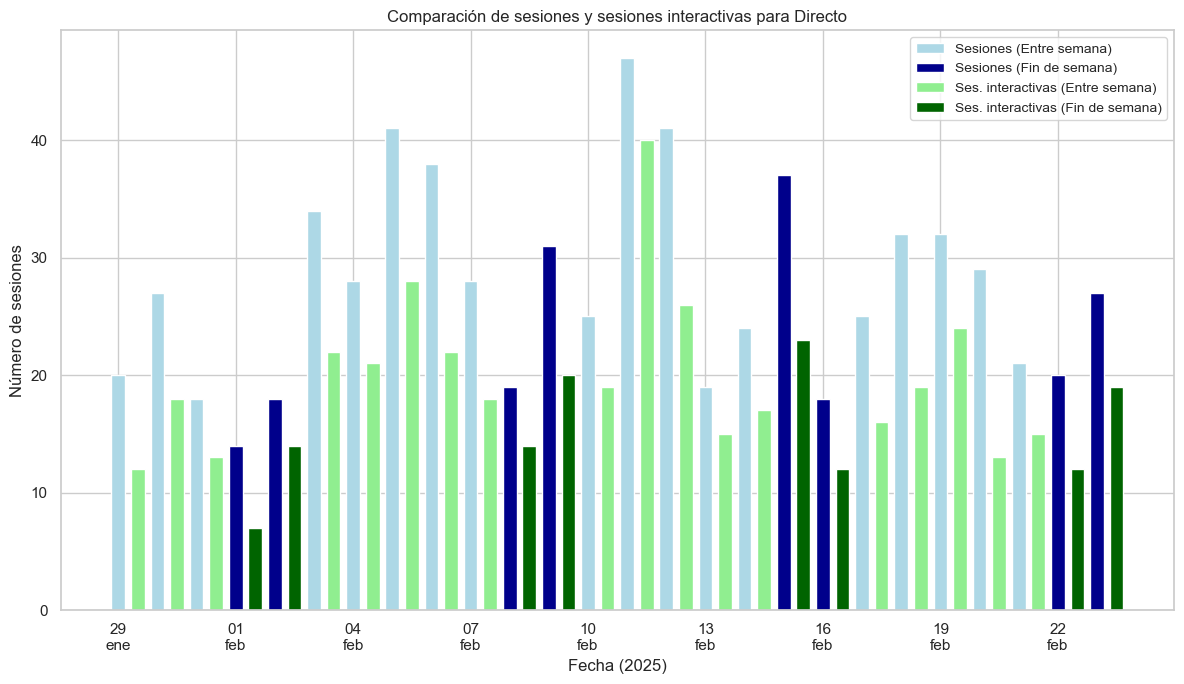

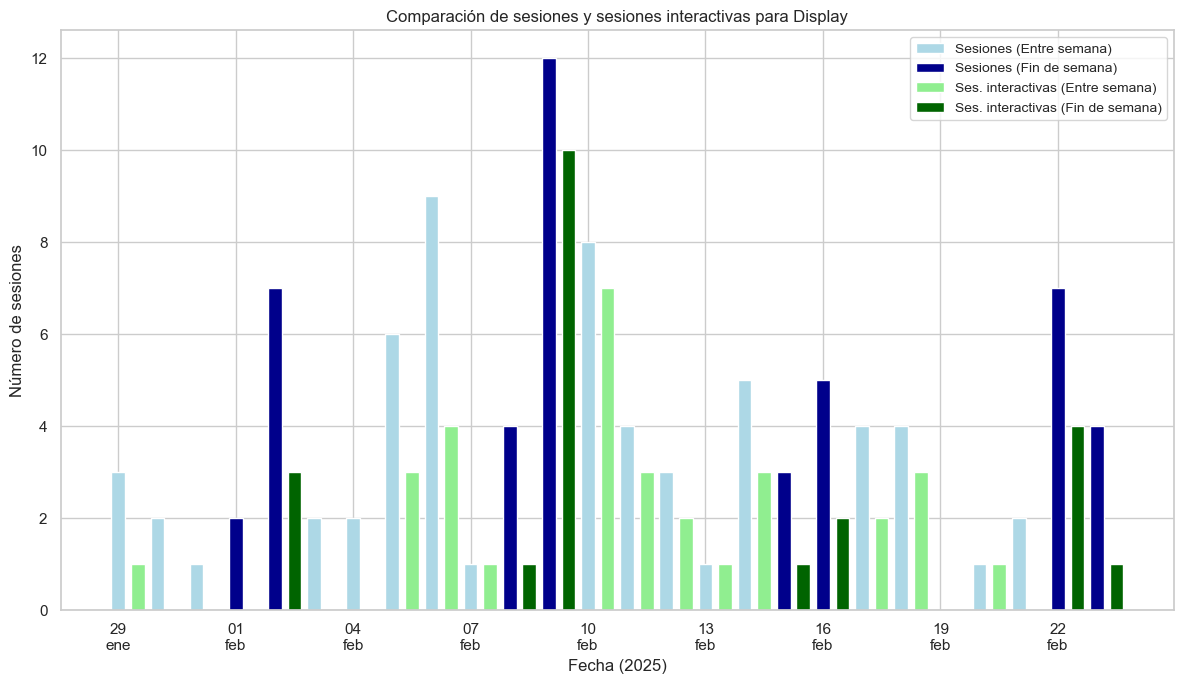

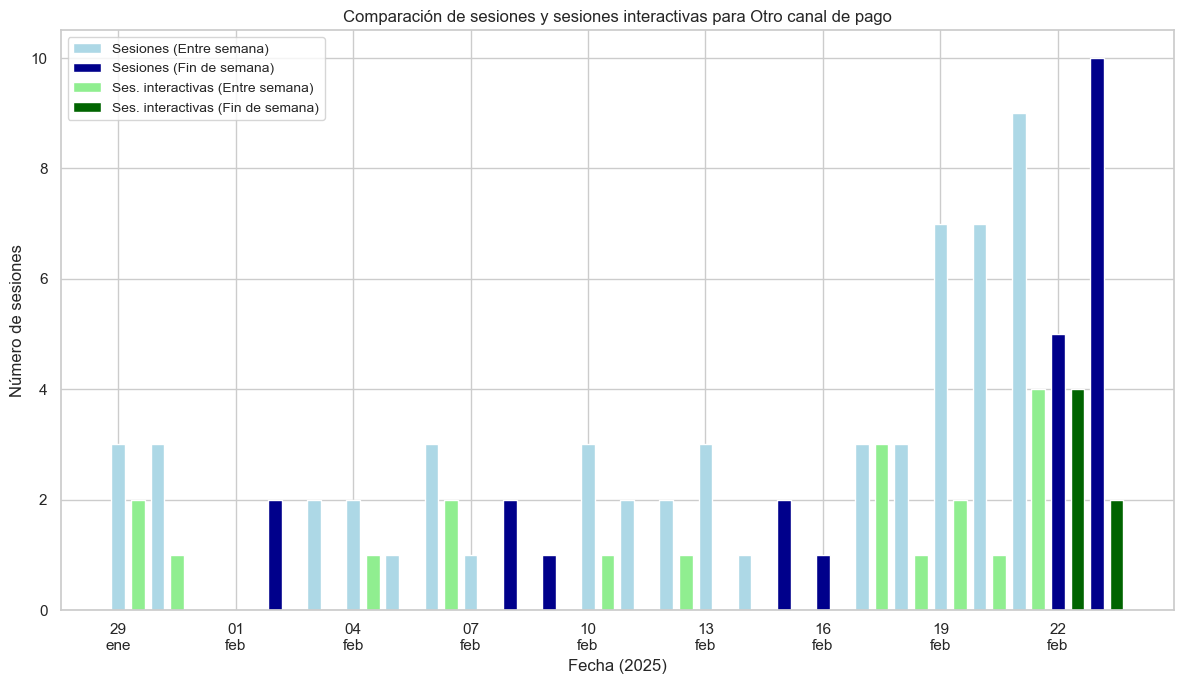

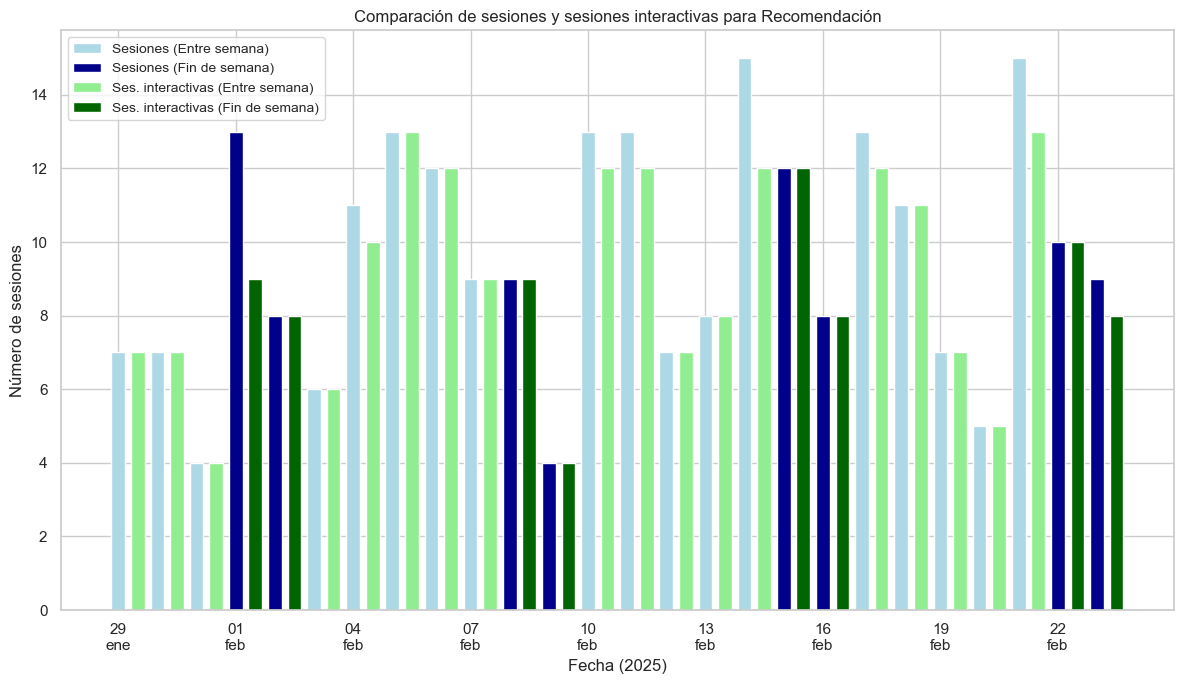

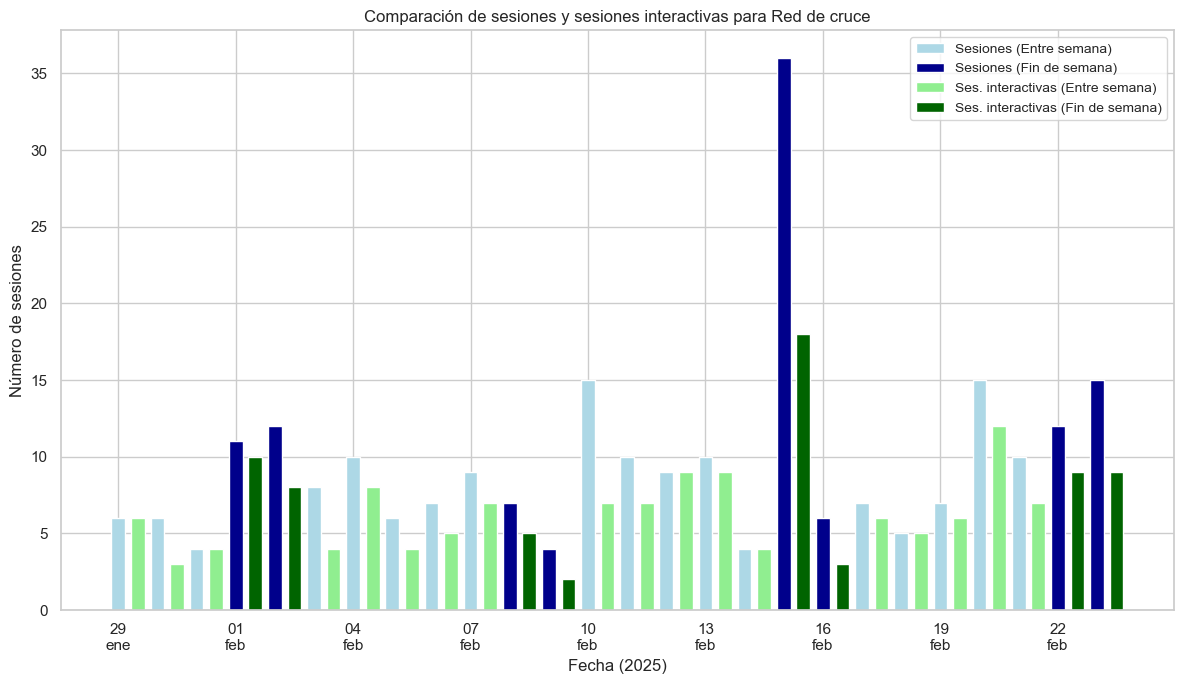

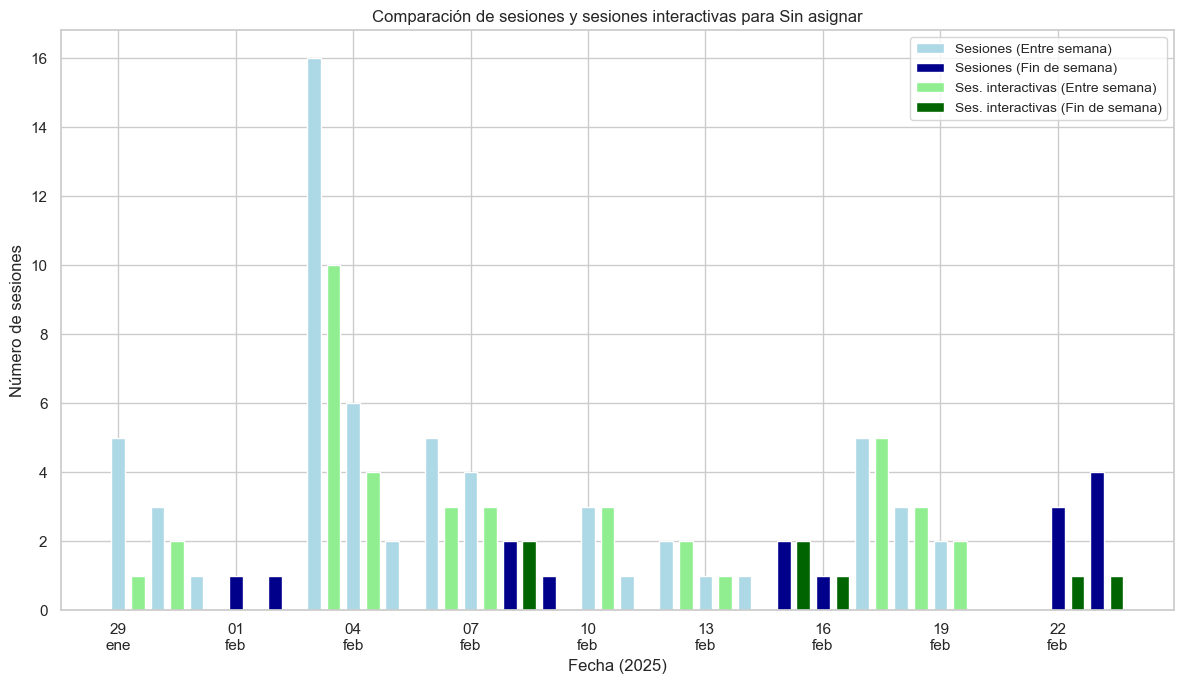

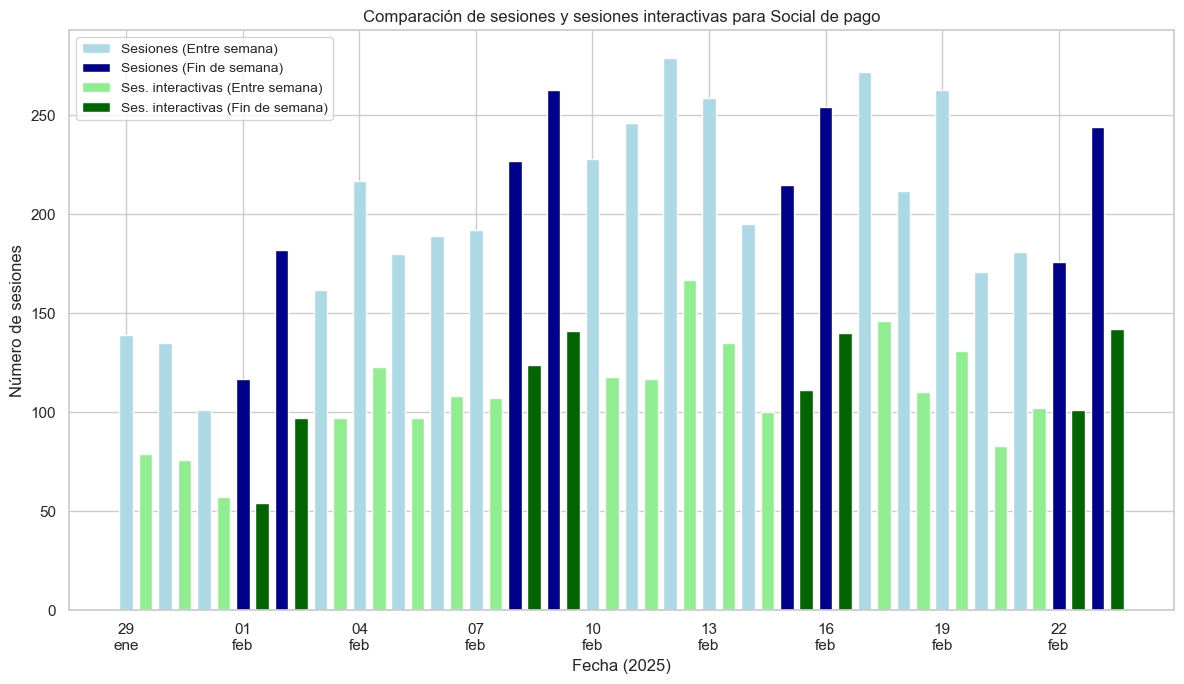

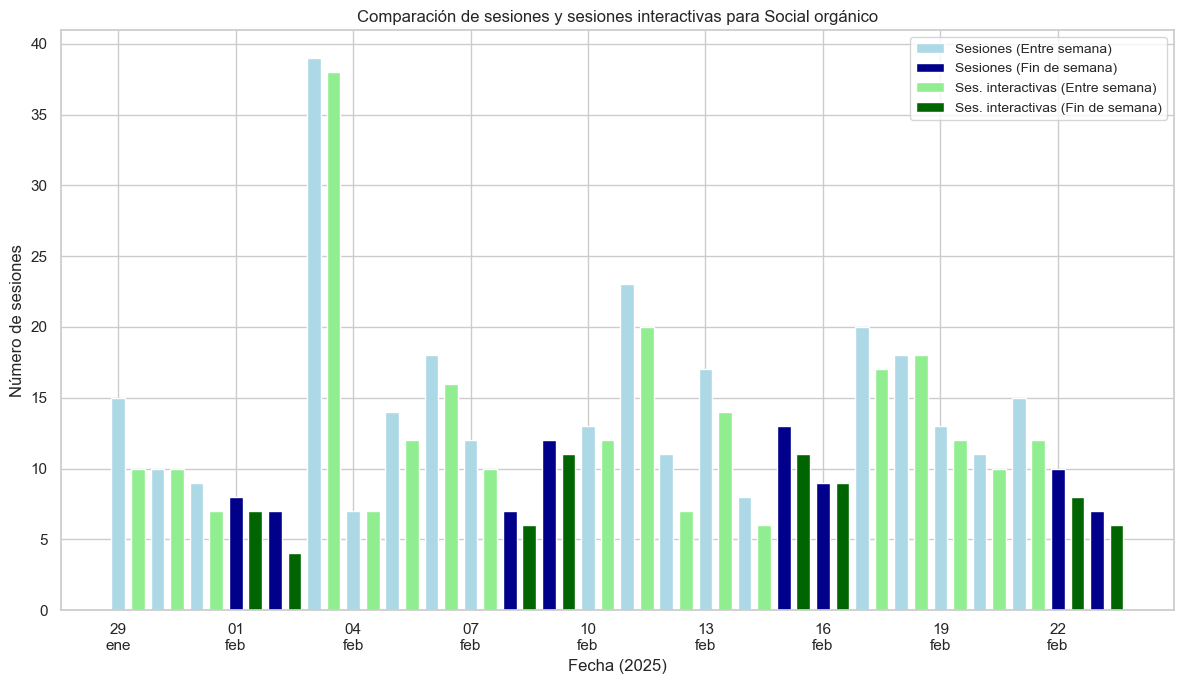

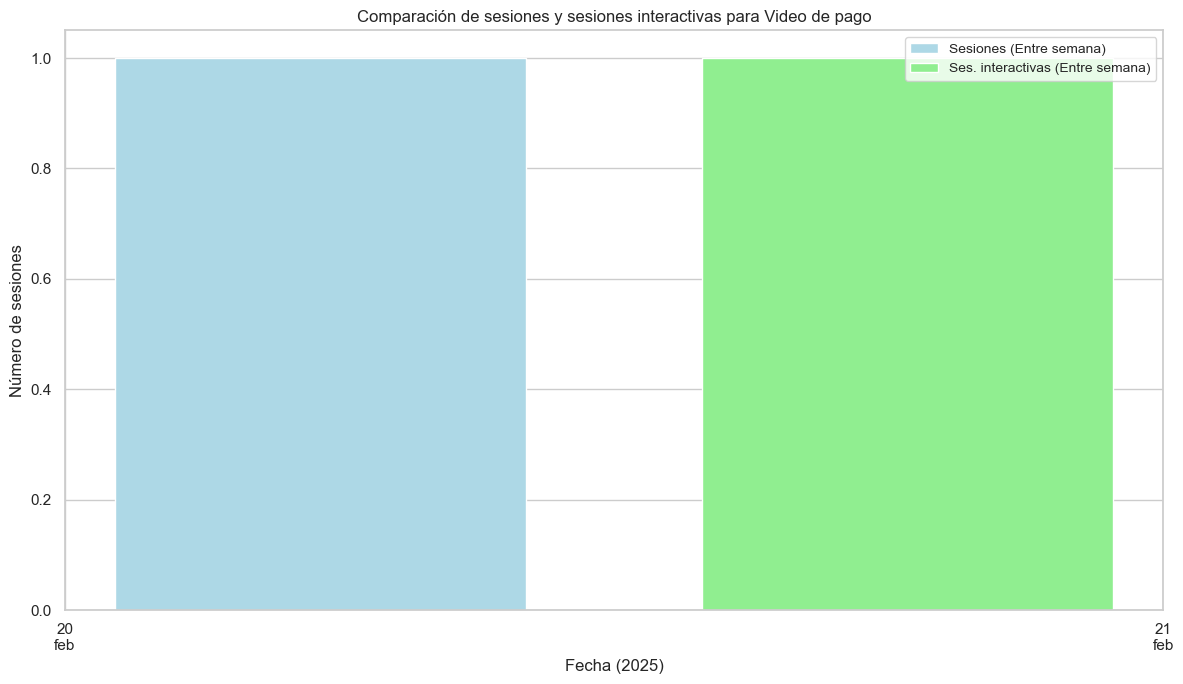

In [ ]:
# Aggregate data by 'Canal' and 'Fecha'
aggregated_channels = channels.groupby(['Canal', 'Fecha']).sum().reset_index()

# Get unique channels
unique_channels = aggregated_channels['Canal'].unique()

# Plotting for each channel
for channel in unique_channels:
    # Filter data for the current channel
    channel_data = aggregated_channels[aggregated_channels['Canal'] == channel]
    
    # Plotting
    plt.figure(figsize=(12, 7))
    sns.set(style="whitegrid")
    
    # Create a bar plot
    bar_width = 0.35
    
    # Plot sessions
    for i, (fecha, sesiones) in enumerate(zip(channel_data['Fecha'], channel_data['Sesiones'])):
        color = 'darkblue' if fecha.weekday() >= 5 else 'lightblue'
        plt.bar(fecha, sesiones, bar_width, color=color, label='Sesiones (Fin de semana)' if fecha.weekday() >= 5 else 'Sesiones (Entre semana)')
    
    # Plot interactive sessions
    for i, (fecha, sesiones_interactivas) in enumerate(zip(channel_data['Fecha'], channel_data['Sesiones interactivas'])):
        color = 'darkgreen' if fecha.weekday() >= 5 else 'lightgreen'
        plt.bar(fecha + pd.Timedelta(days=0.5), sesiones_interactivas, bar_width, color=color, label='Ses. interactivas (Fin de semana)' if fecha.weekday() >= 5 else 'Ses. interactivas (Entre semana)')
    
    # Format x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Add labels and title
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Número de sesiones')
    plt.title(f'Comparación de sesiones y sesiones interactivas para {channel}')
    plt.xticks()
    
    # Add legend with reduced font size
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize='small')
    
    # Show plot
    plt.tight_layout()
    plt.show()

### Análisis comparativo de sesiones e interacciones en sesiones por canal

#### 1. Búsqueda de pago
- **Característica principal**: alta variabilidad en sesiones
- Picos de sesiones entre 43-110
- Sesiones interactivas generalmente menores que sesiones totales
- Mayor actividad en días entre semana
- Fluctuaciones sugieren estrategia de targeting dinámica

#### 2. Búsqueda orgánica
- Sesiones entre 28-74
- Consistencia en sesiones interactivas
- Menor variabilidad comparado con búsqueda de pago
- Equilibrio entre sesiones de semana y fin de semana
- Indica estrategia de contenido orgánico estable

#### 3. Directo
- Sesiones moderadas entre 14-47
- Alta proporción de sesiones interactivas
- Picos aleatorios en diferentes días
- Sugiere tráfico directo con buen engagement

#### 4. Display
- Muy pocas sesiones entre 1-12
- Baja interactividad
- Posible canal de menor prioridad o en fase experimental

#### 5. Otro canal de pago
- Sesiones muy limitadas entre 1-10
- Mínima interactividad
- Canal complementario o en fase inicial

#### 6. Recomendación
- Sesiones entre 4-15
- Buena proporción de sesiones interactivas
- Potencial canal para desarrollo futuro

#### 7. Red de cruce
- Sesiones entre 4-36
- Variabilidad moderada
- Interesante potencial de engagement

#### 8. Sin asignar
- Pocas sesiones entre 1-16
- Baja interactividad
- Requiere clasificación y optimización

#### 9. Social de pago
- Alto volumen de sesiones entre 101-279
- Buena interactividad
- Canal estratégico con gran potencial

#### 10. Social orgánico
- Sesiones moderadas entre 7-39
- Consistente interactividad
- Canal con engagement estable

#### 11. Video de pago
- Datos muy limitados
- Requiere más investigación

#### Conclusión general
Canales como **Social de Pago**, **Búsqueda de Pago** y **Búsqueda Orgánica** muestran mayor potencial de engagement. Otros canales necesitan estrategias de optimización o revisión de su enfoque.

##### 2.2 % REBOTE POR CANAL

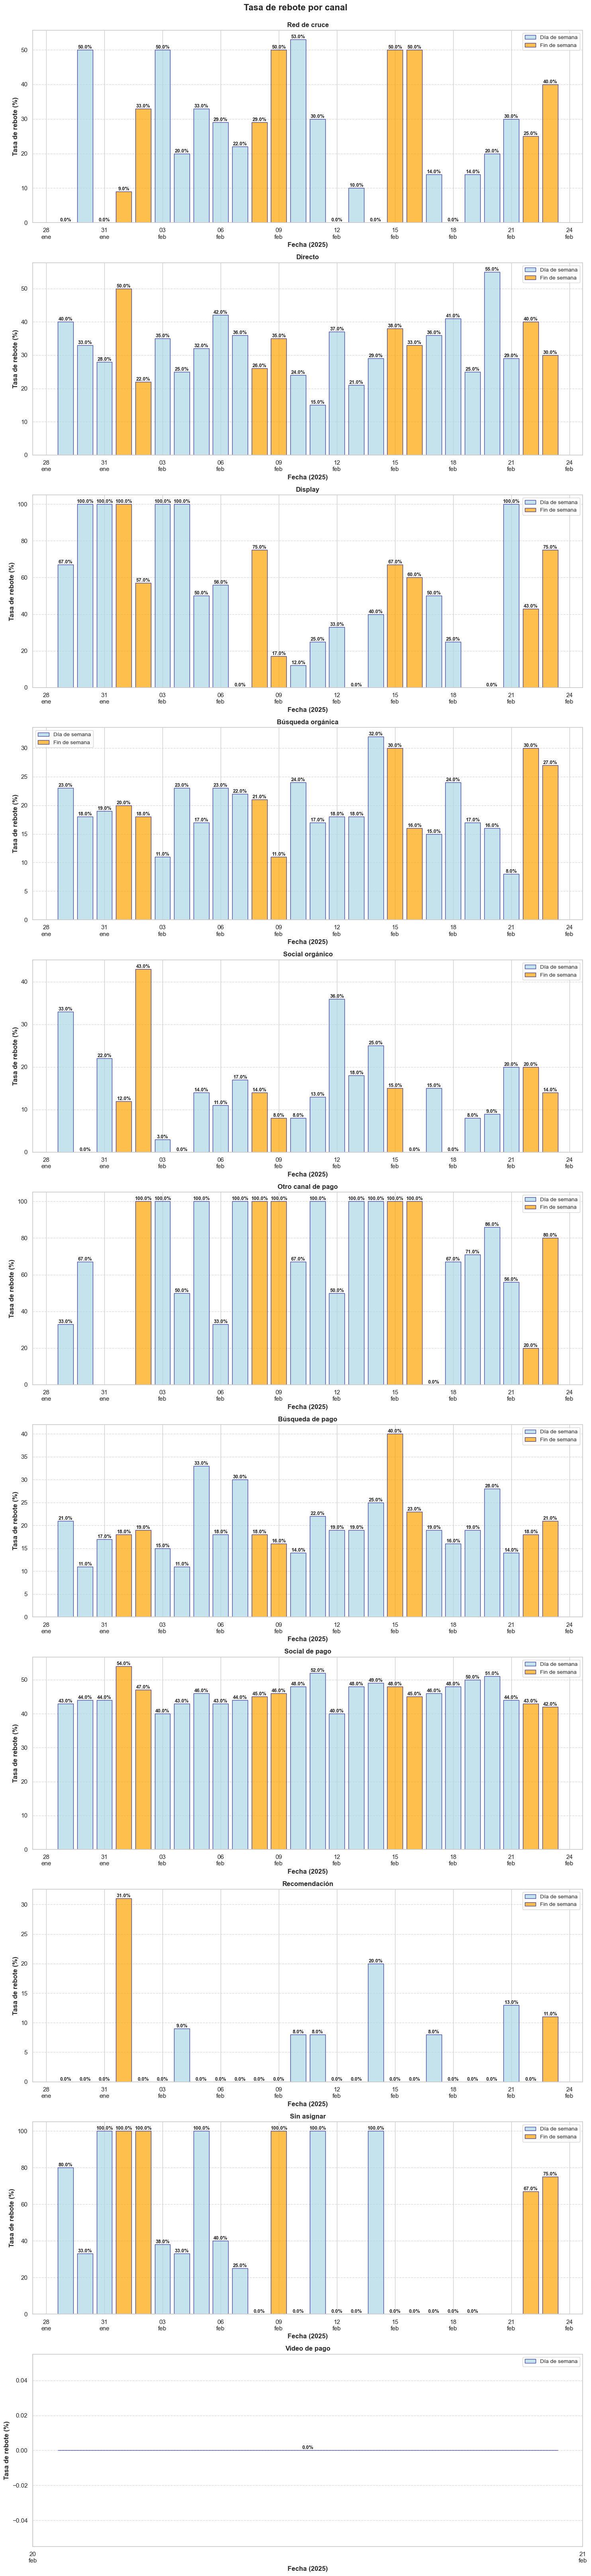

In [ ]:
# Create a plot for each unique channel
unique_channels = channels['Canal'].unique()

# Create a subplot for each channel
fig, axes = plt.subplots(len(unique_channels), 1, 
                         figsize=(15, 6*len(unique_channels)), 
                         squeeze=False)
fig.suptitle('Tasa de rebote por canal', fontsize=16, fontweight='bold')

# Iterate through each channel
for i, channel in enumerate(unique_channels):
    # Filter data for the specific channel
    channel_data = channels[channels['Canal'] == channel]
    
    # Create the plot for this channel
    ax = axes[i, 0]
    
    # Bar plot of bounce rate with gradient color
    for j, (fecha, rebote) in enumerate(zip(channel_data['Fecha'], channel_data['% Rebote'])):
        color = 'orange' if fecha.weekday() >= 5 else 'lightblue'
        ax.bar(fecha, rebote * 100, color=color, edgecolor='navy', linewidth=1, alpha=0.7,
               label='Fin de semana' if fecha.weekday() >= 5 else 'Día de semana')
    
    # Format x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Add labels and title
    ax.set_xlabel('Fecha (2025)', fontweight='bold')
    ax.set_ylabel('Tasa de rebote (%)', fontweight='bold')
    ax.set_title(f'{channel}', fontsize=12, fontweight='bold')
    
    # Annotate bars with percentage values
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', 
                fontsize=9, 
                fontweight='bold')

    # Improve grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)  # Put gridlines behind bars

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize='small')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust this value to reduce the space
plt.show()

Los gráficos muestran la "Tasa de rebote por canal" a lo largo de diferentes canales:

1. **Tendencias generales**:
   - La tasa de rebote varía significativamente entre los diferentes canales y fechas.
   - Hay fluctuaciones notables en las tasas de rebote, lo que indica niveles variables de compromiso del usuario.

2. **Información específica por canal**:
   - **Directo**: generalmente muestra tasas de rebote más altas en comparación con otros canales, lo que sugiere que los usuarios que llegan directamente pueden no encontrar el contenido inmediatamente atractivo.
   - **Display**: presenta tasas de rebote moderadas, con algunos picos que indican posibles problemas con la segmentación de anuncios o la relevancia de la página de destino.
   - **Búsqueda orgánica**: muestra tasas de rebote relativamente estables, indicando un compromiso consistente de los usuarios provenientes de motores de búsqueda.
   - **Redes sociales**: muestra tasas de rebote variadas, con algunos picos posiblemente debido a contenido viral o expectativas de audiencia no coincidentes.
   - **Búsqueda de pago**: generalmente tiene tasas de rebote más bajas, lo que sugiere una segmentación efectiva y contenido de anuncios relevante.
   - **Email**: muestra alta variabilidad, indicando que las campañas de correo electrónico pueden tener efectividad inconsistente.

3. **Patrones temporales**:
   - Ciertas fechas muestran picos en las tasas de rebote en múltiples canales, lo que podría deberse a factores externos como feriados o eventos.
   - Patrones consistentes en algunos canales sugieren un comportamiento estable de la audiencia, mientras que otros muestran más volatilidad.

4. **Recomendaciones**:
   - **Canal directo**: investigar el contenido de la página de destino y la experiencia del usuario para reducir las tasas de rebote.
   - **Display y Redes sociales**: revisar las estrategias de segmentación y la alineación del contenido para mejorar el compromiso.
   - **Campañas de Email**: analizar el rendimiento de las campañas para identificar factores que contribuyen a altas tasas de rebote.

En general, los datos sugieren la necesidad de estrategias específicas para mejorar el compromiso del usuario en diferentes canales, prestando especial atención a aquellos con tasas de rebote más altas.

##### 2.3 NÚMERO DE EVENTOS vs. USUARIOS ACTIVOS POR CANAL

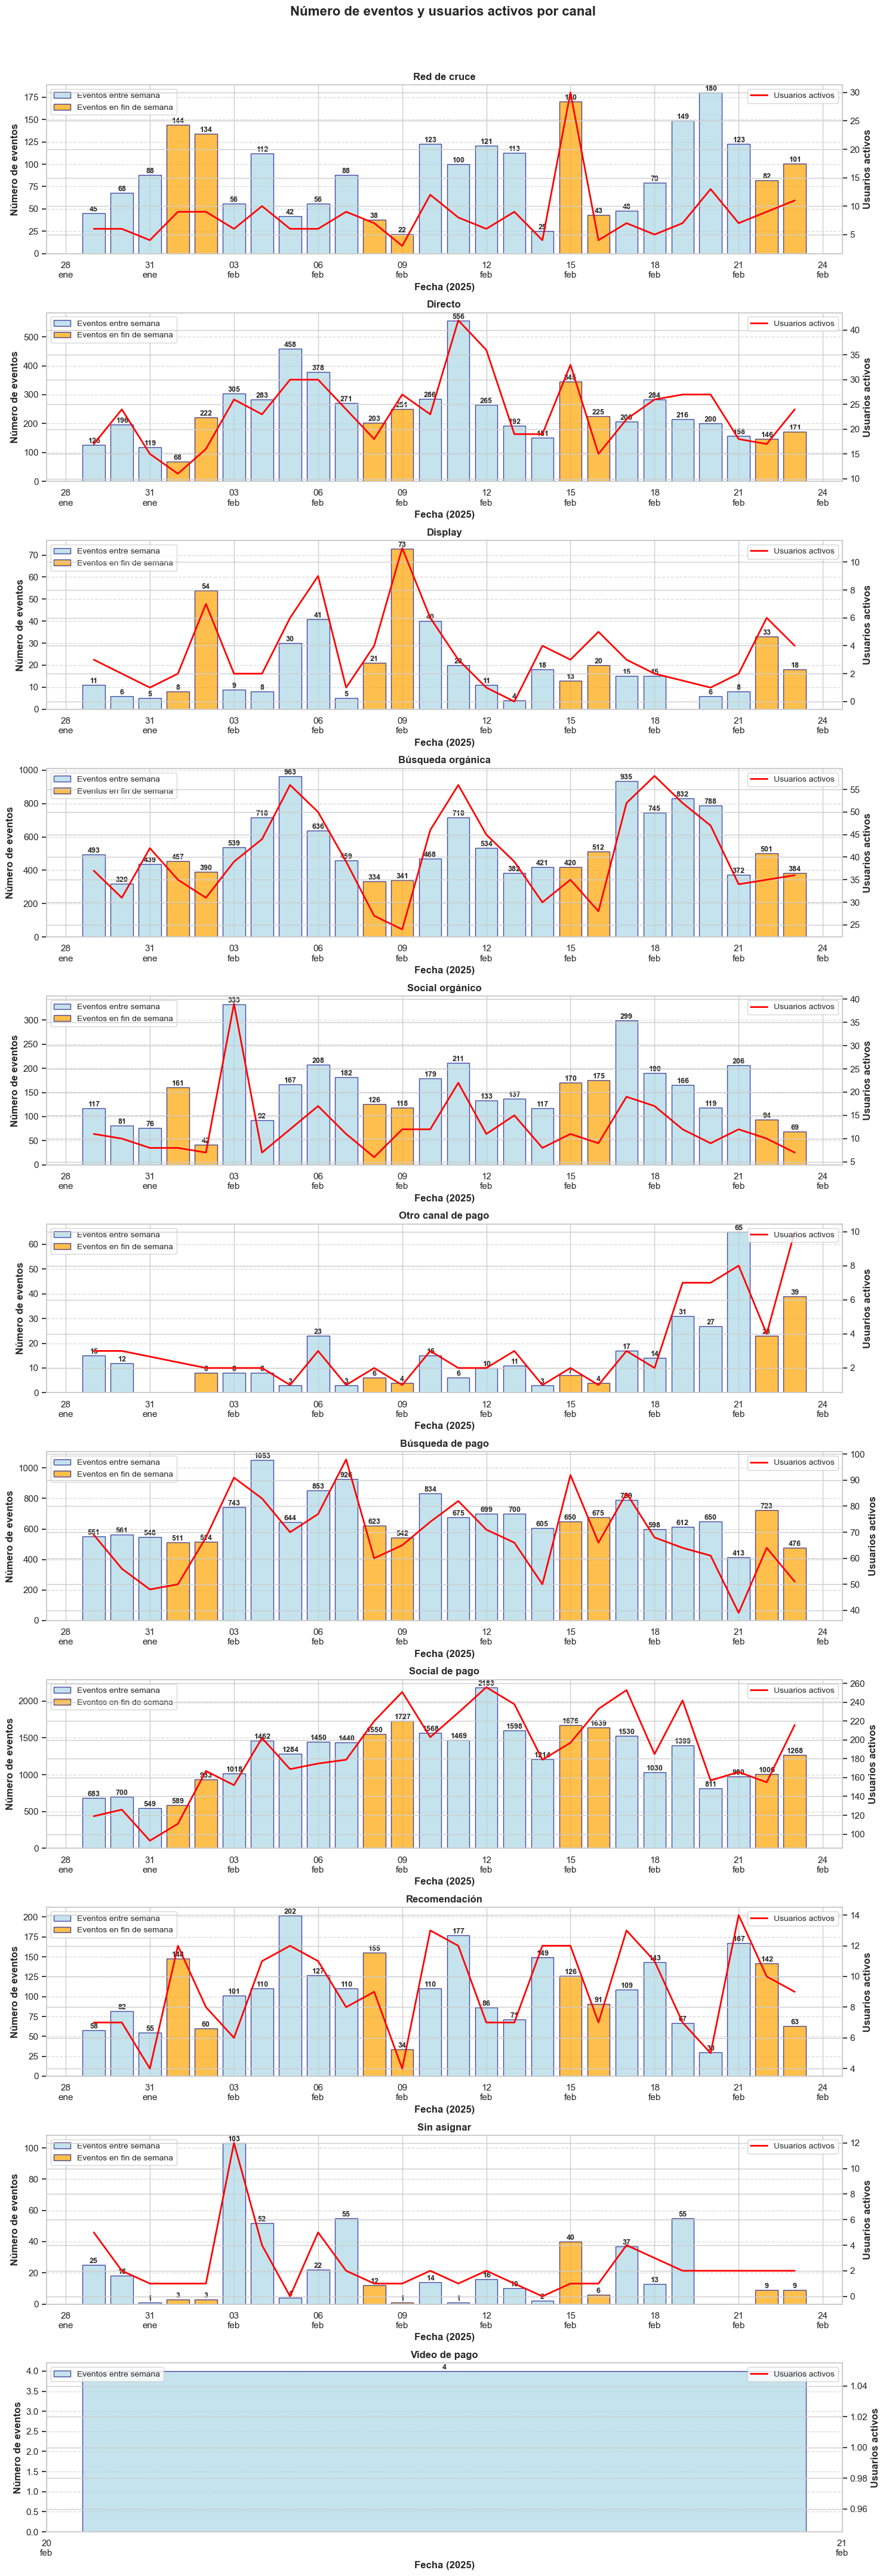

In [ ]:
# Create a plot for each unique channel
unique_channels = channels['Canal'].unique()

# Create a subplot for each channel
fig, axes = plt.subplots(len(unique_channels), 1, 
                         figsize=(15, 4*len(unique_channels)), 
                         squeeze=False)
fig.suptitle('Número de eventos y usuarios activos por canal', fontsize=16, fontweight='bold')

# Iterate through each channel
for i, channel in enumerate(unique_channels):
    # Filter data for the specific channel
    channel_data = channels[channels['Canal'] == channel]
    
    # Create the plot for this channel
    ax1 = axes[i, 0]
    
    # Create twin axis
    ax2 = ax1.twinx()
    
    # Bar plot of number of events
    for j, (fecha, eventos) in enumerate(zip(channel_data['Fecha'], channel_data['Número de eventos'])):
        color = 'orange' if fecha.weekday() >= 5 else 'lightblue'
        ax1.bar(fecha, eventos, color=color, edgecolor='navy', linewidth=1, alpha=0.7,
                label='Eventos en fin de semana' if fecha.weekday() >= 5 else 'Eventos entre semana')
    
    # Line plot of active users
    ax2.plot(channel_data['Fecha'], 
             channel_data['Usuarios activos'], 
             color='red', 
             linewidth=2,
             label='Usuarios activos')
    
    # Format x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Labels and titles
    ax1.set_xlabel('Fecha (2025)', fontweight='bold')
    ax1.set_ylabel('Número de eventos', fontweight='bold')
    ax2.set_ylabel('Usuarios activos', fontweight='bold')
    ax1.set_title(f'{channel}', fontsize=12, fontweight='bold')
    
    # Annotate bars with event numbers
    for bar in ax1.patches:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.0f}',
                 ha='center', va='bottom', 
                 fontsize=9, 
                 fontweight='bold')
    
    # Improve grid
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    ax1.set_axisbelow(True)
    
    # Add legends
    handles, labels = ax1.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax1.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize='small')
    ax2.legend(['Usuarios activos'], loc='upper right', fontsize='small')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Los gráficos muestran el "Número de eventos y usuarios activos por canal":

1. **Tendencias generales**:
   - Hay variaciones significativas en el número de eventos y usuarios activos entre los diferentes canales.
   - Los picos en eventos suelen coincidir con un aumento en usuarios activos, indicando momentos de mayor interacción.

2. **Insights por canal**:
   - **Red de cruce**: muestra picos notables a mediados de febrero, sugiriendo eventos o campañas específicas que impulsaron la actividad.
   - **Directo**: presenta fluctuaciones constantes, con varios picos que indican días de alta actividad.
   - **Display**: tiene menos eventos y usuarios activos, lo que podría indicar menor efectividad o alcance.
   - **Búsqueda orgánica**: muestra un patrón estable con incrementos ocasionales, reflejando un flujo constante de usuarios.
   - **Social orgánico**: exhibe variabilidad, con algunos picos que podrían estar relacionados con contenido viral.
   - **Búsqueda de pago**: muestra un alto número de eventos y usuarios activos, sugiriendo campañas efectivas.
   - **Social de pago**: tiene un alto nivel de actividad, con picos frecuentes que indican un buen rendimiento de las campañas pagadas.

3. **Recomendaciones**:
   - **Red de cruce y directo**: analizar los factores que impulsan los picos para replicar el éxito.
   - **Display**: revisar estrategias para aumentar la efectividad y el alcance.
   - **Social orgánico**: aprovechar los picos de actividad para maximizar el impacto del contenido.

En resumen, los datos sugieren que algunos canales están logrando captar más atención y participación, mientras que otros podrían beneficiarse de ajustes estratégicos para mejorar su rendimiento.

##### 2.4 CATEGORÍA DE PÁGINA: CLICS

In [ ]:
# Group by 'Fecha' and 'Categoría de página' and aggregate 'Clics'
aggregated_landing_page_data = landing_page_metrics.groupby(['Fecha', 'Categoría de página'])['Clics'].sum().reset_index()

# Display the aggregated DataFrame
aggregated_landing_page_data.head()

Fecha     Categoría de página  Clics
0 2025-01-29     Artículos generales      2
1 2025-01-29                Campañas     10
2 2025-01-29  Categorías de producto      0
3 2025-01-29         Clases y cursos     71
4 2025-01-29        Contacto / F.A.Q      2

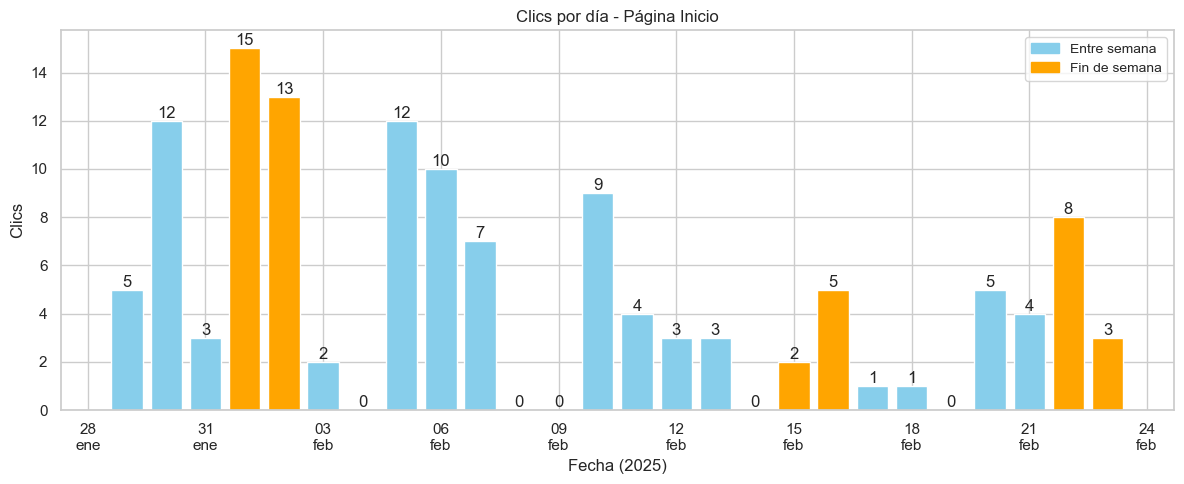

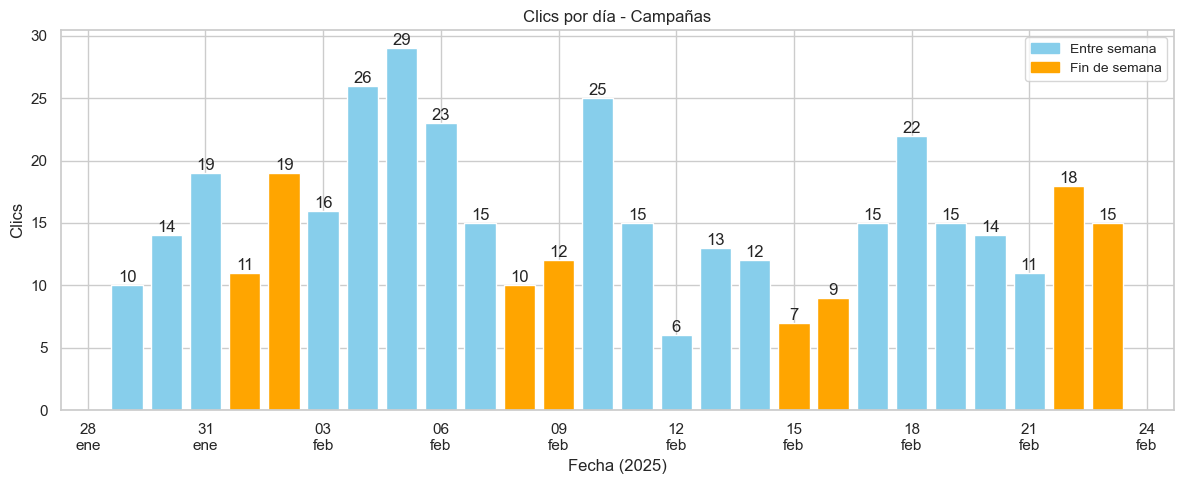

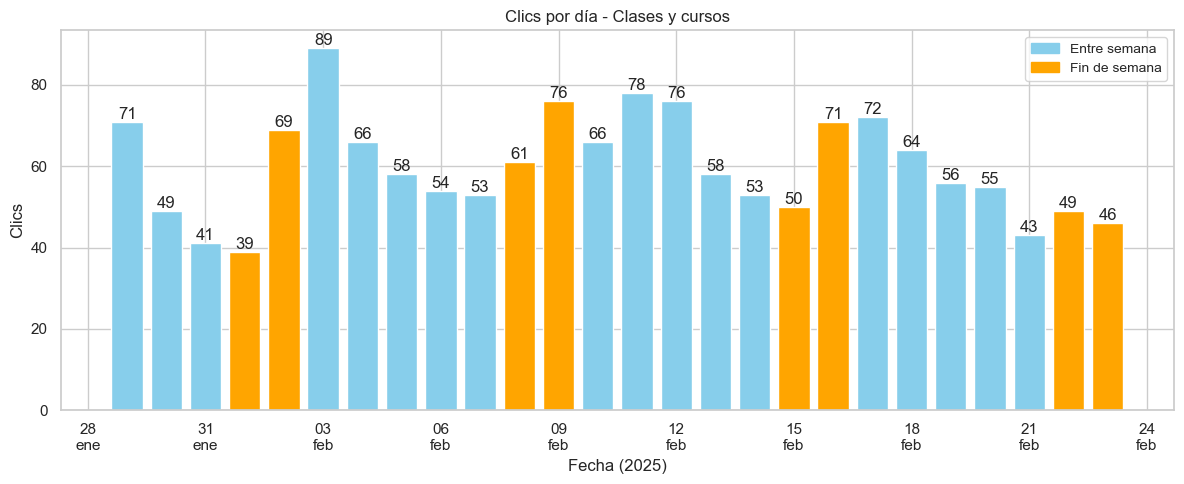

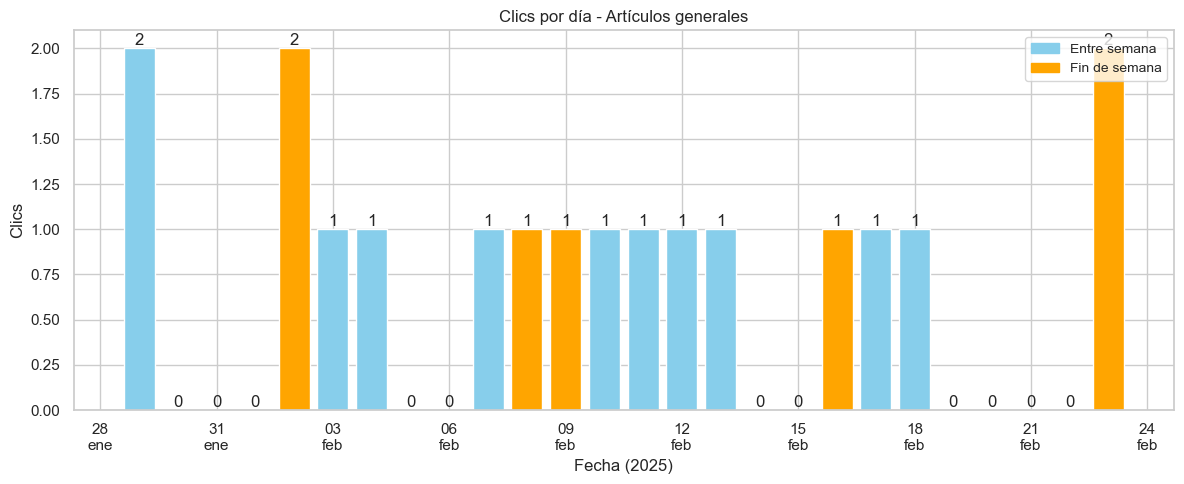

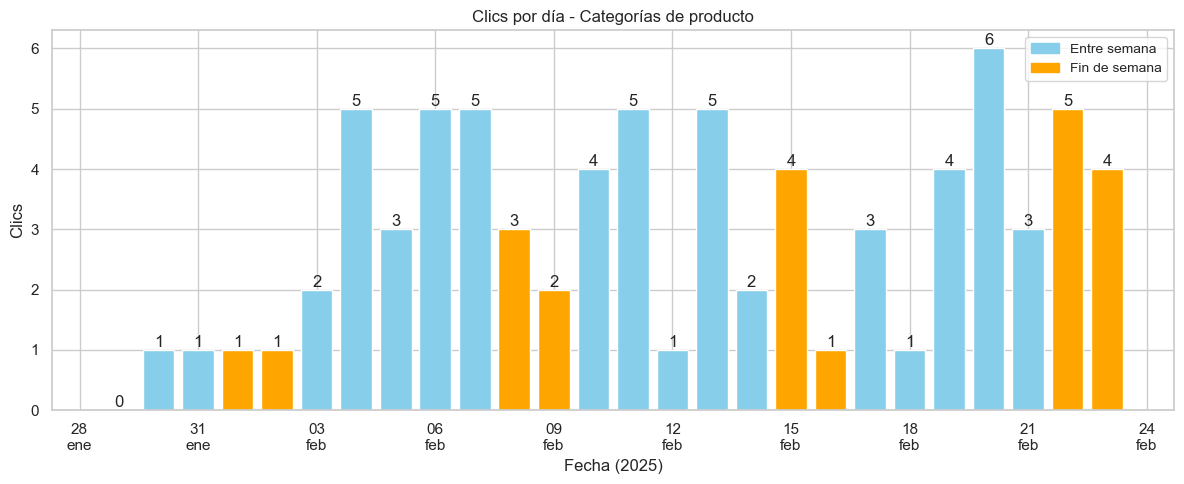

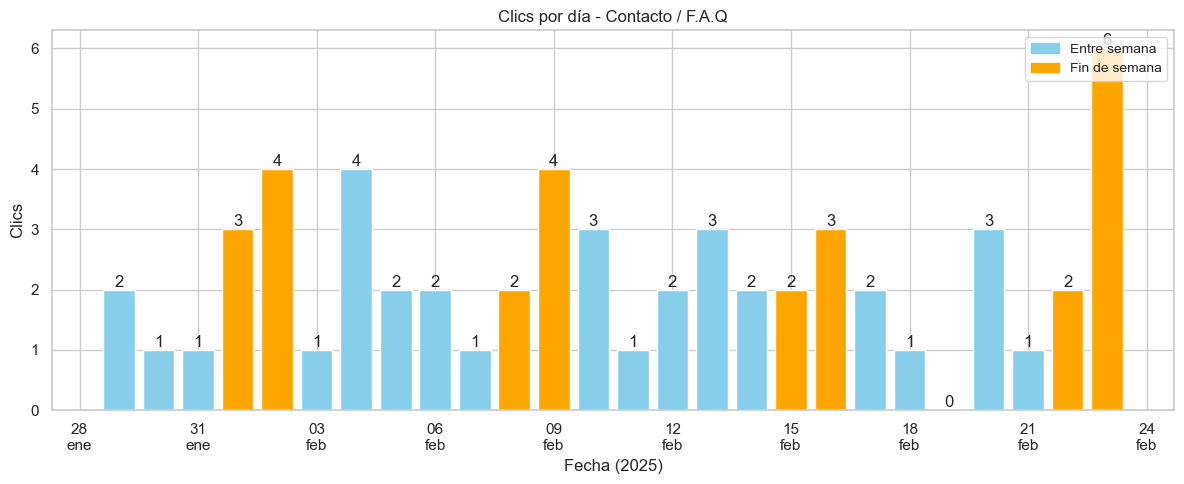

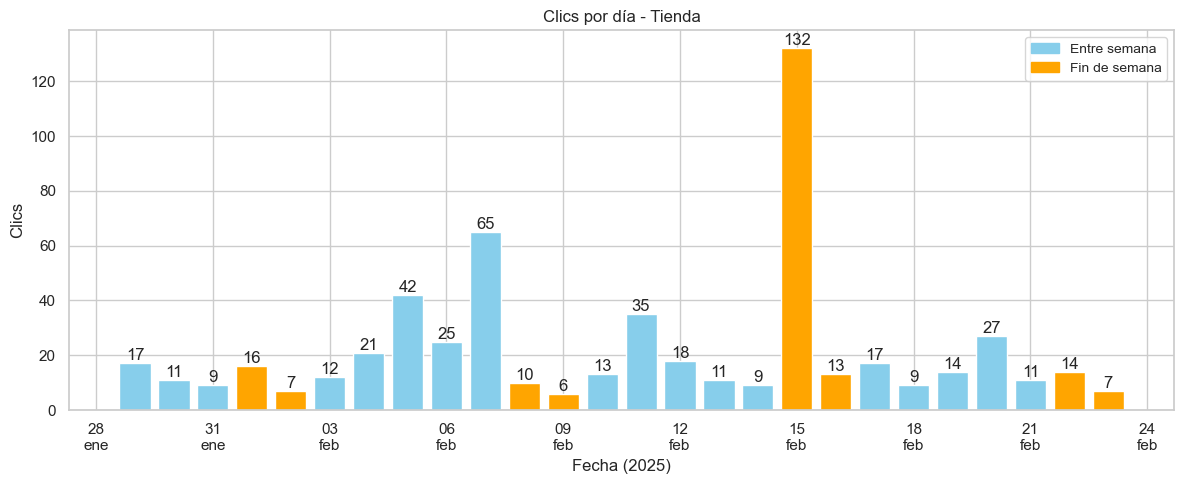

In [ ]:
# Get unique categories
categories = landing_page_metrics['Categoría de página'].unique()

# Create a plot for each category
for category in categories:
    # Filter data for the current category
    category_data = landing_page_metrics[landing_page_metrics['Categoría de página'] == category]
    
    # Group by 'Fecha' and sum 'Clics'
    aggregated_category_data = category_data.groupby('Fecha')['Clics'].sum()
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Create bar plot with different colors for weekends
    bars = []
    for date, value in aggregated_category_data.items():
        color = 'orange' if date.weekday() >= 5 else 'skyblue'
        bars.append(plt.bar(date, value, color=color))
    
    # Format x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Customize the plot
    plt.title(f'Clics por día - {category}')
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Clics')
    
    # Annotate bars with values
    for bar in bars:
        height = bar[0].get_height()
        plt.text(bar[0].get_x() + bar[0].get_width()/2., height,
                 f'{height:.0f}',
                 ha='center', va='bottom')
    
    # Create legend
    weekday_patch = mpatches.Patch(color='skyblue', label='Entre semana')
    weekend_patch = mpatches.Patch(color='orange', label='Fin de semana')
    plt.legend(handles=[weekday_patch, weekend_patch], loc='upper right', fontsize='small')
    
    plt.tight_layout()
    
    # Show the plot
    plt.show()

Clics diarios en diferentes secciones del sitio web:

1. **Tendencias generales**:
   - Las secciones "Clases y cursos" y "Campañas" reciben consistentemente más clics, indicando un alto interés y participación.
   - La "Página de Inicio" y "Tienda" muestran picos ocasionales, sugiriendo eventos o promociones específicas que impulsan el tráfico.

2. **Diferencias de días entre semana y de fin de semana**:
   - En general, los clics son más altos entre semana, especialmente en "Clases y cursos" y "Campañas".
   - La "Tienda" experimenta un pico notable durante el fin de semana del 15 de febrero, lo que podría indicar una promoción especial.

3. **Secciones con menor interacción**:
   - "Artículos generales" y "Categorías de producto" tienen un número bajo de clics, lo que sugiere que podrían beneficiarse de una mayor promoción o contenido más atractivo.
   - "Contacto / F.A.Q" mantiene un nivel bajo pero constante de clics, indicando un uso específico y ocasional.

4. **Recomendaciones**:
   - **Promociones**: continuar aprovechando los días de semana para campañas en "Clases y cursos" y "Campañas".
   - **Optimización de contenido**: mejorar la visibilidad y atractivo de "Artículos generales" y "Categorías de producto".
   - **Eventos especiales**: considerar más eventos o promociones durante los fines de semana para aumentar la interacción en la "Tienda".

En resumen, el sitio web muestra un buen rendimiento en ciertas áreas, pero hay oportunidades para mejorar la interacción en secciones menos visitadas.

***

##### 3. CONVERSIÓN

##### * Acciones de conversión (2 categorías de acciones)

##### Definición de conversión: una acción específica y valiosa realizada por un usuario que cumple con un objetivo predefinido importante para el negocio.



In [ ]:
# Read the CSV file into a DataFrame
google_conversions = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/google analytics/conversions_google_ads.csv', sep=',')

# Rename columns
google_conversions = google_conversions.rename(columns={
    'Conversion action': 'Acción de conversión', 
    'Conversion category': 'Categoría de conversión', 
    'Conversion source': 'Fuente de conversión', 
    'Day': 'Fecha', 
    'Conversions': 'Conversiones', 
    'Results': 'Resultados'
})

# Reorder the columns to move 'Fecha' to the first position
columns = ['Fecha'] + [col for col in google_conversions.columns if col != 'Fecha']
google_conversions = google_conversions[columns]

# Mapping of conversion actions in English to Spanish
conversion_mapping = {
    'Acciones locales: clic en Cómo llegar': 'Clic cómo llegar',
    'Acciones locales: otras expansiones': 'Otras expansiones',
    'Clics de llamada': 'Clics de llamada',
    'Formulario Pag Gracias- Nat Adultos': 'Formulario natación adultos',
    'Formulario- Pa Gracias Matronatación': 'Formulario matronatación',
    'Formulario- Pag Gracias Bebes Natación': 'Formulario bebés natación',
    'Formulario- Pag Gracias Chapoteos': 'Formulario chapoteos',
    'Formulario- Pag Gracias Nat Embarazo': 'Formulario natación embarazo',
    'Formulario- Pag Gracias Nat Infantil': 'Formulario natación infantil',
    'Llamadas desde anuncios': 'Llamadas desde anuncios',
}
# Rename the values in the 'Accion de conversión' column
google_conversions['Acción de conversión'] = google_conversions['Acción de conversión'].replace(conversion_mapping)

# Mapping of conversion category in English to Spanish
category_mapping = {
    'Get directions': 'Obtener dirección',
    'Engagement': 'Engagement',
    'Contact': 'Contacto',
    'Submit lead form': 'Envío de formulario',
    'Phone call lead': 'Llamada de teléfono'
}
# Rename the values in the 'Conversion category' column
google_conversions['Categoría de conversión'] = google_conversions['Categoría de conversión'].replace(category_mapping)

# Mapping of Fuente de conversión in English to Spanish
fuente_mapping = {
    'Google hosted': 'Alojado por Google',
    'Website': 'Sitio web',
    'Calls from ads': 'Llamadas desde anuncios',
}
# Rename the values in the 'Fuente de conversión' column
google_conversions['Fuente de conversión'] = google_conversions['Fuente de conversión'].replace(fuente_mapping)

# Convert 'Fecha' to datetime
google_conversions['Fecha'] = pd.to_datetime(google_conversions['Fecha'])
google_conversions.head()

Fecha Acción de conversión Categoría de conversión  \
0 2025-01-29     Clic cómo llegar       Obtener dirección   
1 2025-01-30     Clic cómo llegar       Obtener dirección   
2 2025-01-31     Clic cómo llegar       Obtener dirección   
3 2025-02-01     Clic cómo llegar       Obtener dirección   
4 2025-02-02     Clic cómo llegar       Obtener dirección   

  Fuente de conversión  Conversiones            Resultados  
0   Alojado por Google           0.0  Get directions: 6.00  
1   Alojado por Google           0.0  Get directions: 7.00  
2   Alojado por Google           0.0  Get directions: 2.00  
3   Alojado por Google           0.0  Get directions: 6.00  
4   Alojado por Google           0.0  Get directions: 7.00

In [ ]:
# Extract the numeric values from 'Resultados' using regex and convert to integer
google_conversions['Acciones categoría de conversión'] = (
    google_conversions['Resultados'].str.extract(r'(\d+\.?\d*)')[0].astype(float).astype(int)
)

# Reorder the columns to place the new column after 'Categoría de conversión'
cols = google_conversions.columns.tolist()
idx = cols.index('Categoría de conversión') + 1
cols.insert(idx, cols.pop(cols.index('Acciones categoría de conversión')))
google_conversions = google_conversions[cols]

# Display the modified dataframe
google_conversions.head()

Fecha Acción de conversión Categoría de conversión  \
0 2025-01-29     Clic cómo llegar       Obtener dirección   
1 2025-01-30     Clic cómo llegar       Obtener dirección   
2 2025-01-31     Clic cómo llegar       Obtener dirección   
3 2025-02-01     Clic cómo llegar       Obtener dirección   
4 2025-02-02     Clic cómo llegar       Obtener dirección   

   Acciones categoría de conversión Fuente de conversión  Conversiones  \
0                                 6   Alojado por Google           0.0   
1                                 7   Alojado por Google           0.0   
2                                 2   Alojado por Google           0.0   
3                                 6   Alojado por Google           0.0   
4                                 7   Alojado por Google           0.0   

             Resultados  
0  Get directions: 6.00  
1  Get directions: 7.00  
2  Get directions: 2.00  
3  Get directions: 6.00  
4  Get directions: 7.00

##### 3.1 ACCIONES POR CATEGORÍA DE CONVERSIÓN POR DÍA

In [ ]:
# Aggregate the sum of 'Acciones categoría de conversión' by 'Fecha' and 'Categoría de conversión'
conversions_subset = google_conversions.groupby(['Fecha', 'Categoría de conversión'], as_index=False)['Acciones categoría de conversión'].sum()

# Display the subset
conversions_subset.head()

Fecha Categoría de conversión  Acciones categoría de conversión
0 2025-01-29                Contacto                                 7
1 2025-01-29              Engagement                                35
2 2025-01-29     Envío de formulario                                 5
3 2025-01-29       Obtener dirección                                 6
4 2025-01-30              Engagement                                 9

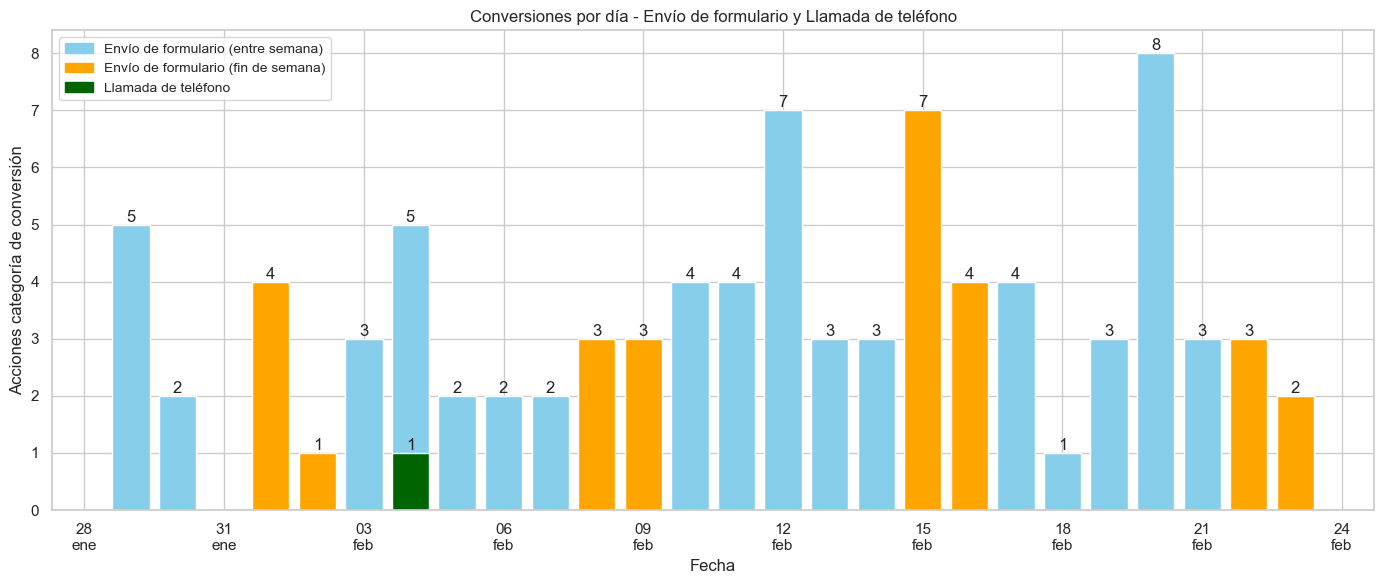

In [ ]:
# Filter for specific categories
categories = ['Envío de formulario', 'Llamada de teléfono']

# Filter data for the specified categories
filtered_data = conversions_subset[conversions_subset['Categoría de conversión'].isin(categories)]

# Group by 'Fecha' and 'Categoría de conversión' and sum 'Acciones categoría de conversión'
aggregated_data = filtered_data.groupby(['Fecha', 'Categoría de conversión'])['Acciones categoría de conversión'].sum().unstack()

# Plot
plt.figure(figsize=(14, 6))

# Create bar plot with different colors for weekends
bars = []
for date in aggregated_data.index:
    for category in categories:
        value = aggregated_data.at[date, category]
        if category == 'Envío de formulario':
            color = 'orange' if date.weekday() >= 5 else 'skyblue'
        else:
            color = 'darkgreen'
        bars.append(plt.bar(date, value, color=color, label=f"{category} ({'fin de semana' if date.weekday() >= 5 else 'entre semana'})" if date == aggregated_data.index[0] else ""))

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

# Customize the plot
plt.title('Conversiones por día - Envío de formulario y Llamada de teléfono')
plt.xlabel('Fecha')
plt.ylabel('Acciones categoría de conversión')

# Annotate bars with values
for bar in bars:
    height = bar[0].get_height()
    if pd.notna(height) and height != float('inf'):
        plt.text(bar[0].get_x() + bar[0].get_width()/2., height,
                 f'{height:.0f}',
                 ha='center', va='bottom')

# Create legend
weekday_patch = mpatches.Patch(color='skyblue', label='Envío de formulario (entre semana)')
weekend_patch = mpatches.Patch(color='orange', label='Envío de formulario (fin de semana)')
call_patch = mpatches.Patch(color='darkgreen', label='Llamada de teléfono')
plt.legend(handles=[weekday_patch, weekend_patch, call_patch], loc='upper left', fontsize='small')

plt.tight_layout()

# Show the plot
plt.show()

##### 3.1.1 TOTAL DE ACCIONES POR CATEGORÍA DE CONVERSIÓN
- Envío de formulario y Llamada de teléfono con las conversiones finales. El resto de acciones son categorías que llevan a estas conversiones finales.

In [ ]:
# Aggregate the total sum of 'Acciones categoría de conversión' by 'Categoría de conversión'
total_by_category = google_conversions.groupby('Categoría de conversión', as_index=False)['Acciones categoría de conversión'].sum()

# Display the result
print(total_by_category)

  Categoría de conversión  Acciones categoría de conversión
0                Contacto                                38
1              Engagement                               354
2     Envío de formulario                                88
3     Llamada de teléfono                                 1
4       Obtener dirección                               179


El gráfico muestra las conversiones diarias para dos categorías: "Envío de formulario" y "Llamada de teléfono". 

1. **Envío de formulario**: se observa que las conversiones son más altas durante los días de semana (en azul) en comparación con los fines de semana (en naranja). Esto sugiere que los usuarios tienden a interactuar más con los formularios durante los días laborales.

2. **Llamada de teléfono**: las conversiones para llamadas (en verde) son menos frecuentes, pero se mantienen constantes. Esto podría indicar que las llamadas son menos dependientes del día de la semana.

3. **Tendencias generales**: hay picos notables en las conversiones de "Envío de formulario" los días 12 y 21 de febrero, lo que podría estar relacionado con campañas específicas o eventos que impulsaron la interacción.

En resumen, las conversiones de formularios son más efectivas durante la semana, mientras que las llamadas mantienen un nivel constante. Esto puede guiar estrategias de marketing para maximizar la interacción en días específicos.

***